# Importacion de liberias y DataSet

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px

In [15]:

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df_expoParaguay = pd.read_csv("C:/Users/migue/Music/MINTIC/exportaciones_Paraguay.csv")
df_expoParaguay


C:\Users\migue\AppData\Local\Temp\ipykernel_21820\2011308724.py:3: DtypeWarning: Columns (3,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_expoParaguay = pd.read_csv("C:/Users/migue/Music/MINTIC/exportaciones_Paraguay.csv")


id  periodo       fecha id_empresa  id_capitulo  id_partida  \
0        2017163301     2018  2018-01-02   80075237           10        1006   
1        2017163302     2018  2018-01-02   80021825           24        2403   
2        2017163303     2018  2018-01-02   80050847           42        4201   
3        2017163304     2018  2018-01-02   80050847           42        4201   
4        2017163305     2018  2018-01-02   80050847           42        4201   
...             ...      ...         ...        ...          ...         ...   
1547954  2019536344     2024  2024-08-29   80101095           85        8538   
1547955  2019536345     2024  2024-08-29   80101095           85        8544   
1547956  2019536346     2024  2024-08-02   80077761           10        1006   
1547957  2019536347     2024  2024-08-29   CI859169           85        8525   
1547958  2019536348     2024  2024-08-29   CI859169           88        8803   

         id_subpartida  id_posicion  id_aduanas  id_via  id_paisdestino  \
0               100630 1006302900.0         530       3             211   
1               240319 2403190000.0         527       3             105   
2               420100 4201001000.0         524       4              23   
3               420100 4201001000.0         524       4              23   
4               420100 4201001000.0         524       4              23   
...                ...          ...         ...     ...             ...   
1547954         853890 8538909000.0         553       3              63   
1547955         854442 8544420000.0         553       3              63   
1547956         100630 1006302100.0         544       8             573   
1547957         852580 8525802900.0         524       4             249   
1547958         880330 8803300000.0         524       4             249   

         cantidad  id_unidad  valorfob_unitario  valorfob  valorcif  flete  \
0        224000.0        113                0.4   96320.0   96320.0    0.0   
1           115.0        138              391.0   44965.0   44965.0    0.0   
2            20.0         11              602.5   12050.0   12850.0  800.0   
3             4.0         11               76.2     304.8     322.6   17.8   
4             7.0         11              641.1    4488.0    4750.2  262.2   
...           ...        ...                ...       ...       ...    ...   
1547954   55300.0         11                0.3   16974.5   17585.1  440.9   
1547955    1650.0         11                5.3    8808.0    9124.9  228.8   
1547956  650000.0        113                0.4  265200.0  265200.0    0.0   
1547957       1.0         11             1787.4    1787.4    2288.5  501.1   
1547958       1.0         11            15358.0   15358.0   19663.8 4305.8   

         peso_neto  peso_bruto  id_transportador  \
0         224000.0    225000.0               501   
1          13225.0     14950.0              1679   
2            160.0       160.0               501   
3              1.0         1.0               501   
4             60.0        60.0               501   
...            ...         ...               ...   
1547954      123.6       179.8               501   
1547955       49.8        62.0               501   
1547956   650000.0    650580.0               501   
1547957        1.0         3.0               501   
1547958        7.7        26.1               501   

                                  descripcion_arancel_pais  \
0                         ARROZ BLANCO TIPO 2, 20% PARTIDO   
1                              TABACO PICADO TIPO SULA-001   
2                            SILLAS DE MONTAR Y ACCESORIOS   
3                                                CABEZALES   
4                            SILLAS DE MONTAR Y ACCESORIOS   
...                                                    ...   
1547954  DMS PARTES IDENTIFICABLES COMO DESTINADAS EXCL...   
1547955  HILOS CABLES INCLUIDOS LOS COAAXIALES PROVISTO...   
1547956  ARROZ SEMIBLANQUEADO O BLA

# Limpieza de Dataset

Eliminacion de columnas inecesarias 

In [16]:
columnas_a_eliminar = [
    'pais_transportador', 'matricula',	'numero_manifiesto','conocimiento',
    'id_elastic'
    ]

try:
    df_exporParaguay_Filter = df_expoParaguay.drop(columns=columnas_a_eliminar)
    print("Las columnas seleccionadas se eliminaron con éxito")
except KeyError as e:
    print("Error al aliminar columnas")

Las columnas seleccionadas se eliminaron con éxito


In [21]:
df_exporParaguay_Filter

id  periodo       fecha id_empresa  id_capitulo  id_partida  \
0        2017163301     2018  2018-01-02   80075237           10        1006   
1        2017163302     2018  2018-01-02   80021825           24        2403   
2        2017163303     2018  2018-01-02   80050847           42        4201   
3        2017163304     2018  2018-01-02   80050847           42        4201   
4        2017163305     2018  2018-01-02   80050847           42        4201   
...             ...      ...         ...        ...          ...         ...   
1547954  2019536344     2024  2024-08-29   80101095           85        8538   
1547955  2019536345     2024  2024-08-29   80101095           85        8544   
1547956  2019536346     2024  2024-08-02   80077761           10        1006   
1547957  2019536347     2024  2024-08-29   CI859169           85        8525   
1547958  2019536348     2024  2024-08-29   CI859169           88        8803   

         id_subpartida  id_posicion  id_aduanas  id_via  id_paisdestino  \
0               100630 1006302900.0         530       3             211   
1               240319 2403190000.0         527       3             105   
2               420100 4201001000.0         524       4              23   
3               420100 4201001000.0         524       4              23   
4               420100 4201001000.0         524       4              23   
...                ...          ...         ...     ...             ...   
1547954         853890 8538909000.0         553       3              63   
1547955         854442 8544420000.0         553       3              63   
1547956         100630 1006302100.0         544       8             573   
1547957         852580 8525802900.0         524       4             249   
1547958         880330 8803300000.0         524       4             249   

         cantidad  id_unidad  valorfob_unitario  valorfob  valorcif  flete  \
0        224000.0        113                0.4   96320.0   96320.0    0.0   
1           115.0        138              391.0   44965.0   44965.0    0.0   
2            20.0         11              602.5   12050.0   12850.0  800.0   
3             4.0         11               76.2     304.8     322.6   17.8   
4             7.0         11              641.1    4488.0    4750.2  262.2   
...           ...        ...                ...       ...       ...    ...   
1547954   55300.0         11                0.3   16974.5   17585.1  440.9   
1547955    1650.0         11                5.3    8808.0    9124.9  228.8   
1547956  650000.0        113                0.4  265200.0  265200.0    0.0   
1547957       1.0         11             1787.4    1787.4    2288.5  501.1   
1547958       1.0         11            15358.0   15358.0   19663.8 4305.8   

         peso_neto  peso_bruto  id_transportador  \
0         224000.0    225000.0               501   
1          13225.0     14950.0              1679   
2            160.0       160.0               501   
3              1.0         1.0               501   
4             60.0        60.0               501   
...            ...         ...               ...   
1547954      123.6       179.8               501   
1547955       49.8        62.0               501   
1547956   650000.0    650580.0               501   
1547957        1.0         3.0               501   
1547958        7.7        26.1               501   

                                  descripcion_arancel_pais  \
0                         ARROZ BLANCO TIPO 2, 20% PARTIDO   
1                              TABACO PICADO TIPO SULA-001   
2                            SILLAS DE MONTAR Y ACCESORIOS   
3                                                CABEZALES   
4                            SILLAS DE MONTAR Y ACCESORIOS   
...                                                    ...   
1547954  DMS PARTES IDENTIFICABLES COMO DESTINADAS EXCL...   
1547955  HILOS CABLES INCLUIDOS LOS COAAXIALES PROVISTO...   
1547956  ARROZ SEMIBLANQUEADO O BLA

Pasar las columnas de minusculas a mayusculas para mayor claridad

In [17]:
df_exporParaguay_Filter.columns = df_exporParaguay_Filter.columns.str.upper()

Verificacion de nulos

In [53]:
df_exporParaguay_Filter.isna().sum()

ID                               0
PERIODO                          0
FECHA                            0
ID_EMPRESA                       0
ID_CAPITULO                      0
ID_PARTIDA                       0
ID_SUBPARTIDA                    0
ID_POSICION                      0
ID_ADUANAS                       0
ID_VIA                           0
ID_PAISDESTINO                   0
CANTIDAD                         0
ID_UNIDAD                        0
VALORFOB_UNITARIO                0
VALORFOB                         0
VALORCIF                         0
FLETE                            0
PESO_NETO                        0
PESO_BRUTO                       0
ID_TRANSPORTADOR                 0
DESCRIPCION_ARANCEL_PAIS         0
DESCRIPCION_PROD                 0
MARCA                       228602
ID_PAISORIGEN                    0
IMPONIBLE                        0
DESTINACION                     18
ITEM                             0
ID_DECLARANTE                    0
dtype: int64

In [20]:
df_exporParaguay_Filter['MARCA'].value_counts()

MARCA
SIN MARCA        658949
SUMIDENSO        137332
YAZAKI            94679
LEONI             58810
KROMBERG          49532
                  ...  
SE1426152-1/3         1
SE1431341-5           1
SE1431342-2/4         1
SCH/4                 1
WSA N 9.312           1
Name: count, Length: 15098, dtype: int64

Eliminacion de espacios en el dataframe para evitar posibles inconvenientes

In [18]:
df_exporParaguay_Filter = df_exporParaguay_Filter.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\migue\AppData\Local\Temp\ipykernel_21820\2933704441.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_exporParaguay_Filter = df_exporParaguay_Filter.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Eliminar errores del dataframe en la columna 'MARCA' y unificar valores similares o nulos

In [21]:
try:
    # Reemplazar la barra invertida en la columna 'MARCA'
    df_exporParaguay_Filter['MARCA'] = df_exporParaguay_Filter['MARCA'].str.replace('\\', '', regex=False)
    
    # Reemplazar valores específicos en la columna 'MARCA'
    df_exporParaguay_Filter['MARCA'].replace({
        'DESCONOCIDO': 'SIN MARCA',
    }, inplace=True)  # Agregar inplace=True aquí
    
    # Llenar valores nulos en la columna 'MARCA'
    df_exporParaguay_Filter['MARCA'].fillna('SIN MARCA', inplace=True)
    print("Se renombraron los datos de la columna MARCA con éxito")
    
except Exception as e:
    print(f"Ocurrió un error: {e}")


Se renombraron los datos de la columna MARCA con éxito


C:\Users\migue\AppData\Local\Temp\ipykernel_21820\1987452606.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_exporParaguay_Filter['MARCA'].replace({


In [11]:
df_exporParaguay_Filter['DESTINACION'].value_counts()

DESTINACION
MAQUILA                                                565793
EXPORTACION MAQUILA                                    361213
CONSUMO                                                259528
EXPORTACION A CONSUMO                                  134731
DESCONOCIDO                                             76688
EM01                                                    29873
EXPORTACION COMPLEMENTARIA                              29449
EXPORTACION A CONSUMO C/DIT CON TRANFORMACION           20819
REEXPORTACION DESDE DEPOSITO ADUANERO                   13225
EC01                                                    11850
TEMPORAL                                                11157
ZONA FRANCA                                              4712
EXPORTACION DE ZONA FRANCA                               4690
EXPORTACION A CONSUMO C/DIT SIN TRANSFORMACION           3657
EXPORTACION TEMPORAL                                     2956
REEXPORTACION                                            2

Eliminar errores del dataframe en la columna 'DESTINACION' y unificar valores similares o nulos

In [22]:
try:
    df_exporParaguay_Filter['DESTINACION'] = df_exporParaguay_Filter['DESTINACION'].str.replace('\\', '', regex=False)
    
    df_exporParaguay_Filter['DESTINACION'].replace({
        'NO ESPECIFICA': 'DESCONOCIDO',
        "SIN DATOS": 'DESCONOCIDO'
    }, inplace=True)  
    
    df_exporParaguay_Filter['DESTINACION'].fillna('DESCONOCIDO', inplace=True)
    print("Se renombraron los datos de la columna DESTINACION con éxito")
    
except Exception as e:
    print(f"Ocurrió un error: {e}")


C:\Users\migue\AppData\Local\Temp\ipykernel_21820\2751095524.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_exporParaguay_Filter['DESTINACION'].replace({


Se renombraron los datos de la columna DESTINACION con éxito


Informacion del dataset con los tipos de datos para las graficas y siguientes procesos

In [ ]:
df_exporParaguay_Filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547959 entries, 0 to 1547958
Data columns (total 28 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1547959 non-null  int64  
 1   PERIODO                   1547959 non-null  int64  
 2   FECHA                     1547959 non-null  object 
 3   ID_EMPRESA                1547959 non-null  object 
 4   ID_CAPITULO               1547959 non-null  int64  
 5   ID_PARTIDA                1547959 non-null  int64  
 6   ID_SUBPARTIDA             1547959 non-null  int64  
 7   ID_POSICION               1547959 non-null  float64
 8   ID_ADUANAS                1547959 non-null  int64  
 9   ID_VIA                    1547959 non-null  int64  
 10  ID_PAISDESTINO            1547959 non-null  int64  
 11  CANTIDAD                  1547959 non-null  float64
 12  ID_UNIDAD                 1547959 non-null  int64  
 13  VALORFOB_UNITARIO         1

Revisar porque siguen siendo float, realizar una conversion

## medidas Estadisticas

In [ ]:
df_exporParaguay_Filter.describe(include=['float64'])

ID_POSICION     CANTIDAD  VALORFOB_UNITARIO   VALORFOB   VALORCIF  \
count    1547959.0    1547959.0          1547959.0  1547959.0  1547959.0   
mean  5952368630.3      76655.7              248.1    37541.5    38905.9   
std   3217358521.9    2085103.7            14827.8   334104.3   339126.6   
min     19023000.1          0.0                0.0        0.0        0.0   
25%   3907690000.0         40.0                1.4      402.9      409.8   
50%   8518300000.0        205.0                5.0     1966.8     2005.0   
75%   8544300000.0       3500.0               21.0    12355.2    12899.4   
max   9706000000.0 2400000000.0          8795219.0 33575500.0 33575500.0   

          FLETE  PESO_NETO  PESO_BRUTO      IMPONIBLE  
count 1547959.0  1547959.0   1547959.0      1547959.0  
mean     2411.4    66065.8     66357.7    321467027.4  
std     63269.4   818793.8    819116.3   1483052545.7  
min         0.0        0.0         0.0            0.0  
25%         0.0       20.2        28.0          511.9  
50%         0.0      121.0       156.0        43144.7  
75%        44.6     3603.9      3958.7    521529484.5  
max   9924086.0 60000000.0  60000000.0 122036771960.2

In [ ]:
df_exporParaguay_Filter.describe(include=['object'])

FECHA ID_EMPRESA  \
count      1547959    1547959   
unique        2054       4546   
top     2024-03-26   80060473   
freq          4917     199730   

                                 DESCRIPCION_ARANCEL_PAIS  DESCRIPCION_PROD  \
count                                             1547959           1547959   
unique                                              61261            260628   
top     JUEGOS D CABLES PARA BUJIAS D ENCENDIDO Y DMS ...  FUNDA DE CUERO .   
freq                                               407489             21889   

            MARCA DESTINACION  
count     1547959     1547959  
unique      15099          56  
top     SIN MARCA     MAQUILA  
freq       386475      565793

## Creacion de los DataSets con mayor Cantidad/ValorFOB

In [28]:
df_expoParaguay_Filter_VFOB = df_exporParaguay_Filter;

In [27]:
df_expoParaguay_Filter_CANTIDAD = df_exporParaguay_Filter;

In [29]:
df_expoParaguay_Filter_GENERAL = df_exporParaguay_Filter;

Verificar cuales son los ID_SUBPARTIDA CON MAYOR CANTIDAD

In [11]:
df_exporParaguay_x = df_exporParaguay_Filter.groupby('ID_SUBPARTIDA')['CANTIDAD'].sum()
df_exporParaguay_x = df_exporParaguay_x.reset_index()
df_exporParaguay_x.sort_values(by='CANTIDAD', ascending=False)


ID_SUBPARTIDA      CANTIDAD
138          120190 31352954433.2
113          100590 19952781720.9
289          230400  8546938906.3
1920         830990  7439336480.1
1811         761699  4830038238.3
...             ...           ...
483          293311           0.0
417          290949           0.0
484          293319           0.0
392          284019           0.0
509          293721           0.0

[2937 rows x 2 columns]

In [12]:
df_exporParaguay_Y = df_expoParaguay_Filter_VFOB.groupby('ID_SUBPARTIDA')['VALORFOB'].sum()
df_exporParaguay_Y = df_exporParaguay_Y.reset_index()
df_exporParaguay_Y.sort_values(by='VALORFOB', ascending=False)


ID_SUBPARTIDA      VALORFOB
138          120190 16787878627.7
289          230400  5830844946.5
12            20230  4661279532.7
10            20130  4419905348.9
170          150710  3731792725.9
...             ...           ...
452          292111           0.1
483          293311           0.0
484          293319           0.0
403          290219           0.0
1001         481099           0.0

[2937 rows x 2 columns]

In [13]:
df_exporParaguay_general = df_expoParaguay_Filter_VFOB.groupby('ID_SUBPARTIDA')[['CANTIDAD','VALORFOB']].sum()
df_exporParaguay_general = df_exporParaguay_general.reset_index()
df_exporParaguay_general.sort_values(['CANTIDAD','VALORFOB'], ascending=[False,False])

ID_SUBPARTIDA      CANTIDAD      VALORFOB
138          120190 31352954433.2 16787878627.7
113          100590 19952781720.9  3445596510.6
289          230400  8546938906.3  5830844946.5
1920         830990  7439336480.1   232579254.5
1811         761699  4830038238.3   207494104.4
...             ...           ...           ...
415          290729           0.0          10.4
467          292421           0.0           2.0
392          284019           0.0           1.0
483          293311           0.0           0.0
484          293319           0.0           0.0

[2937 rows x 3 columns]

NOTA: al ordenar de acuerdo a su cantidad exportada y valorfob generado, los ID que salen son los mismos que los de la cantidad

Lista con los ID a trabajar para la cantidad

In [14]:
id_subpartida_cantidad = [120190, 100590, 230400, 830990, 761699]

Lista con los ID a trabajar para el valor FOB

In [15]:
id_subpartida_valorfob = [120190,230400,20230,20130,150710]

In [16]:
# Filtrar el DataFrame para incluir solo los ID_SUBPARTIDA deseados
df_expoParaguay_Filter_CANTIDAD = df_expoParaguay_Filter_CANTIDAD[df_expoParaguay_Filter_CANTIDAD['ID_SUBPARTIDA'].isin(id_subpartida_cantidad)]

# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_expoParaguay_Filter_CANTIDAD['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_CANTIDAD['FECHA'])

# Crear columnas de mes y año para facilitar la agrupación
df_expoParaguay_Filter_CANTIDAD['Mes'] = df_expoParaguay_Filter_CANTIDAD['FECHA'].dt.month
df_expoParaguay_Filter_CANTIDAD['Año'] = df_expoParaguay_Filter_CANTIDAD['FECHA'].dt.year

# Agrupar por 'Año', 'Mes' y 'ID_SUBPARTIDA' y calcular la cantidad máxima de 'CANTIDAD' para cada grupo
# La cantidad máxima se almacena en una nueva columna llamada 'CANTIDAD_MAX'
df_grouped = df_expoParaguay_Filter_CANTIDAD.groupby(['Año', 'Mes', 'ID_SUBPARTIDA']).agg(
    CANTIDAD=('CANTIDAD', 'sum'),  # Mantenemos la suma original en la columna 'CANTIDAD'
    CANTIDAD_MAX=('CANTIDAD', 'max')  # Nueva columna 'CANTIDAD_MAX' para la cantidad máxima
).reset_index()

# Unir con las descripciones del producto, tomando la primera descripción encontrada para cada 'ID_SUBPARTIDA'
descripciones = df_expoParaguay_Filter_CANTIDAD.groupby('ID_SUBPARTIDA')['DESCRIPCION_PROD'].first()
df_grouped = df_grouped.merge(descripciones, on='ID_SUBPARTIDA', how='left')

# Ordenar por 'Año', 'Mes' y 'CANTIDAD_MAX' en orden descendente
df_grouped = df_grouped.sort_values(['Año', 'Mes', 'CANTIDAD_MAX'], ascending=[True, True, False])

# Mostrar el resultado
df_grouped.reset_index(drop=True, inplace=True)
df_grouped


C:\Users\migue\AppData\Local\Temp\ipykernel_10536\247403300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expoParaguay_Filter_CANTIDAD['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_CANTIDAD['FECHA'])
C:\Users\migue\AppData\Local\Temp\ipykernel_10536\247403300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expoParaguay_Filter_CANTIDAD['Mes'] = df_expoParaguay_Filter_CANTIDAD['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_10536\247403300.py:9: SettingWithCopyWarning: 
A valu

Año  Mes  ID_SUBPARTIDA    CANTIDAD  CANTIDAD_MAX  \
0    2018    1         120190 230423890.0    51000000.0   
1    2018    1         230400 111461273.2    18000000.0   
2    2018    1         100590  25165896.6     2000000.0   
3    2018    1         830990      1010.0        1010.0   
4    2018    1         761699       146.0         140.0   
..    ...  ...            ...         ...           ...   
374  2024    8         120190 558348367.0    32038765.0   
375  2024    8         230400 135127452.0    15063536.0   
376  2024    8         761699 287531260.0     9273600.0   
377  2024    8         830990 232999200.0     9273600.0   
378  2024    8         100590 160458080.0     2500000.0   

                                      DESCRIPCION_PROD  
0    6.526,000 TM SOJA PARAGUAYA A GRANEL, SAFRA 20...  
1    500 TM. (QUINIENTAS TONELADAS METRICAS) DE PEL...  
2    CON 506 (QUINIENTAS SEIS) TONELADAS DE: MAIZ A...  
3                                       CAP FECHAMENTO  
4                  20 CAJAS DE GUAMPAS Y 120 BOMBILLAS  
..                                                 ...  
374  6.526,000 TM SOJA PARAGUAYA A GRANEL, SAFRA 20...  
375  500 TM. (QUINIENTAS TONELADAS METRICAS) DE PEL...  
376                20 CAJAS DE GUAMPAS Y 120 BOMBILLAS  
377                                     CAP FECHAMENTO  
378  CON 506 (QUINIENTAS SEIS) TONELADAS DE: MAIZ A...  

[379 rows x 6 columns]

In [17]:
# Filtrar el DataFrame para incluir solo los ID_SUBPARTIDA deseados
df_expoParaguay_Filter_VFOB = df_expoParaguay_Filter_VFOB[df_expoParaguay_Filter_VFOB['ID_SUBPARTIDA'].isin(id_subpartida_valorfob)]

# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Crear columnas de mes y año para facilitar la agrupación
df_expoParaguay_Filter_VFOB['Mes'] = df_expoParaguay_Filter_VFOB['FECHA'].dt.month
df_expoParaguay_Filter_VFOB['Año'] = df_expoParaguay_Filter_VFOB['FECHA'].dt.year

# Agrupar por 'Año', 'Mes' y 'ID_SUBPARTIDA' y calcular la cantidad máxima de 'CANTIDAD' para cada grupo
# La cantidad máxima se almacena en una nueva columna llamada 'CANTIDAD_MAX'
df_grouped = df_expoParaguay_Filter_VFOB.groupby(['Año', 'Mes', 'ID_SUBPARTIDA']).agg(
    VALORFOB=('VALORFOB', 'sum'),  # Mantenemos la suma original en la columna 'CANTIDAD'
    VALORFOB_MAX=('VALORFOB', 'max')  # Nueva columna 'CANTIDAD_MAX' para la cantidad máxima
).reset_index()

# Unir con las descripciones del producto, tomando la primera descripción encontrada para cada 'ID_SUBPARTIDA'
descripciones = df_expoParaguay_Filter_VFOB.groupby('ID_SUBPARTIDA')['DESCRIPCION_PROD'].first()
df_grouped = df_grouped.merge(descripciones, on='ID_SUBPARTIDA', how='left')

# Ordenar por 'Año', 'Mes' y 'CANTIDAD_MAX' en orden descendente
df_grouped = df_grouped.sort_values(['Año', 'Mes', 'VALORFOB_MAX'], ascending=[True, True, False])

# Mostrar el resultado
df_grouped.reset_index(drop=True, inplace=True)
df_grouped


C:\Users\migue\AppData\Local\Temp\ipykernel_10536\964753447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])
C:\Users\migue\AppData\Local\Temp\ipykernel_10536\964753447.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expoParaguay_Filter_VFOB['Mes'] = df_expoParaguay_Filter_VFOB['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_10536\964753447.py:9: SettingWithCopyWarning: 
A value is trying to b

Año  Mes  ID_SUBPARTIDA    VALORFOB  VALORFOB_MAX  \
0    2018    1         120190 171922114.0    17330600.0   
1    2018    1         230400  68870544.1     6335320.0   
2    2018    1         150710  38651400.0     4587840.0   
3    2018    1          20230  45171875.3      243620.0   
4    2018    1          20130  40345240.7      173737.0   
..    ...  ...            ...         ...           ...   
394  2024    8         120190 225845371.9    12322568.3   
395  2024    8         150710  45375648.1     7012405.5   
396  2024    8         230400  49069233.7     5421333.4   
397  2024    8          20130  66876352.6      275306.7   
398  2024    8          20230  68222747.3      232663.5   

                                      DESCRIPCION_PROD  
0    6.526,000 TM SOJA PARAGUAYA A GRANEL, SAFRA 20...  
1    500 TM. (QUINIENTAS TONELADAS METRICAS) DE PEL...  
2    2.514,114 TN DE ACEITE CRUDO DE SOJA(MERCADERI...  
3                    CARNE VACUNA CONGELADA DESHUESADA  
4    CARNE DE ANIMALES DE LA ESPECIE BOVINA, FRESCA...  
..                                                 ...  
394  6.526,000 TM SOJA PARAGUAYA A GRANEL, SAFRA 20...  
395  2.514,114 TN DE ACEITE CRUDO DE SOJA(MERCADERI...  
396  500 TM. (QUINIENTAS TONELADAS METRICAS) DE PEL...  
397  CARNE DE ANIMALES DE LA ESPECIE BOVINA, FRESCA...  
398                  CARNE VACUNA CONGELADA DESHUESADA  

[399 rows x 6 columns]

In [18]:
# Filtrar el DataFrame para incluir solo los ID_SUBPARTIDA deseados
df_expoParaguay_Filter_GENERAL = df_expoParaguay_Filter_GENERAL[df_expoParaguay_Filter_GENERAL['ID_SUBPARTIDA'].isin(id_subpartida_valorfob)]

# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_expoParaguay_Filter_GENERAL['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_GENERAL['FECHA'])

# Crear columnas de mes y año para facilitar la agrupación
df_expoParaguay_Filter_GENERAL['Mes'] = df_expoParaguay_Filter_GENERAL['FECHA'].dt.month
df_expoParaguay_Filter_GENERAL['Año'] = df_expoParaguay_Filter_GENERAL['FECHA'].dt.year

# Agrupar por 'Año', 'Mes' y 'ID_SUBPARTIDA' y calcular la cantidad máxima de 'CANTIDAD' para cada grupo
# La cantidad máxima se almacena en una nueva columna llamada 'CANTIDAD_MAX'
df_grouped = df_expoParaguay_Filter_GENERAL.groupby(['Año', 'Mes', 'ID_SUBPARTIDA']).agg(
    CANTIDAD=('CANTIDAD', 'sum'),  # Mantenemos la suma original en la columna 'CANTIDAD'
    VALORFOB=('VALORFOB', 'sum'),  # Mantenemos la suma original en la columna 'CANTIDAD'
    VALORFOB_MAX=('VALORFOB', 'max'),  # Nueva columna 'CANTIDAD_MAX' para la cantidad máxima
    CANTIDAD_MAX=('CANTIDAD', 'max')  # Nueva columna 'CANTIDAD_MAX' para la cantidad máxima
).reset_index()

# Unir con las descripciones del producto, tomando la primera descripción encontrada para cada 'ID_SUBPARTIDA'
descripciones = df_expoParaguay_Filter_GENERAL.groupby('ID_SUBPARTIDA')['DESCRIPCION_PROD'].first()
df_grouped = df_grouped.merge(descripciones, on='ID_SUBPARTIDA', how='left')

# Ordenar por 'Año', 'Mes' y 'CANTIDAD_MAX' en orden descendente
df_grouped = df_grouped.sort_values(['Año', 'Mes', 'VALORFOB_MAX', 'CANTIDAD_MAX'], ascending=[True, True, False, False])

# Mostrar el resultado
df_grouped.reset_index(drop=True, inplace=True)
df_grouped


C:\Users\migue\AppData\Local\Temp\ipykernel_10536\1962911532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expoParaguay_Filter_GENERAL['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_GENERAL['FECHA'])
C:\Users\migue\AppData\Local\Temp\ipykernel_10536\1962911532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expoParaguay_Filter_GENERAL['Mes'] = df_expoParaguay_Filter_GENERAL['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_10536\1962911532.py:9: SettingWithCopyWarning: 
A value

Año  Mes  ID_SUBPARTIDA    CANTIDAD    VALORFOB  VALORFOB_MAX  \
0    2018    1         120190 230423890.0 171922114.0    17330600.0   
1    2018    1         230400 111461273.2  68870544.1     6335320.0   
2    2018    1         150710  40217390.0  38651400.0     4587840.0   
3    2018    1          20230  11448033.9  45171875.3      243620.0   
4    2018    1          20130   7179045.1  40345240.7      173737.0   
..    ...  ...            ...         ...         ...           ...   
394  2024    8         120190 558348367.0 225845371.9    12322568.3   
395  2024    8         150710  53460112.0  45375648.1     7012405.5   
396  2024    8         230400 135127452.0  49069233.7     5421333.4   
397  2024    8          20130  12191193.9  66876352.6      275306.7   
398  2024    8          20230  15353871.0  68222747.3      232663.5   

     CANTIDAD_MAX                                   DESCRIPCION_PROD  
0      51000000.0  6.526,000 TM SOJA PARAGUAYA A GRANEL, SAFRA 20...  
1      18000000.0  500 TM. (QUINIENTAS TONELADAS METRICAS) DE PEL...  
2       6499900.0  2.514,114 TN DE ACEITE CRUDO DE SOJA(MERCADERI...  
3         28020.0                  CARNE VACUNA CONGELADA DESHUESADA  
4         25371.0  CARNE DE ANIMALES DE LA ESPECIE BOVINA, FRESCA...  
..            ...                                                ...  
394    32038765.0  6.526,000 TM SOJA PARAGUAYA A GRANEL, SAFRA 20...  
395     7954000.0  2.514,114 TN DE ACEITE CRUDO DE SOJA(MERCADERI...  
396    15063536.0  500 TM. (QUINIENTAS TONELADAS METRICAS) DE PEL...  
397       26000.3  CARNE DE ANIMALES DE LA ESPECIE BOVINA, FRESCA...  
398       28061.1                  CARNE VACUNA CONGELADA DESHUESADA  

[399 rows x 8 columns]

### Descripciones completas

Valor fob

In [41]:

for x in id_subpartida_valorfob:
    descripcion = df_expoParaguay_Filter_VFOB.loc[df_expoParaguay_Filter_VFOB['ID_SUBPARTIDA'] == x, 'DESCRIPCION_PROD'].iloc[0]

    # Mostrar el resultado
    print(f"Codigo {x}: {descripcion}")

Codigo 120190: 6.526,000 TM SOJA PARAGUAYA A GRANEL, SAFRA 2017/2018 (SOJA PARAGUAYA EN ESTADO NATURAL)
Codigo 230400: 500 TM. (QUINIENTAS TONELADAS METRICAS) DE PELLETS DE SOJA HI PRO DE PRODUCCION PARAGUAYA A GRANEL, CON DESTINO A: MONTEVIDEO URUGUAY
Codigo 20230: CARNE VACUNA CONGELADA DESHUESADA
Codigo 20130: CARNE DE ANIMALES DE LA ESPECIE BOVINA, FRESCA O REFRIGERADA, DESHUESADA, EN: 1.071 CAJAS CON 23.985,770 KG. NETO CARNE VACUNA ENFRIADA DESHUESADA (PO/3752 1)
Codigo 150710: 2.514,114 TN DE ACEITE CRUDO DE SOJA(MERCADERIA EN TRANSITO AL EXTERIOR)


cantidad

In [40]:

for x in id_subpartida_cantidad:
    descripcion = df_expoParaguay_Filter_CANTIDAD.loc[df_expoParaguay_Filter_CANTIDAD['ID_SUBPARTIDA'] == x, 'DESCRIPCION_PROD'].iloc[0]

    # Mostrar el resultado
    print(f"Codigo {x}: {descripcion}")

Codigo 120190: 6.526,000 TM SOJA PARAGUAYA A GRANEL, SAFRA 2017/2018 (SOJA PARAGUAYA EN ESTADO NATURAL)
Codigo 100590: CON 506 (QUINIENTAS SEIS) TONELADAS DE: MAIZ AMARILLO, EN GRANOS, A GRANEL
Codigo 230400: 500 TM. (QUINIENTAS TONELADAS METRICAS) DE PELLETS DE SOJA HI PRO DE PRODUCCION PARAGUAYA A GRANEL, CON DESTINO A: MONTEVIDEO URUGUAY
Codigo 830990: CAP FECHAMENTO
Codigo 761699: 20 CAJAS DE GUAMPAS Y 120 BOMBILLAS


# GRAFICAS

Agrupacion de valores por fecha para la grafica de bigotes

In [24]:
df_new = df_exporParaguay_Filter.groupby('FECHA')[['CANTIDAD','VALORFOB_UNITARIO', 'VALORFOB', 'VALORCIF', 'FLETE', 'PESO_NETO', 'PESO_BRUTO']].sum() 


In [19]:
df_new

CANTIDAD  VALORFOB_UNITARIO   VALORFOB   VALORCIF     FLETE  \
FECHA                                                                       
2018-01-02  15441265.7             9264.8  8991341.6  9609060.0  610726.1   
2018-01-03  15048425.1            31450.6 20308838.0 21337535.6 1018936.6   
2018-01-04  39500940.0            81513.1 24415971.6 24952853.7  540219.1   
2018-01-05  21420703.0            46323.5 18183286.1 18608459.3  427857.6   
2018-01-06    150000.0                5.1   255231.0   270231.0   15000.0   
...                ...                ...        ...        ...       ...   
2024-08-27  92088747.8           192336.4 34873681.6 36706275.3 1820148.8   
2024-08-28 143257319.6           284475.5 59436141.9 60823768.2 1370894.4   
2024-08-29 109930019.7           484721.5 54954284.2 56882355.3 1901462.3   
2024-08-30 129354299.6            58399.7 58653089.1 61127693.4 2465070.4   
2024-08-31  45657031.0            15137.7  9696041.0 10024320.9  322027.0   

             PESO_NETO  PESO_BRUTO  
FECHA                               
2018-01-02   8743621.1   8816452.1  
2018-01-03  45325181.1  45501020.9  
2018-01-04  47773723.1  47892723.7  
2018-01-05  22801605.7  22920673.4  
2018-01-06    150000.0    150000.0  
...                ...         ...  
2024-08-27  47075666.6  47319599.6  
2024-08-28 106878353.7 107138202.2  
2024-08-29  98224267.9 125187809.6  
2024-08-30  90599975.5  90904164.7  
2024-08-31   3470299.3   3588285.7  

[2054 rows x 7 columns]

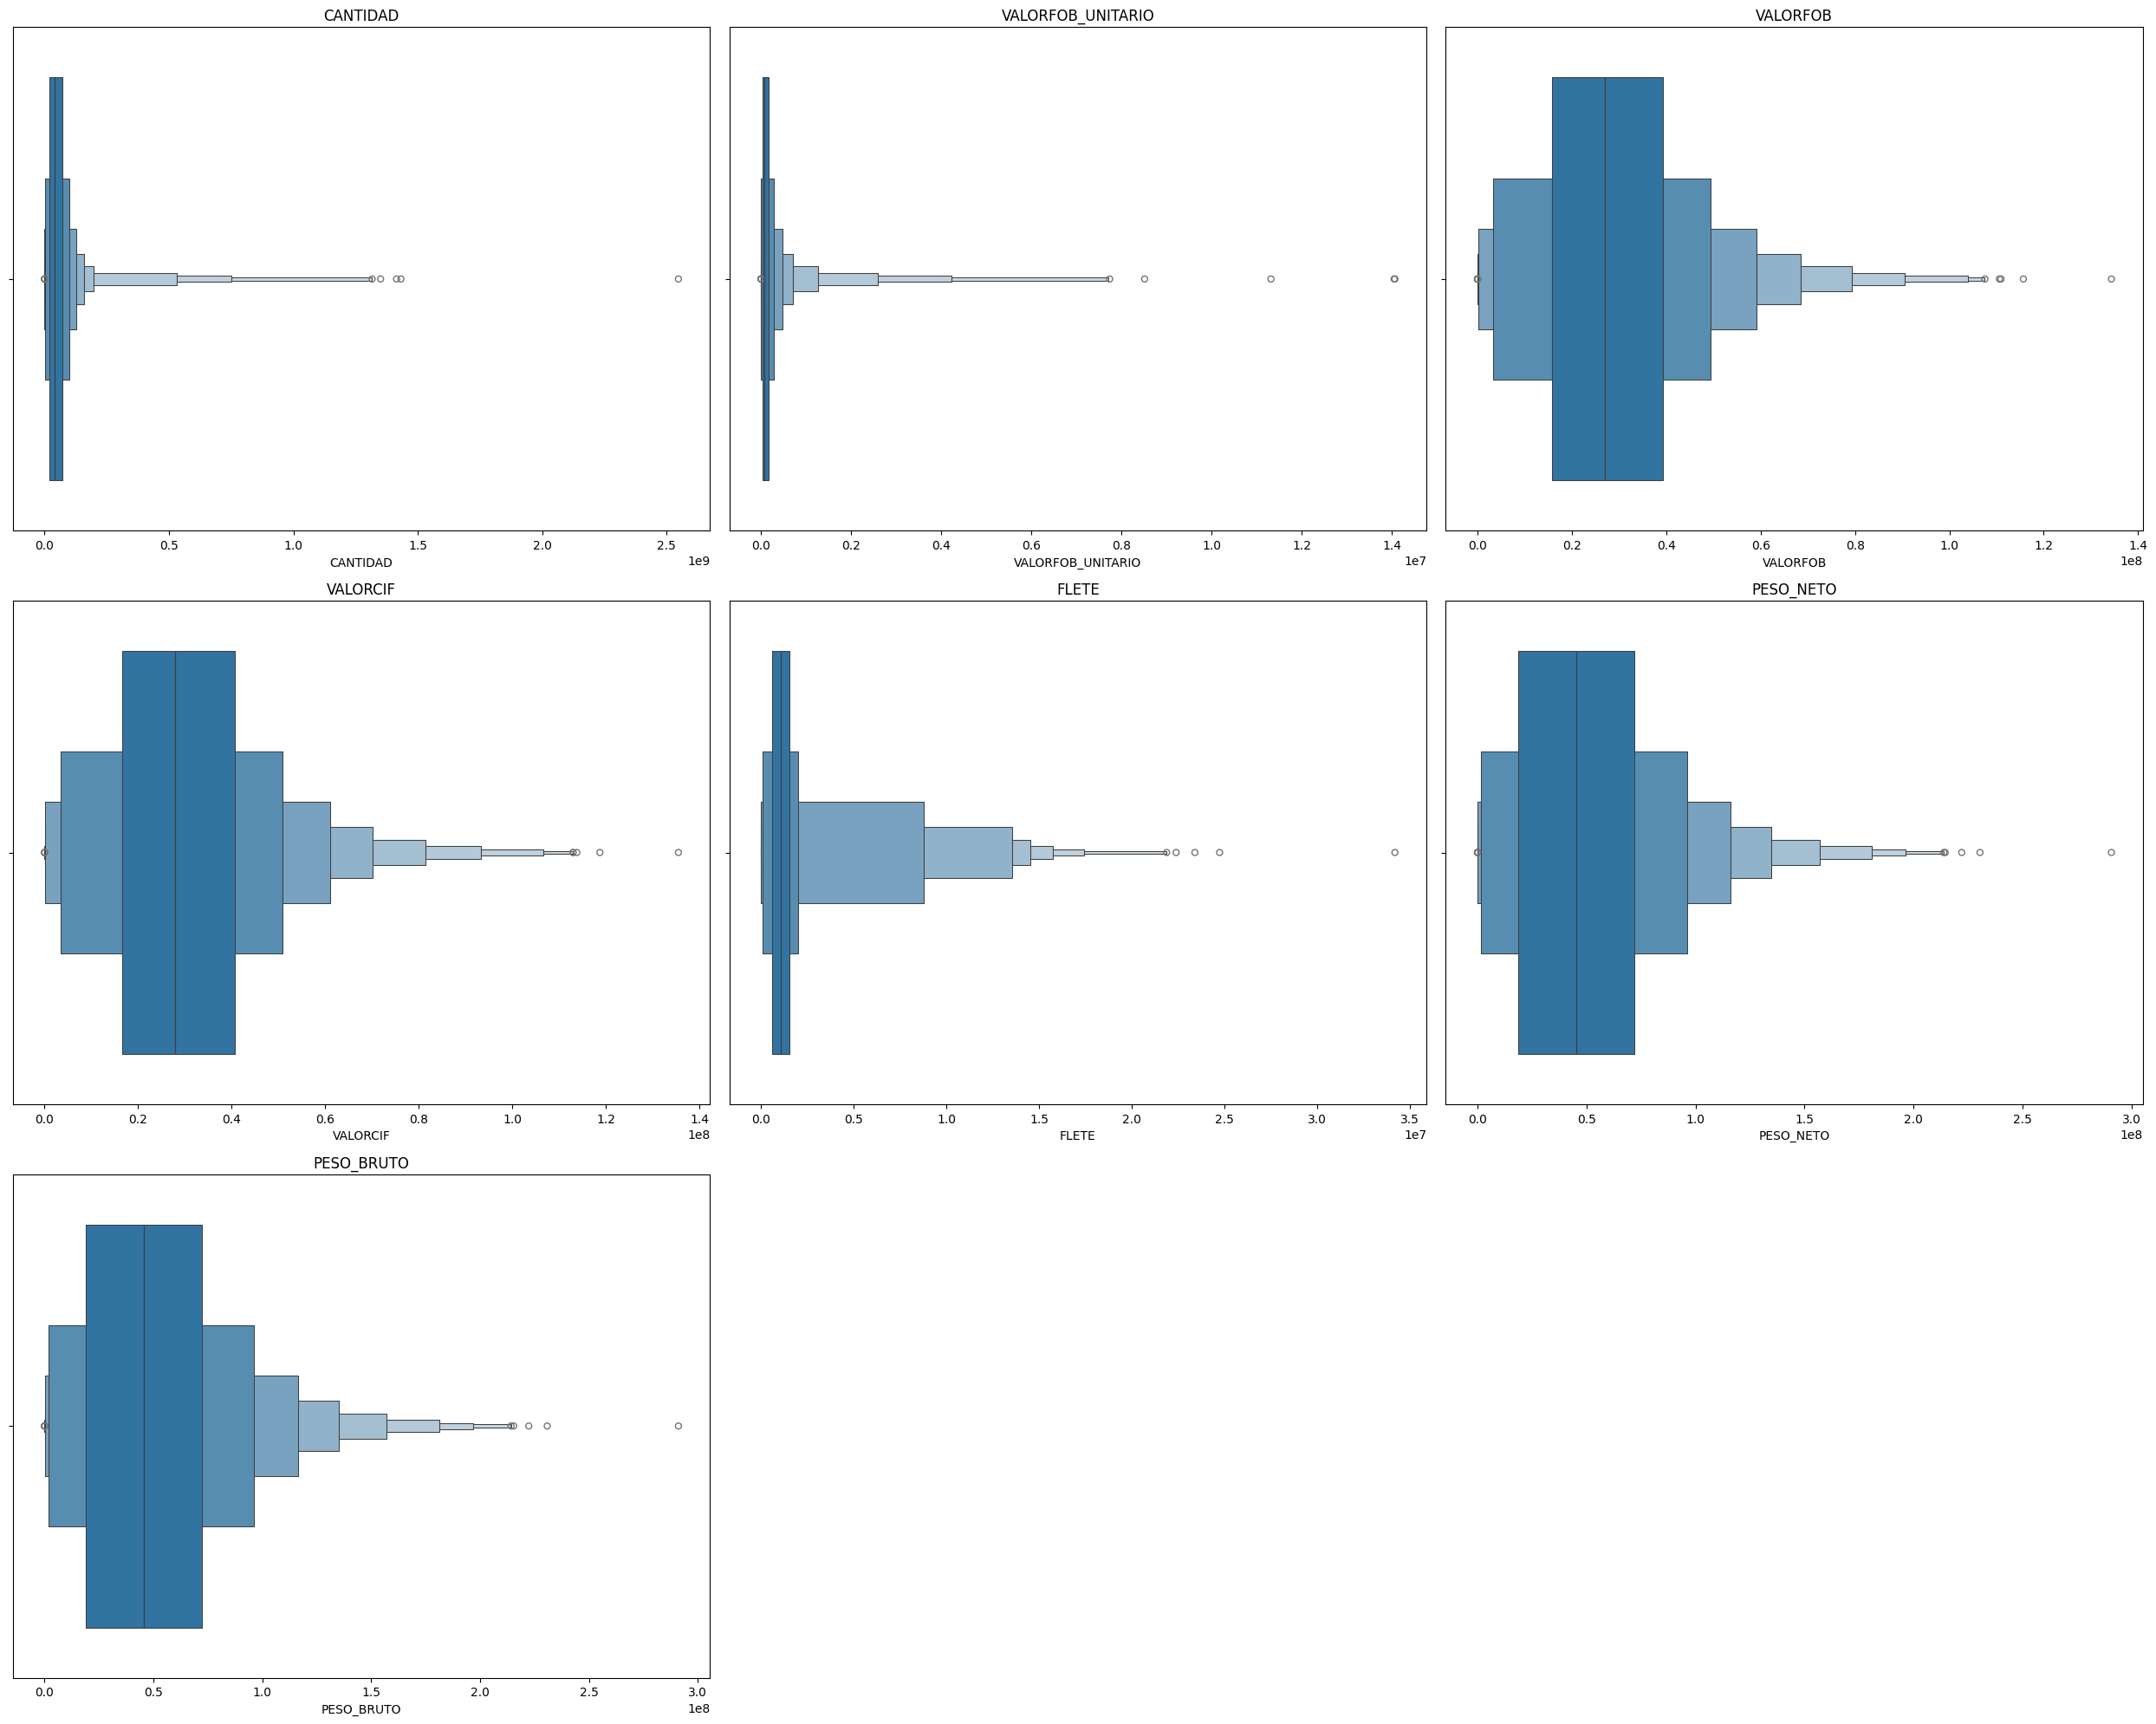

In [18]:
numeric_cols = df_new.columns

num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcula cuántas filas se necesitan

plt.figure(figsize=(25, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxenplot(data=df_new, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

Resetear indece para que la 'FECHA' aparezca como columna

In [25]:
df_new = df_new.reset_index()

In [21]:
df_new

FECHA    CANTIDAD  VALORFOB_UNITARIO   VALORFOB   VALORCIF  \
0     2018-01-02  15441265.7             9264.8  8991341.6  9609060.0   
1     2018-01-03  15048425.1            31450.6 20308838.0 21337535.6   
2     2018-01-04  39500940.0            81513.1 24415971.6 24952853.7   
3     2018-01-05  21420703.0            46323.5 18183286.1 18608459.3   
4     2018-01-06    150000.0                5.1   255231.0   270231.0   
...          ...         ...                ...        ...        ...   
2049  2024-08-27  92088747.8           192336.4 34873681.6 36706275.3   
2050  2024-08-28 143257319.6           284475.5 59436141.9 60823768.2   
2051  2024-08-29 109930019.7           484721.5 54954284.2 56882355.3   
2052  2024-08-30 129354299.6            58399.7 58653089.1 61127693.4   
2053  2024-08-31  45657031.0            15137.7  9696041.0 10024320.9   

         FLETE   PESO_NETO  PESO_BRUTO  
0     610726.1   8743621.1   8816452.1  
1    1018936.6  45325181.1  45501020.9  
2     540219.1  47773723.1  47892723.7  
3     427857.6  22801605.7  22920673.4  
4      15000.0    150000.0    150000.0  
...        ...         ...         ...  
2049 1820148.8  47075666.6  47319599.6  
2050 1370894.4 106878353.7 107138202.2  
2051 1901462.3  98224267.9 125187809.6  
2052 2465070.4  90599975.5  90904164.7  
2053  322027.0   3470299.3   3588285.7  

[2054 rows x 8 columns]

Mapa de calor para visualizar la correlacion entre variables

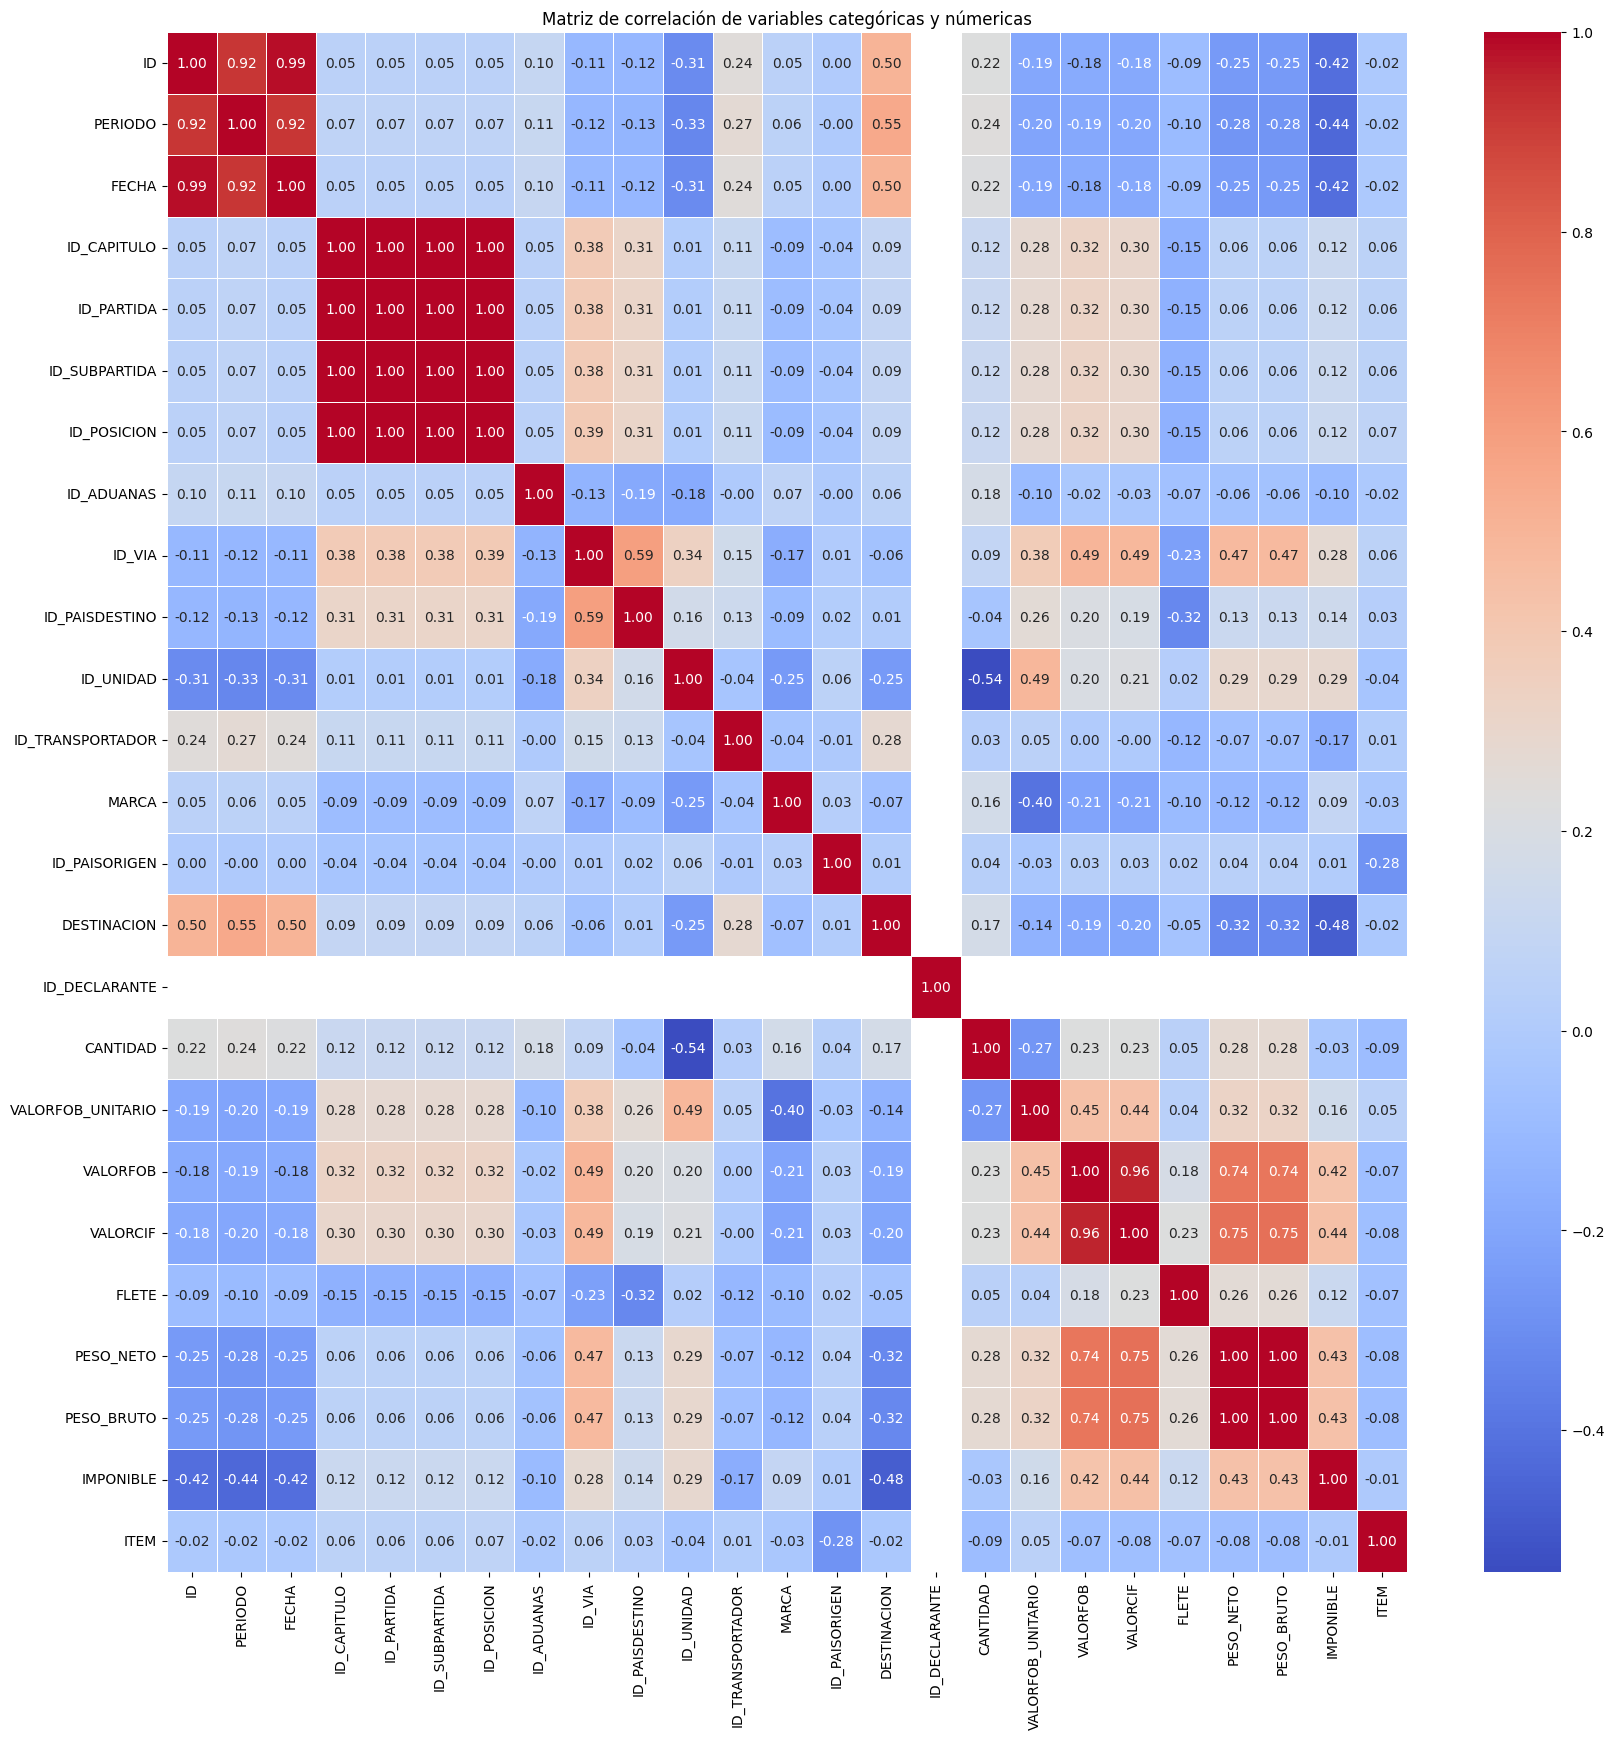

In [28]:

# Seleccionar variables categóricas
categorical_vars = ['ID','PERIODO', 'FECHA','ID_CAPITULO', 'ID_PARTIDA', 'ID_SUBPARTIDA', 'ID_POSICION', 'ID_ADUANAS', 'ID_VIA', 'ID_PAISDESTINO', 'ID_UNIDAD', 'ID_TRANSPORTADOR', 'MARCA', 'ID_PAISORIGEN', 'DESTINACION', 'ID_DECLARANTE']

# Convertir todas las variables categóricas a cadenas de texto
df_exporParaguay_Filter[categorical_vars] = df_exporParaguay_Filter[categorical_vars].astype(str)

# Convertir variables categóricas a valores numéricos
label_encoder = LabelEncoder()
for var in categorical_vars:
    df_exporParaguay_Filter[var] = label_encoder.fit_transform(df_exporParaguay_Filter[var])

# Seleccionar variables numéricas
numeric_vars = ['CANTIDAD', 'VALORFOB_UNITARIO', 'VALORFOB', 'VALORCIF', 'FLETE', 'PESO_NETO', 'PESO_BRUTO', 'IMPONIBLE', 'ITEM']

# Calcular la matriz de correlación entre variables categóricas y numéricas
correlation_matrix = df_exporParaguay_Filter[categorical_vars + numeric_vars].corr(method='kendall')

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 20))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de correlación de variables categóricas y númericas')

# Mostrar el mapa de calor
plt.show()

## Graficas para el comportamiento de ID_SUBTIPOS con respecto a la CANTIDAD

### Grafico de ID 120190

C:\Users\migue\AppData\Local\Temp\ipykernel_18820\3727879703.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_18820\3727879703.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


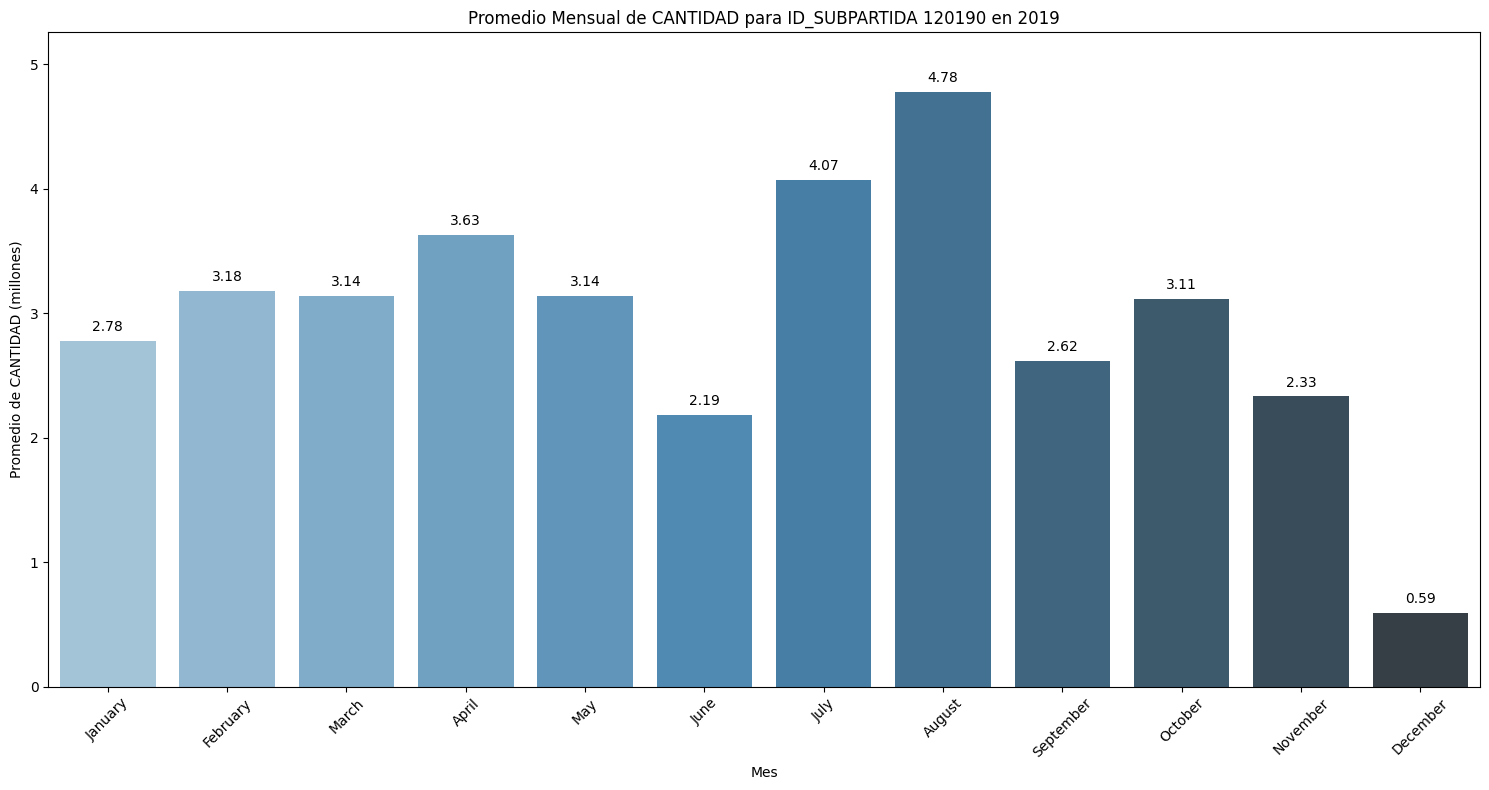

In [ ]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2019)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_22436\3101958755.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_22436\3101958755.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


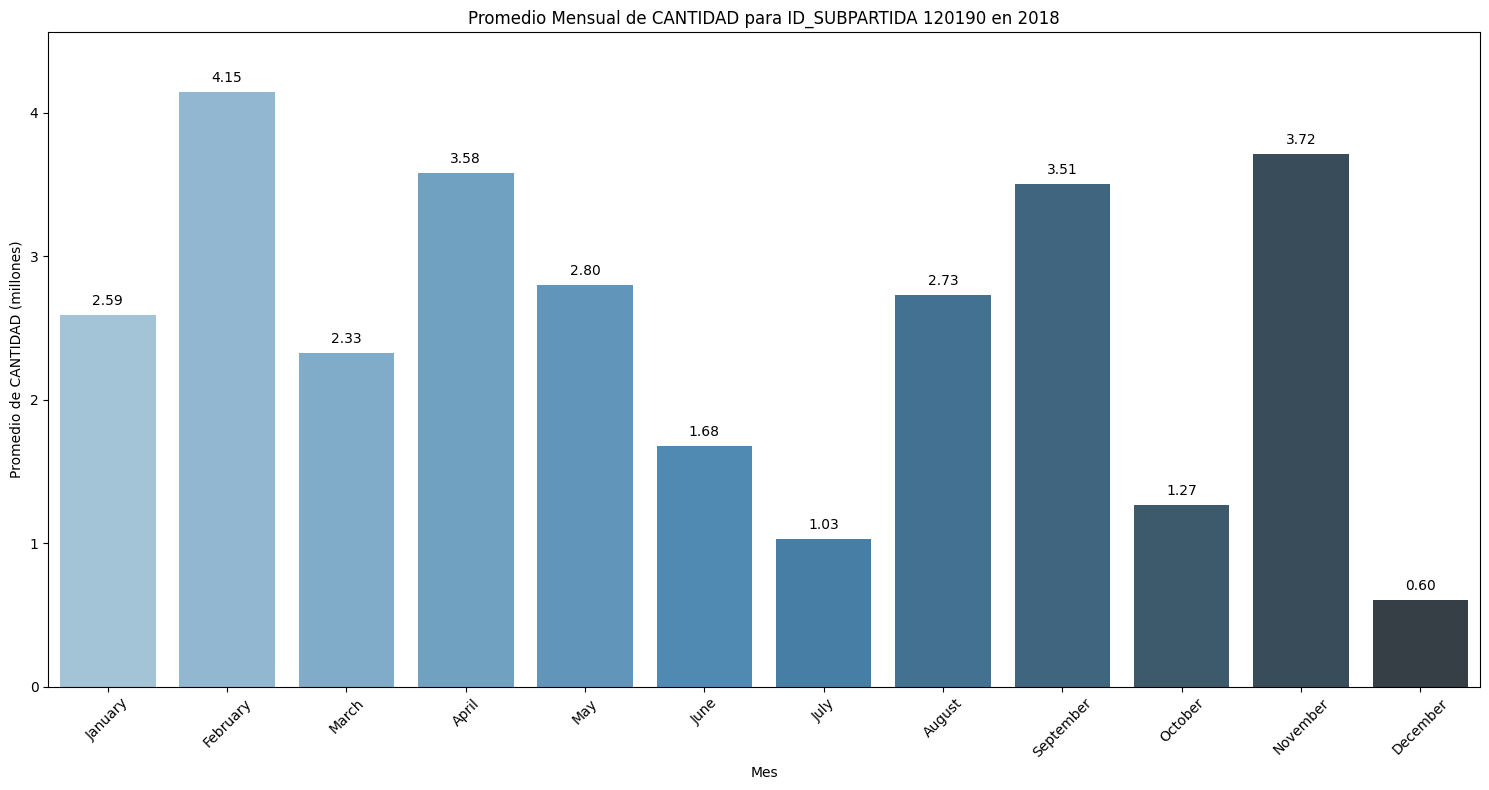

In [ ]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_CANTIDAD['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_CANTIDAD['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_CANTIDAD['FECHA'].dt.year == 2018)
df_2023 = df_expoParaguay_Filter_CANTIDAD[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en 2018')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_22436\3727879703.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_22436\3727879703.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


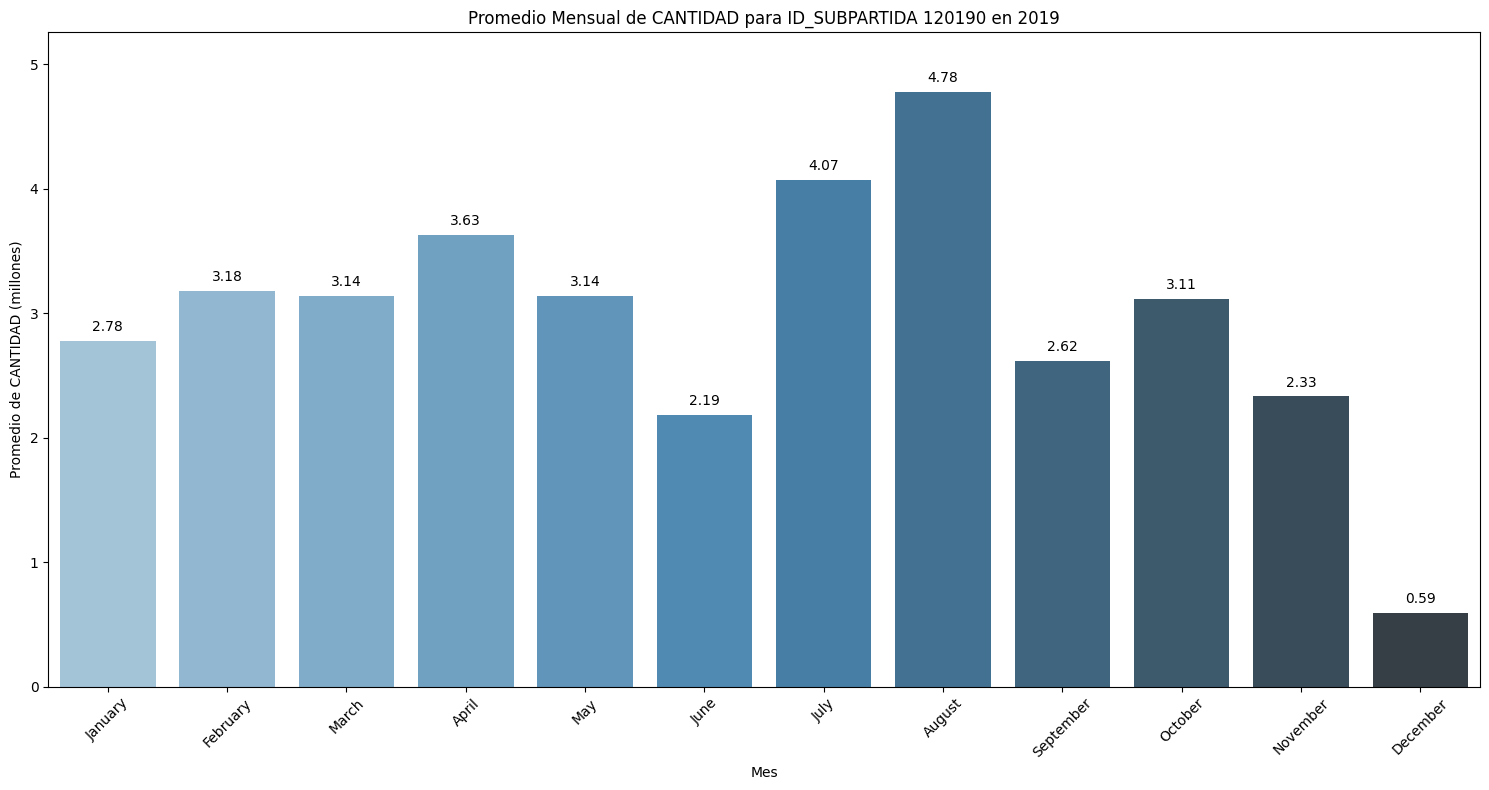

In [ ]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_CANTIDAD['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_CANTIDAD['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_CANTIDAD['FECHA'].dt.year == 2019)
df_2023 = df_expoParaguay_Filter_CANTIDAD[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_22436\786744872.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_22436\786744872.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


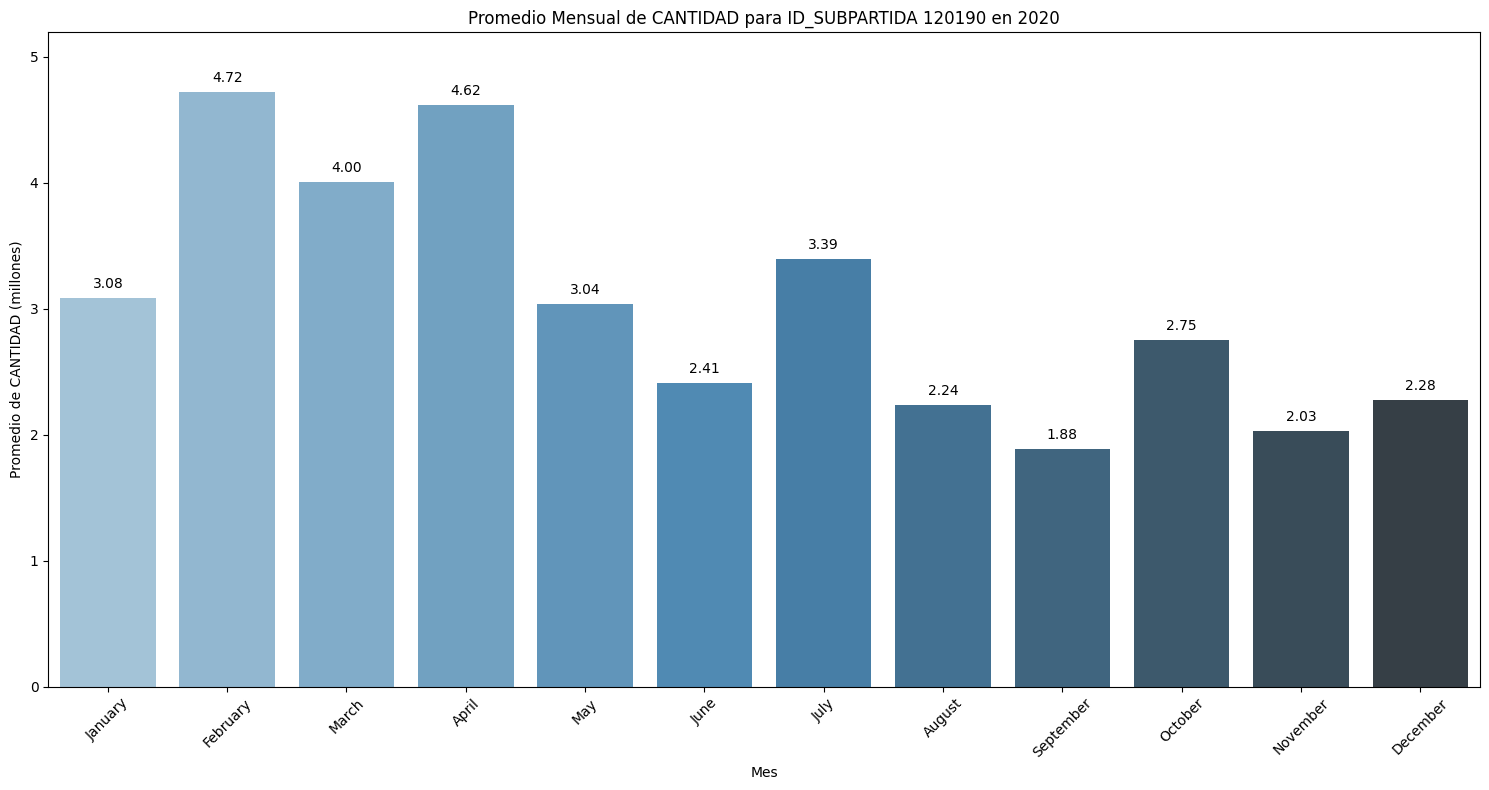

In [ ]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_CANTIDAD['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_CANTIDAD['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_CANTIDAD['FECHA'].dt.year == 2020)
df_2023 = df_expoParaguay_Filter_CANTIDAD[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_22436\530684193.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_22436\530684193.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


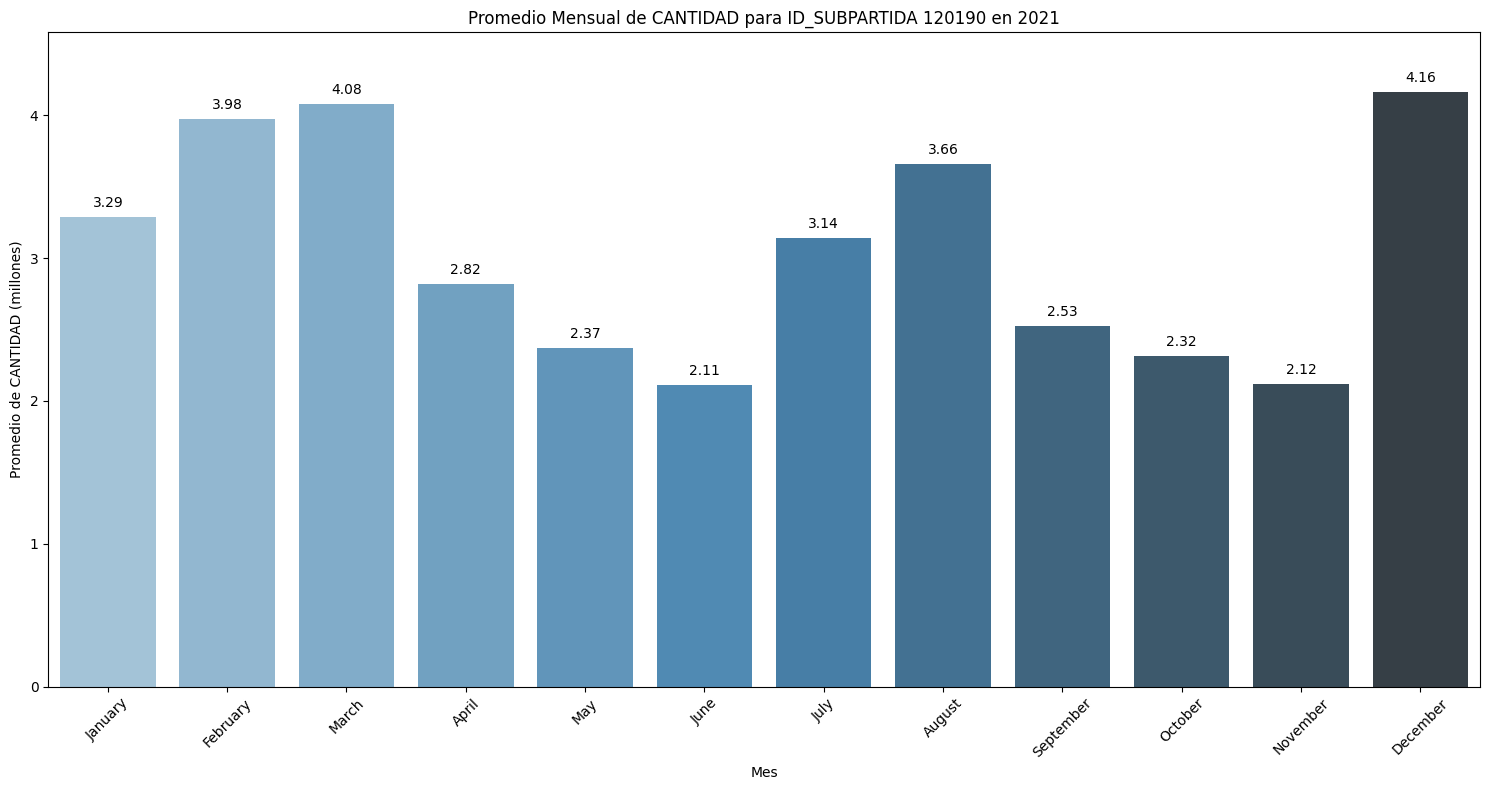

In [19]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2021)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1805233433.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1805233433.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




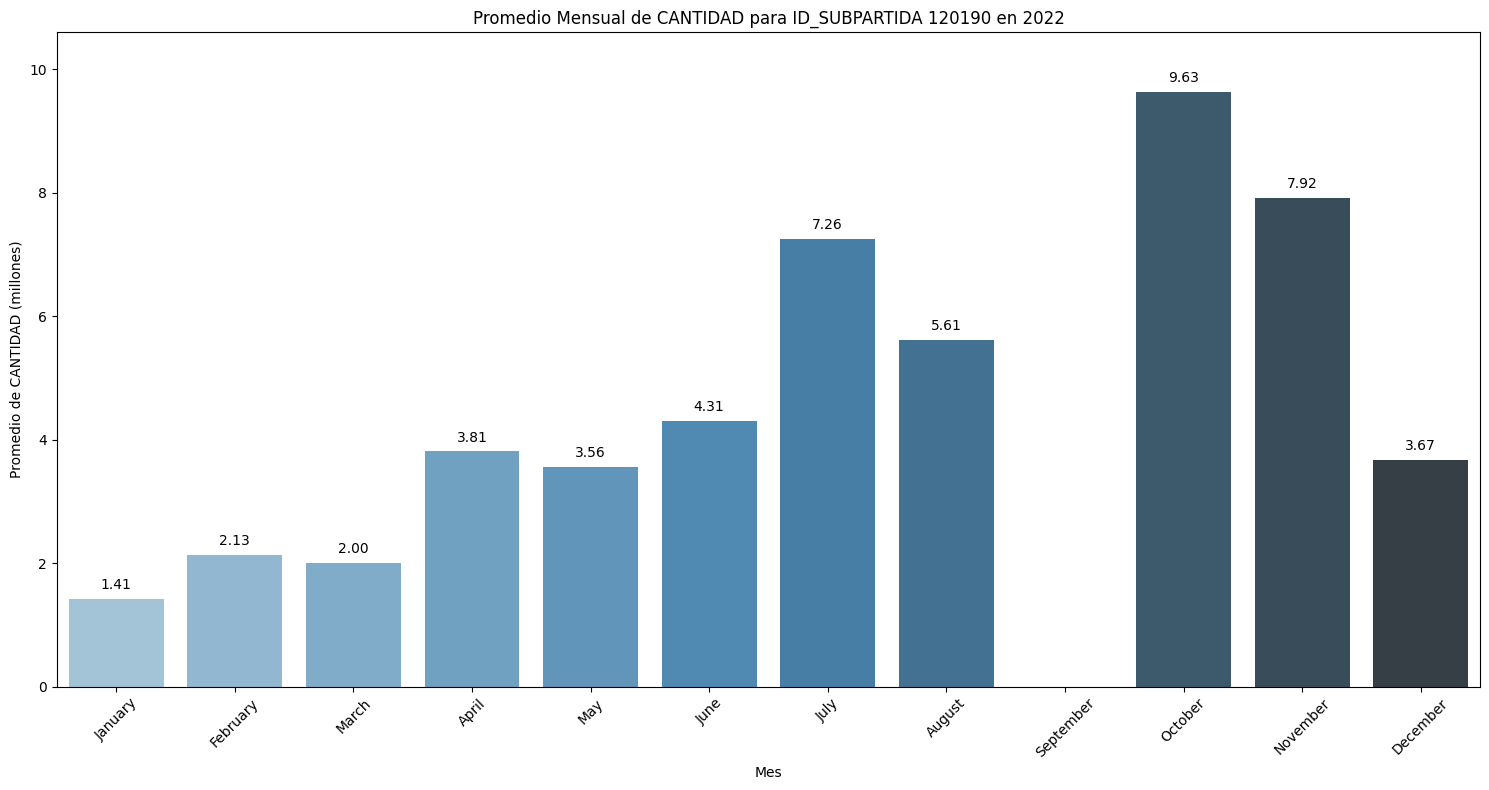

In [83]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2022)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_22436\1876555453.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_22436\1876555453.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


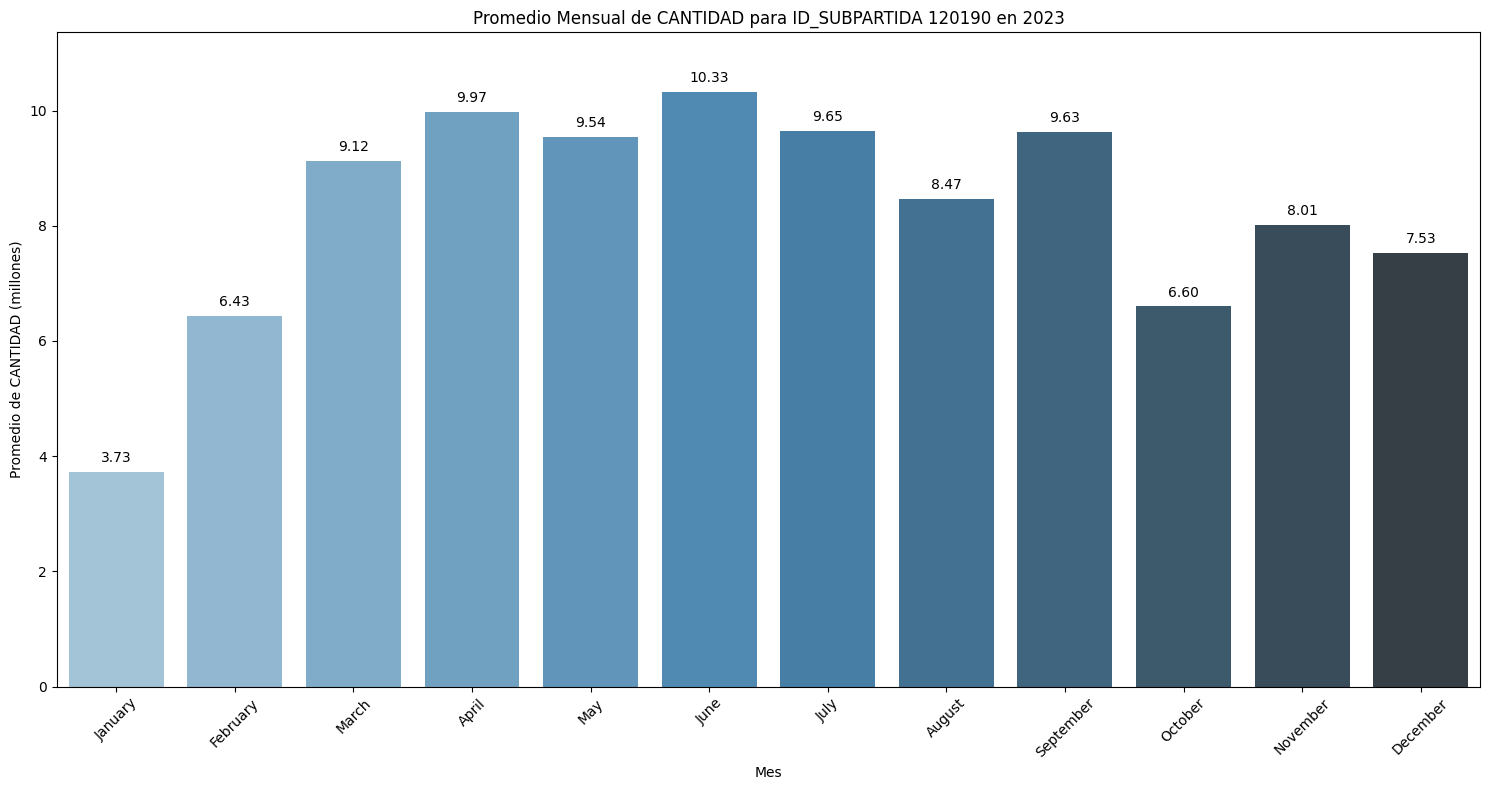

In [20]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2023)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_22436\4291012708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_22436\4291012708.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


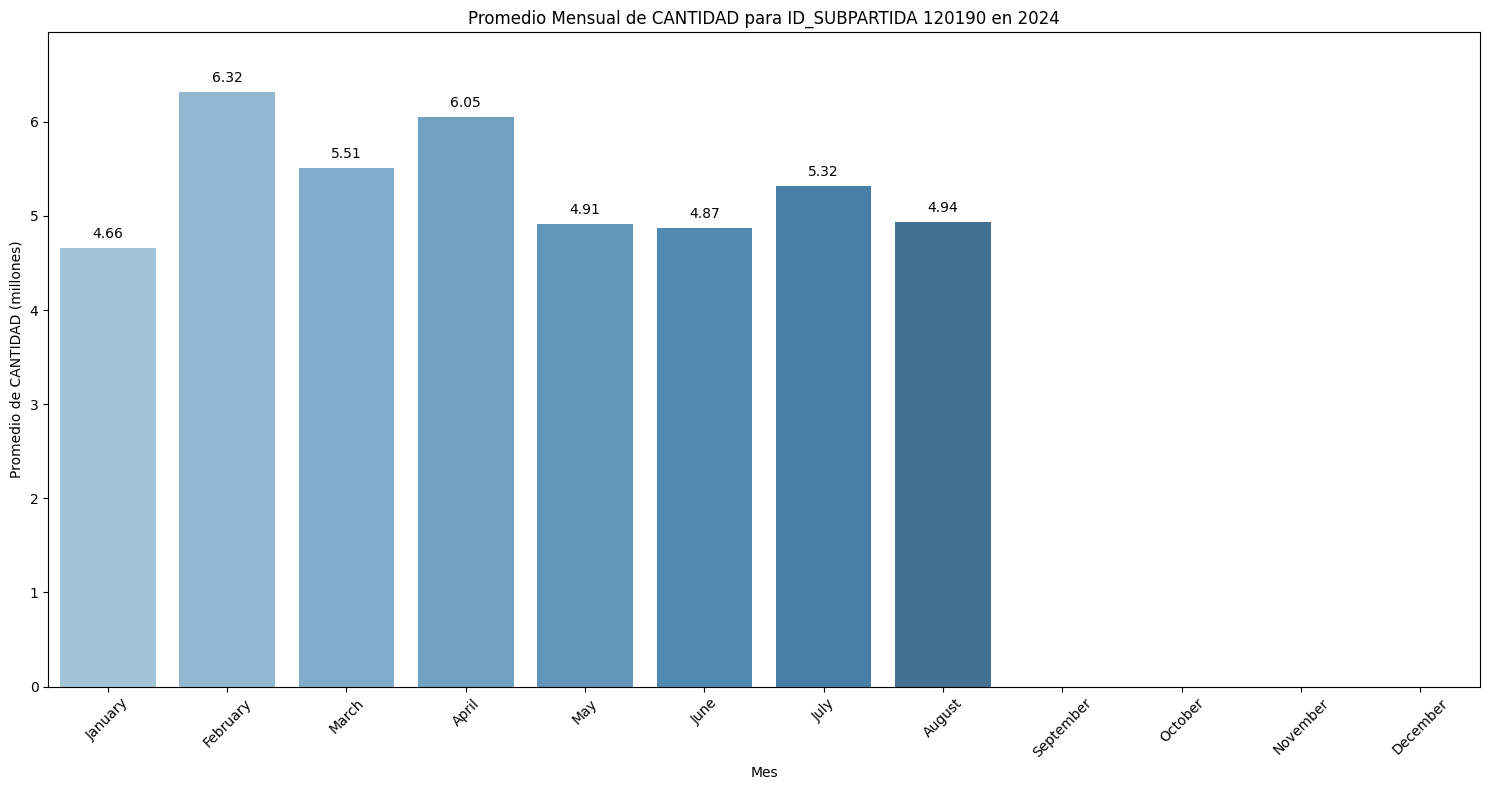

In [21]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2024)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [27]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_exporParaguay_Filter[df_exporParaguay_Filter['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='CANTIDAD', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de CANTIDAD',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_22436\569228365.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_22436\569228365.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Analisis**

La soja suele ser sembrada en Paraguay entre octubre y diciembre, con la cosecha principal ocurriendo de febrero a abril. Esto podría explicar los picos de exportación en los primeros meses del año (especialmente de febrero a mayo), dado que la cosecha suele estar disponible y lista para la exportación en este periodo.

En 2023 y 2022, se observan datos altos, superando los 10 millones de unidades de cantidad. Esto podría estar relacionado con una cosecha excepcionalmente buena o una alta demanda en los mercados internacionales (Ya que era epoca post-pandemia). Por otro lado, en otros años como 2018 y 2019, los niveles de exportación son mucho menores en comparación, lo que sugiere variabilidad en la producción o demanda externa. (Probabelemente debido a la pandemia)

En años de torneos internacionales de fútbol (como el Mundial en 2018 y 2022), los cuales comienzan alrederor de julio, los patrones no se ven afectados.

Las festividades importantes o las vacaciones pueden reducir temporalmente las exportaciones. Esto puede explicar algunos de los declives en los meses de diciembre. Además, factores climáticos, como la temporada de lluvias entre noviembre y enero, podrían afectar el transporte.

En general, se observan fluctuaciones año tras año, con un aumento significativo en 2022 y 2023. Estos podrían ser años de cosechas particularmente buenas, mejor infraestructura o un aumento en los precios de la soja

Meses de mayor actividad: Febrero, Marzo, Abril, Mayo

### Grafico del ID 100590

C:\Users\migue\AppData\Local\Temp\ipykernel_18820\932905613.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_18820\932905613.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


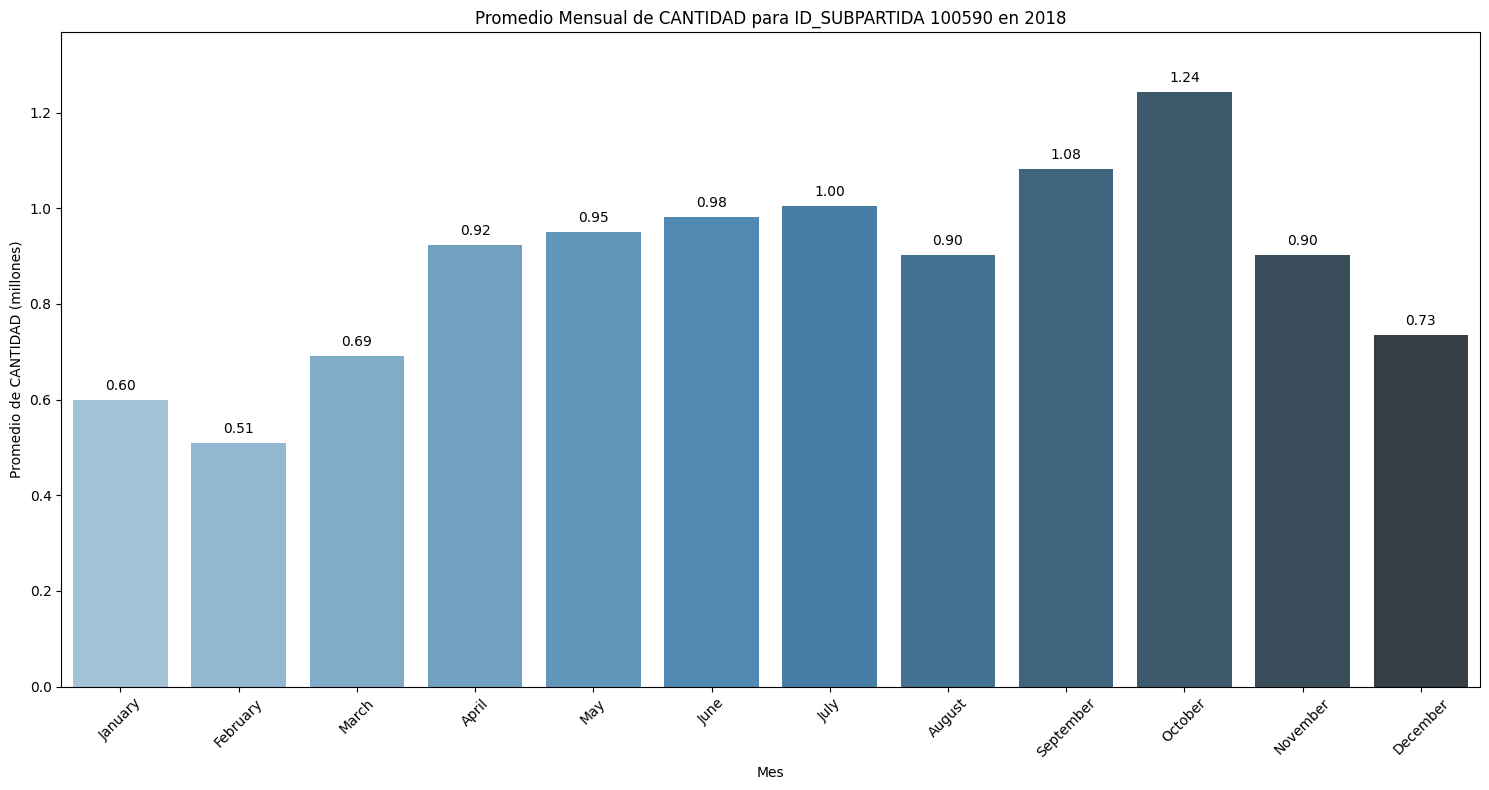

In [14]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2018)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 100590]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 100590 en 2018')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_18820\2596843795.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_18820\2596843795.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


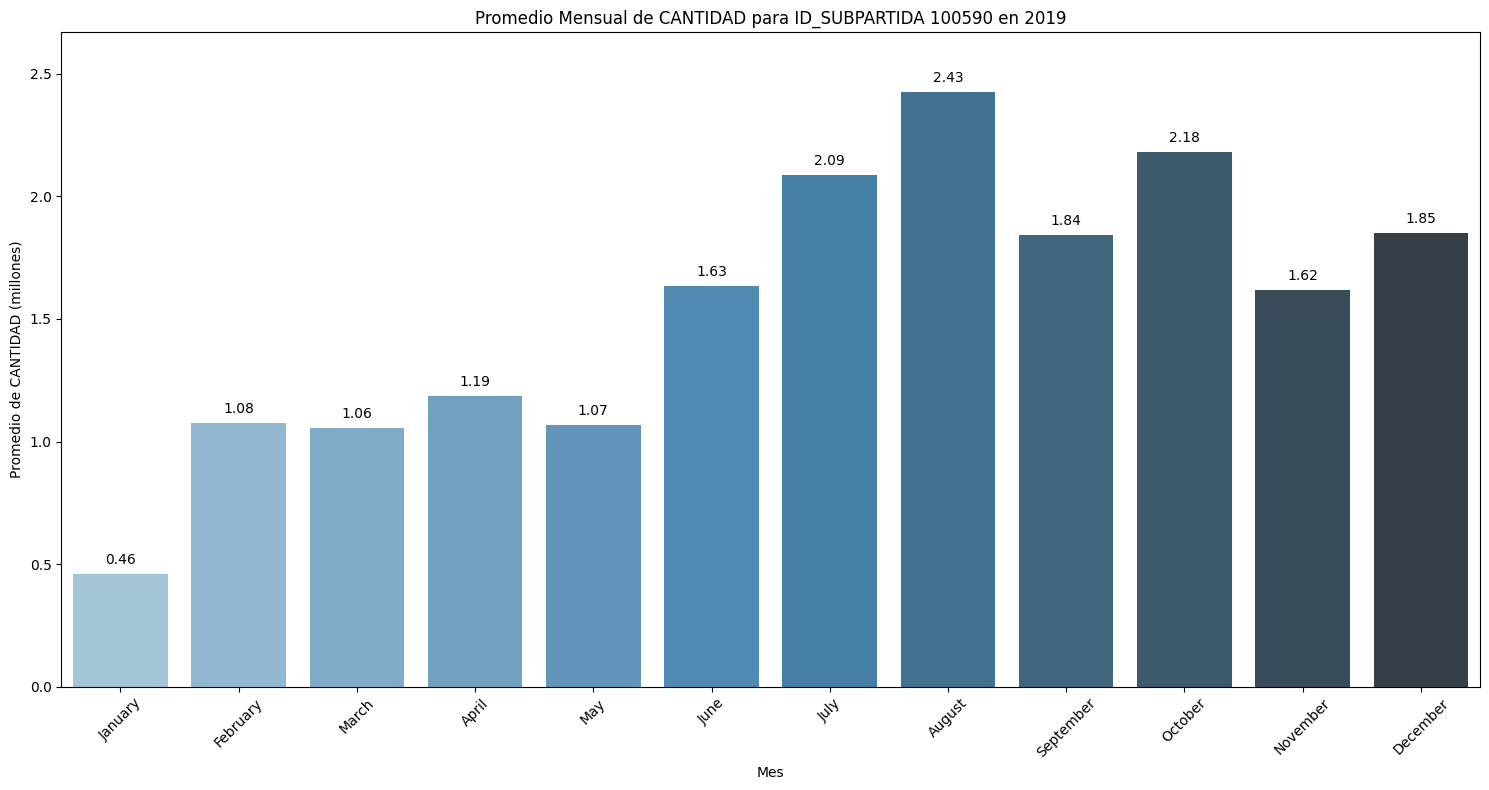

In [15]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2019)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 100590]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 100590 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_18820\595290187.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_18820\595290187.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


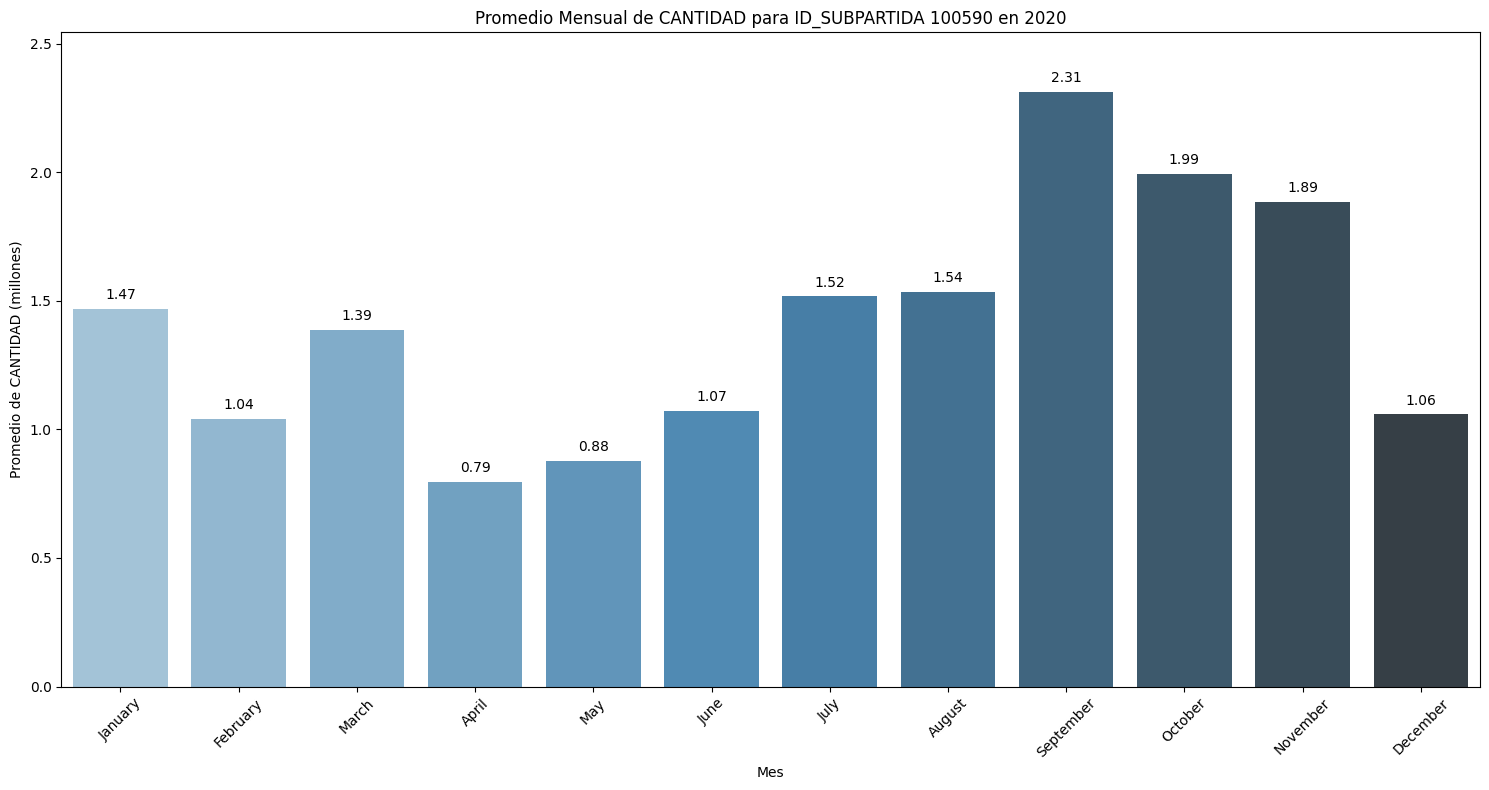

In [17]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2020)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 100590]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 100590 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_18820\3913763711.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_18820\3913763711.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


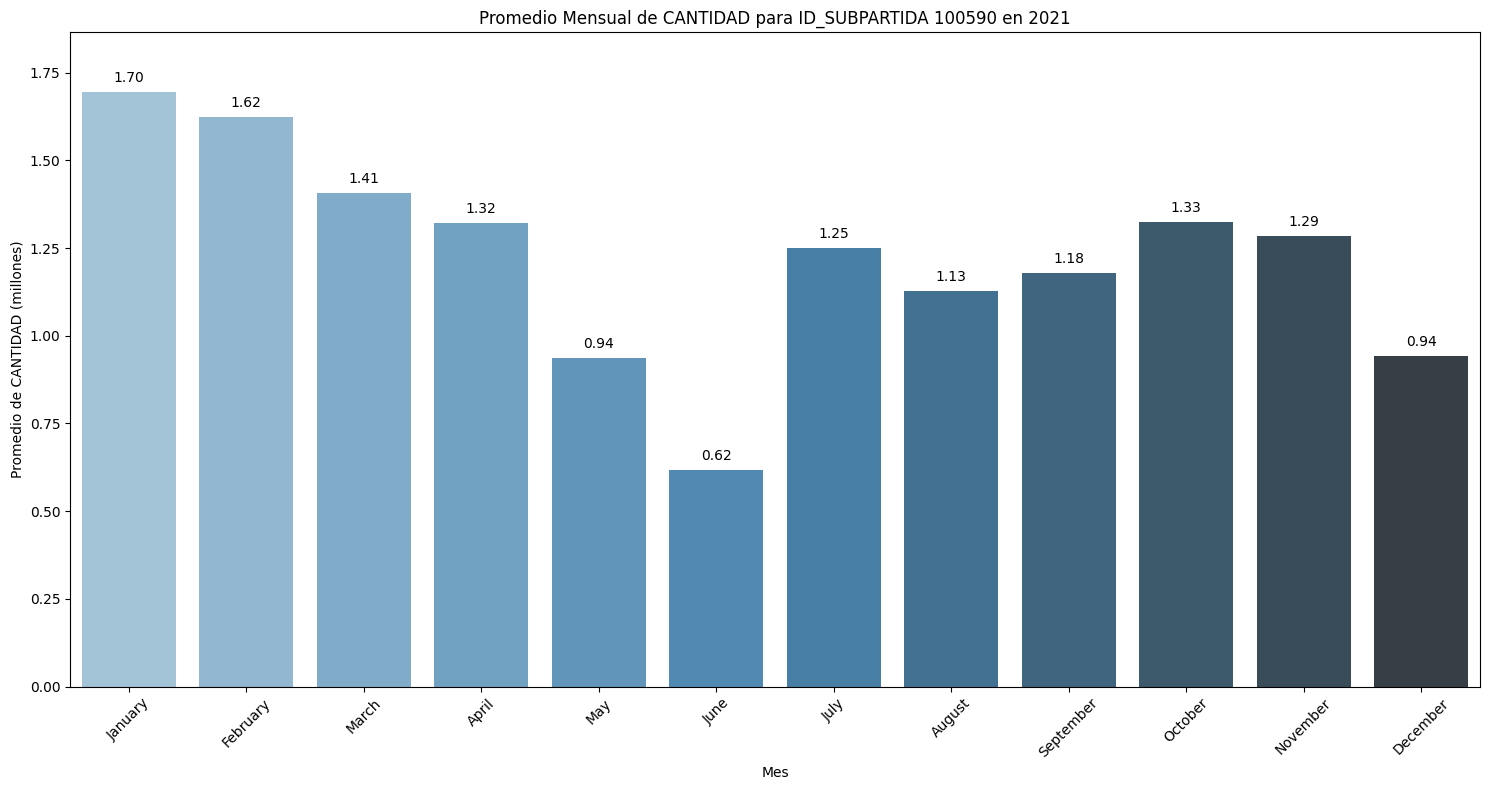

In [18]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2021)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 100590]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 100590 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_18820\731820611.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_18820\731820611.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


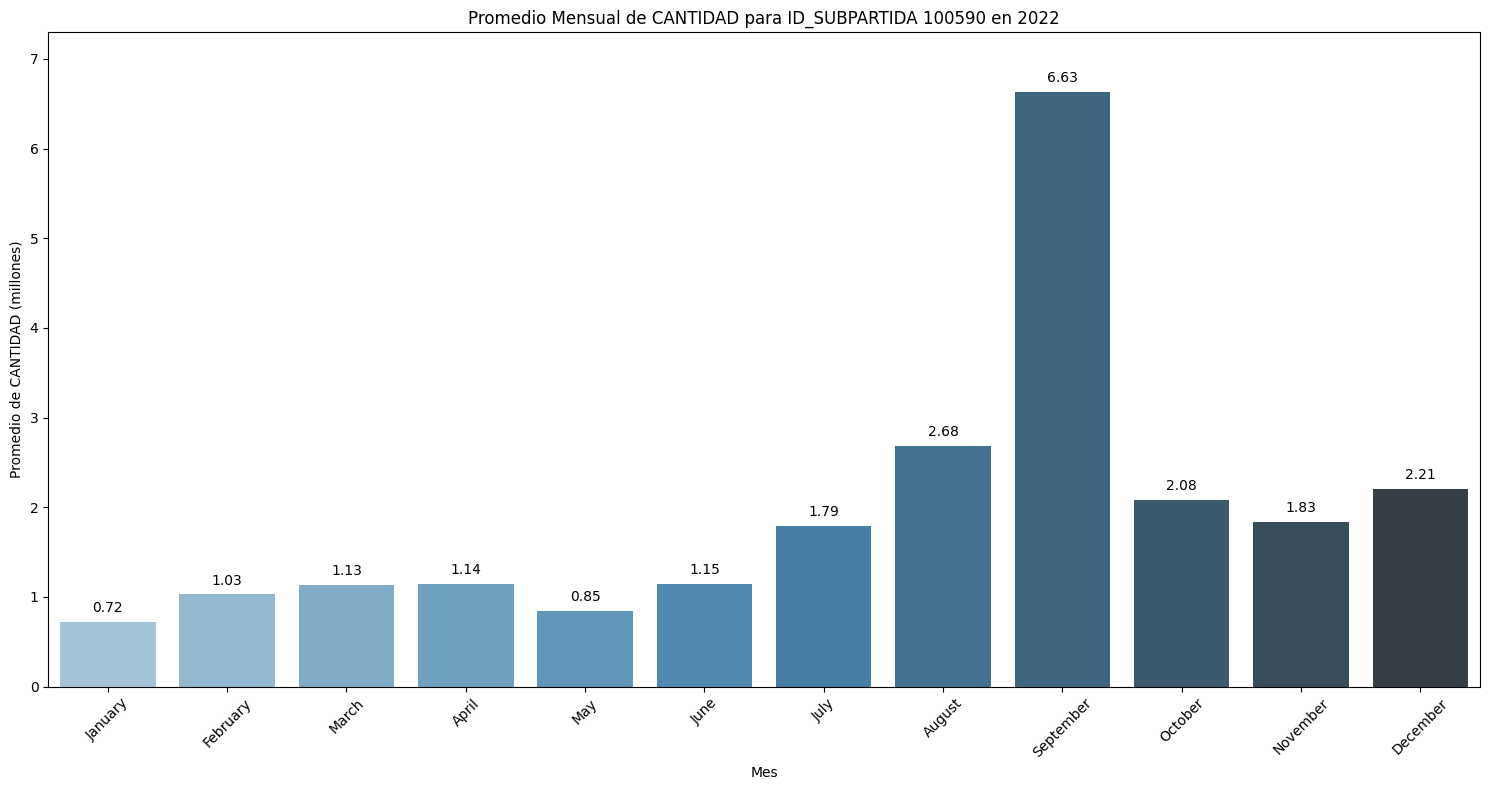

In [19]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2022)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 100590]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 100590 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_18820\3702961695.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_18820\3702961695.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


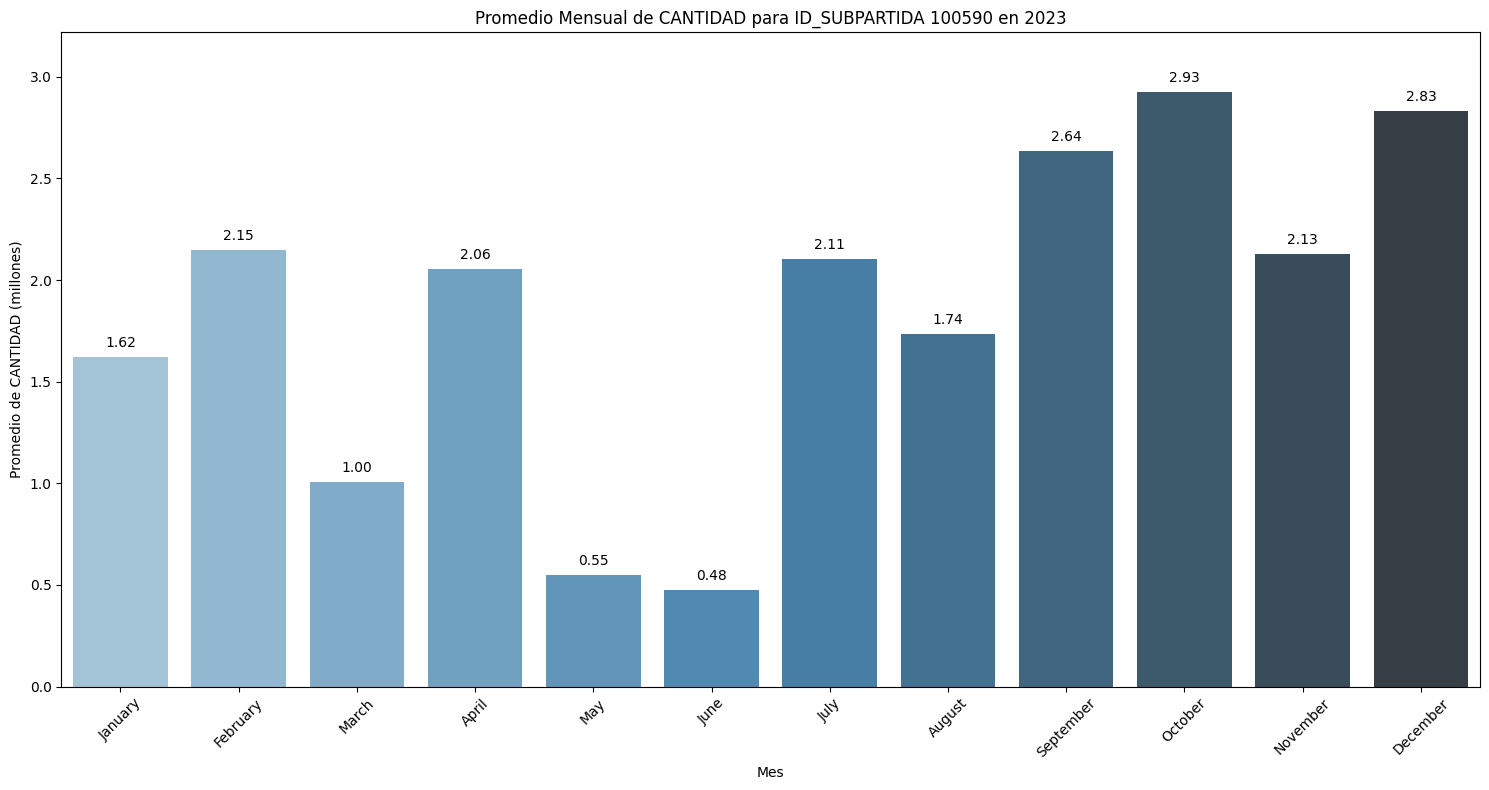

In [20]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2023)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 100590]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 100590 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_18820\3004779784.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_18820\3004779784.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


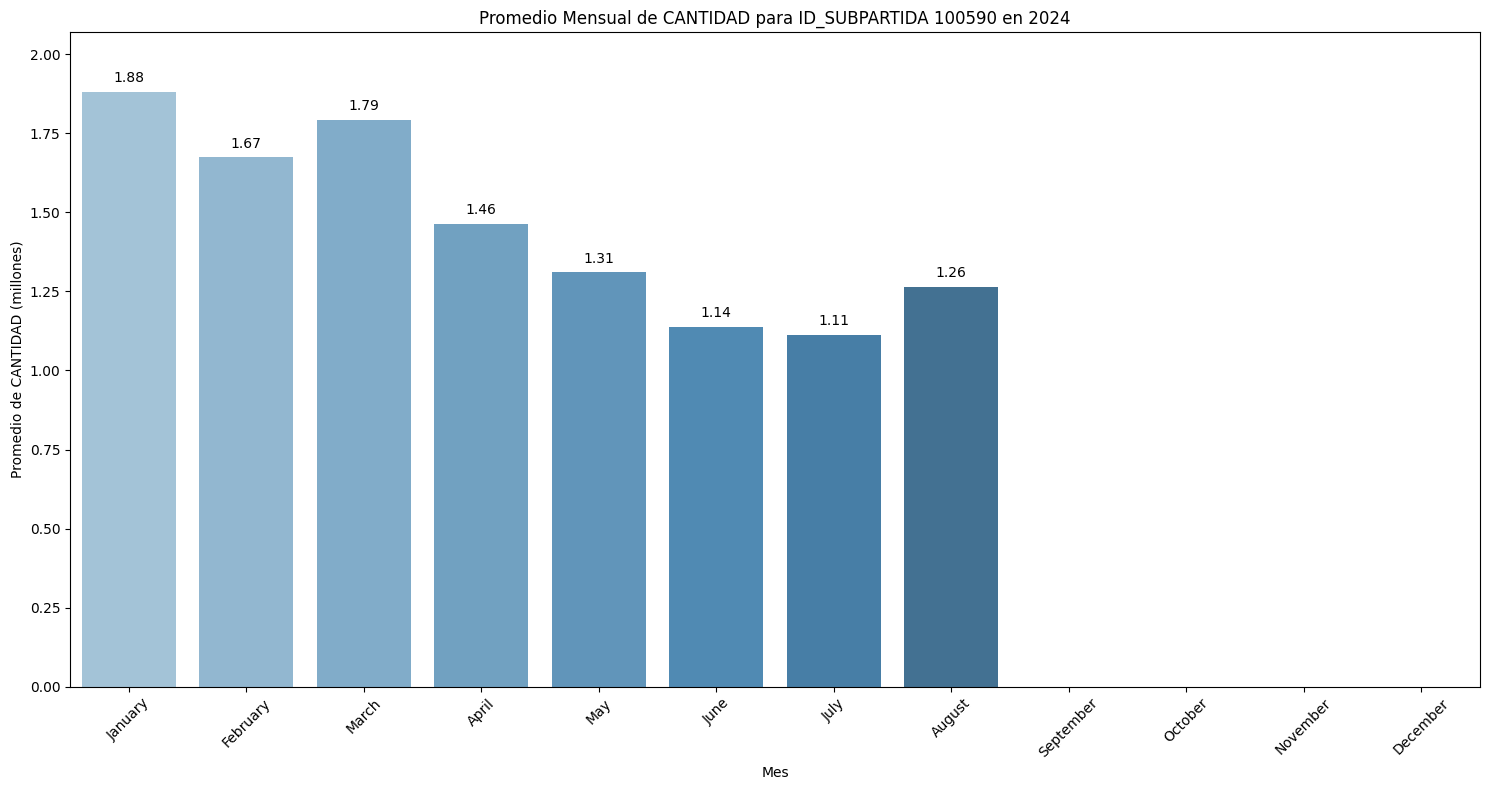

In [21]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2024)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 100590]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 100590 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [22]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_exporParaguay_Filter[df_exporParaguay_Filter['ID_SUBPARTIDA'] == 100590]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='CANTIDAD', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de CANTIDAD',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_18820\2409639249.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_18820\2409639249.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Año'] = df_subpartida['FECHA'].dt.year


**Analisis**

En la mayoría de los años, las exportaciones tienden a ser más bajas al inicio del año y luego aumentan en los meses de verano (especialmente entre agosto y octubre).
El año 2022 muestra un pico muy pronunciado en septiembre, donde el promedio de exportación alcanzó más de 6 millones de unidades. Esto sugiere una demanda excepcional o una cosecha abundante en ese periodo.

2022 destaca como un año atípico con volúmenes de exportación considerablemente mayores, sobre todo en los últimos 4 meses del año
Los años 2021, 2020, y 2018 muestran volúmenes más estables y menores en comparación con 2022, con algunas variaciones menores, pero sin picos significativos.
2023 y 2024 también muestran una tendencia al alza, aunque en menor magnitud que 2022, especialmente hacia el final del año. Esto podría ser indicativo de un aumento gradual en la demanda o en la producción.

Existe una tendencia estacional evidente en la que las exportaciones de maíz amarillo aumentan durante ciertos meses del año. Esto podría estar relacionado con la temporada de cosecha o con la demanda del mercado internacional en esos periodos específicos.

Mayo y Junio suelen tener los valores promedio más bajos en varios años, lo que sugiere una posible reducción en la producción o en la demanda en estos meses.

La gráfica parece reflejar una fuerte estacionalidad en la exportación de maíz amarillo en Paraguay, con aumentos significativos en algunos años debido a factores específicos (como se observa en 2022).
La variabilidad en los picos anuales sugiere que la exportación de maíz amarillo está influenciada por condiciones climáticas, cambios en la demanda global o políticas comerciales, especialmente en el caso del pico inusual de 2022.

Meses de mayor actividad: Agosto, Septiembre, Octubre

### Grafico ID 230400

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\2617980747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_19176\2617980747.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


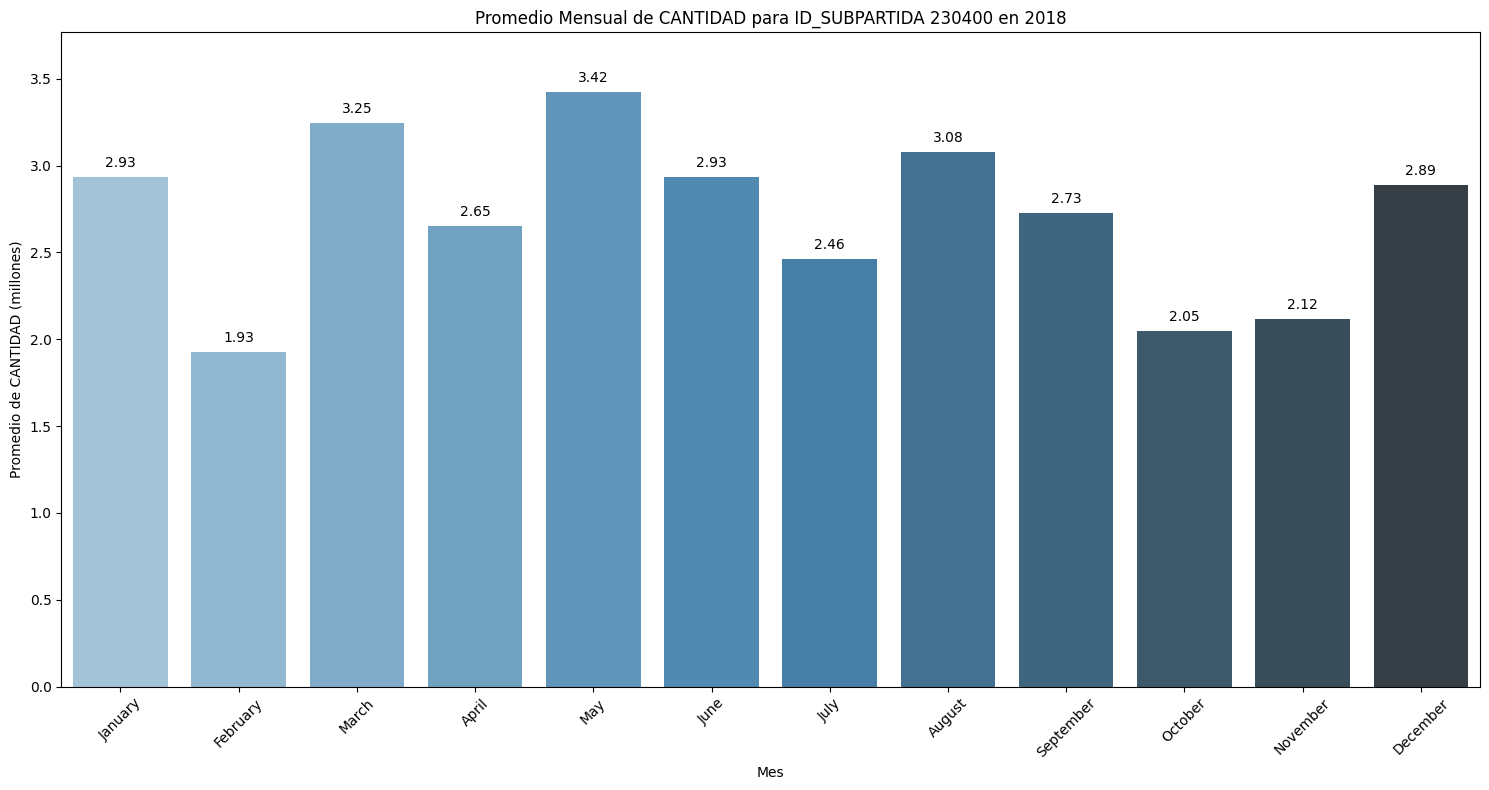

In [15]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2018)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 230400 en 2018')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3997803297.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3997803297.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


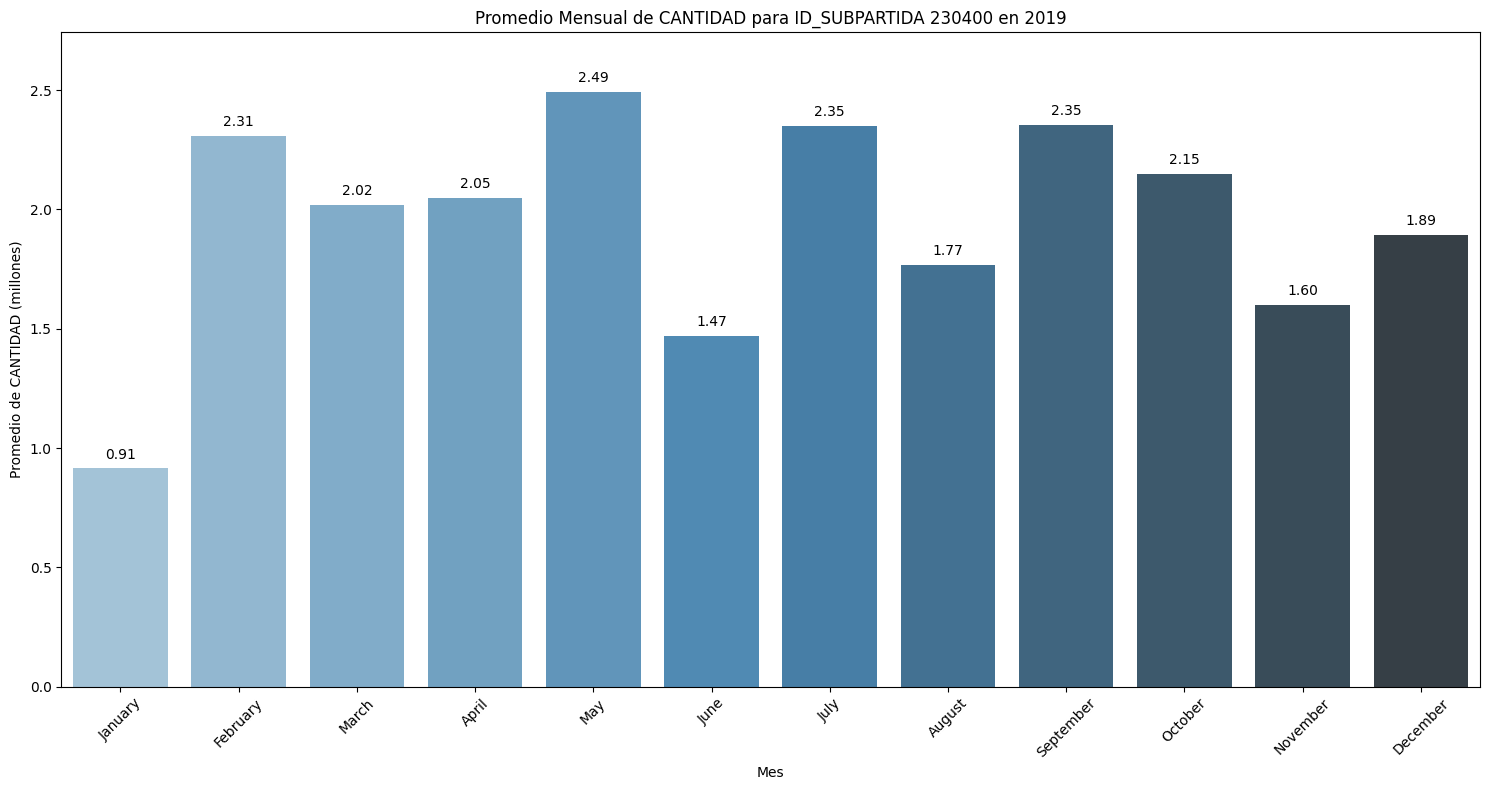

In [16]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2019)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 230400 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\2040174161.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_19176\2040174161.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


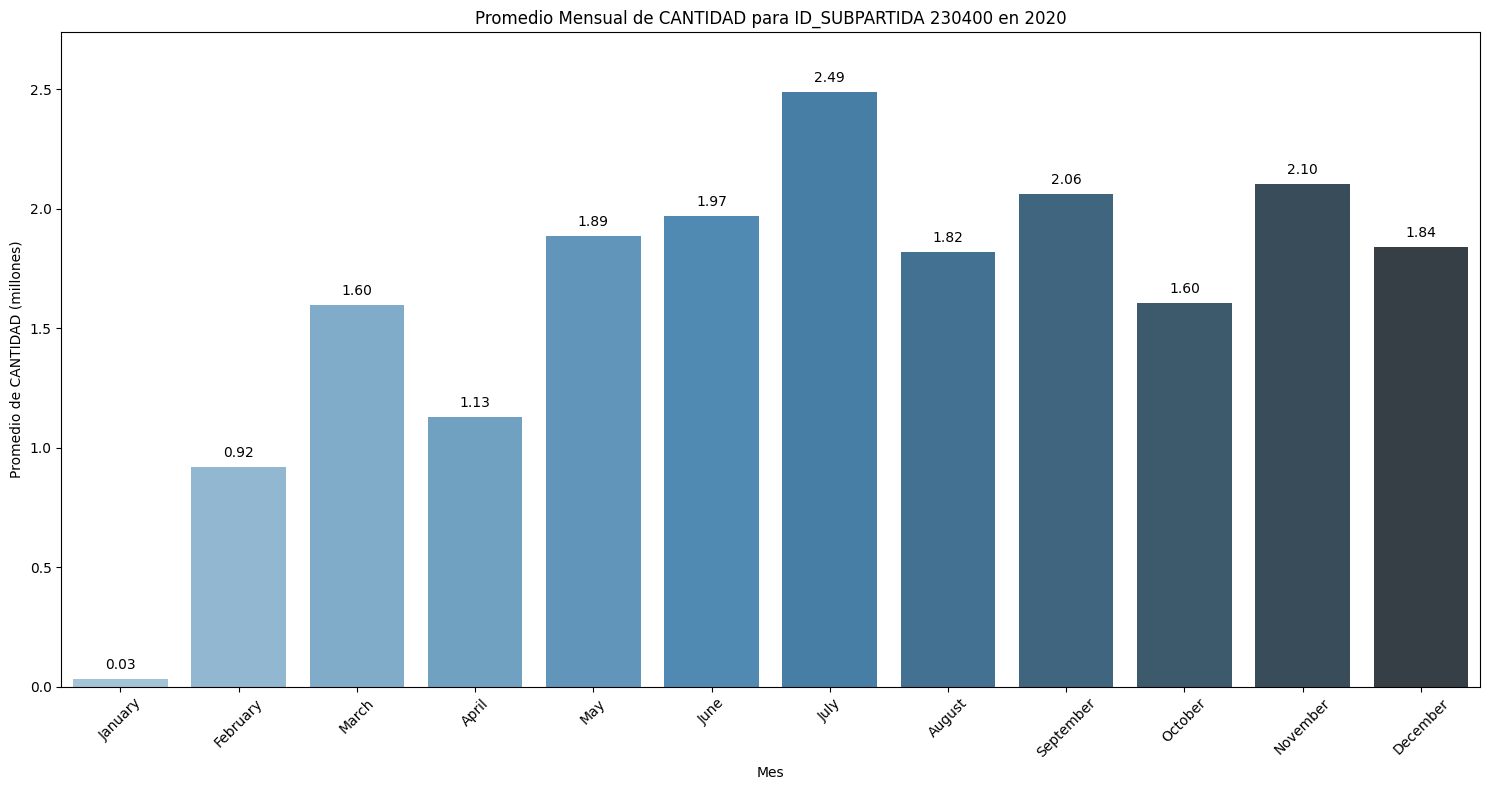

In [17]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2020)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 230400 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\4215435125.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_19176\4215435125.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


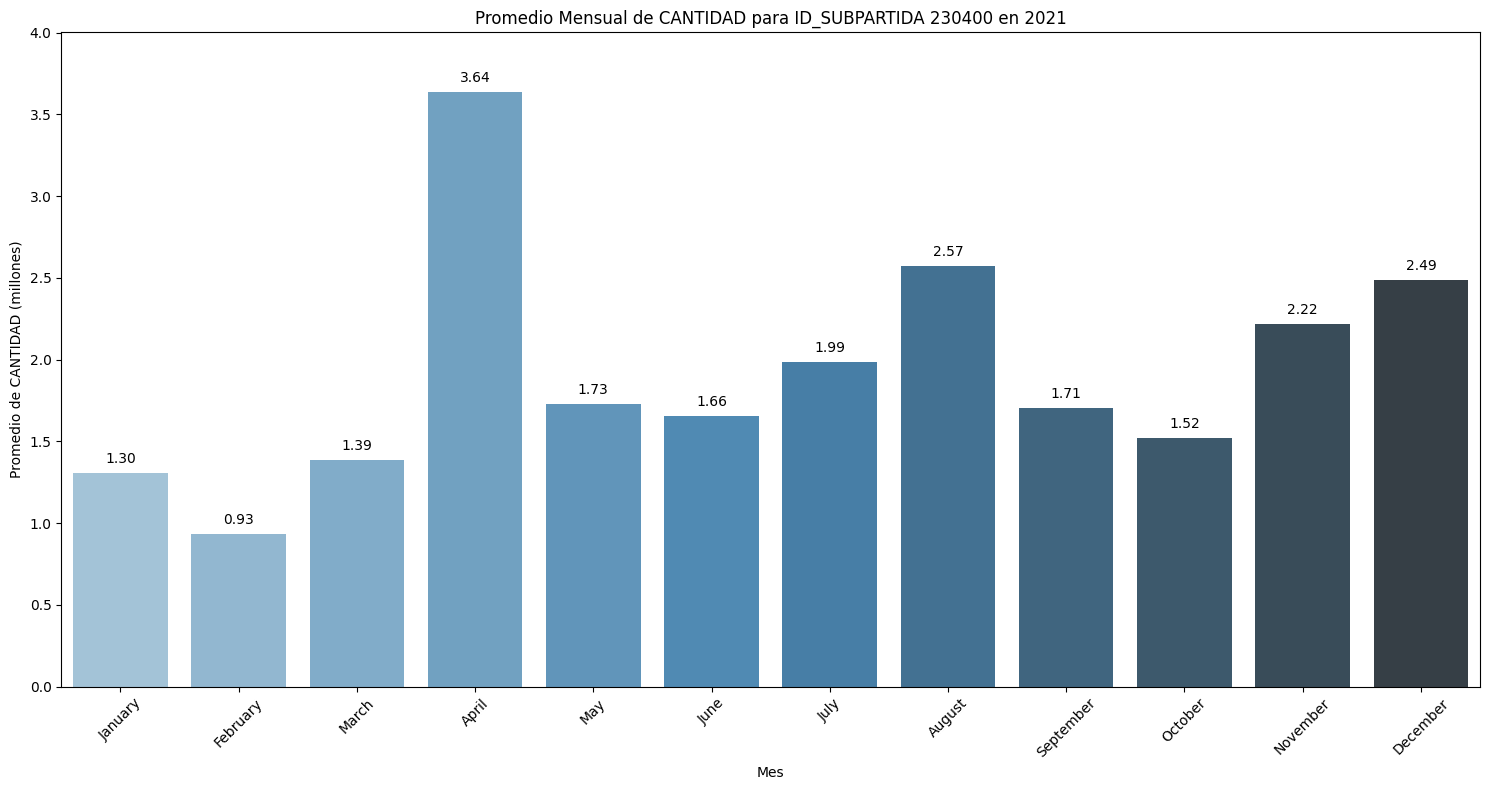

In [18]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2021)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 230400 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1417148313.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1417148313.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


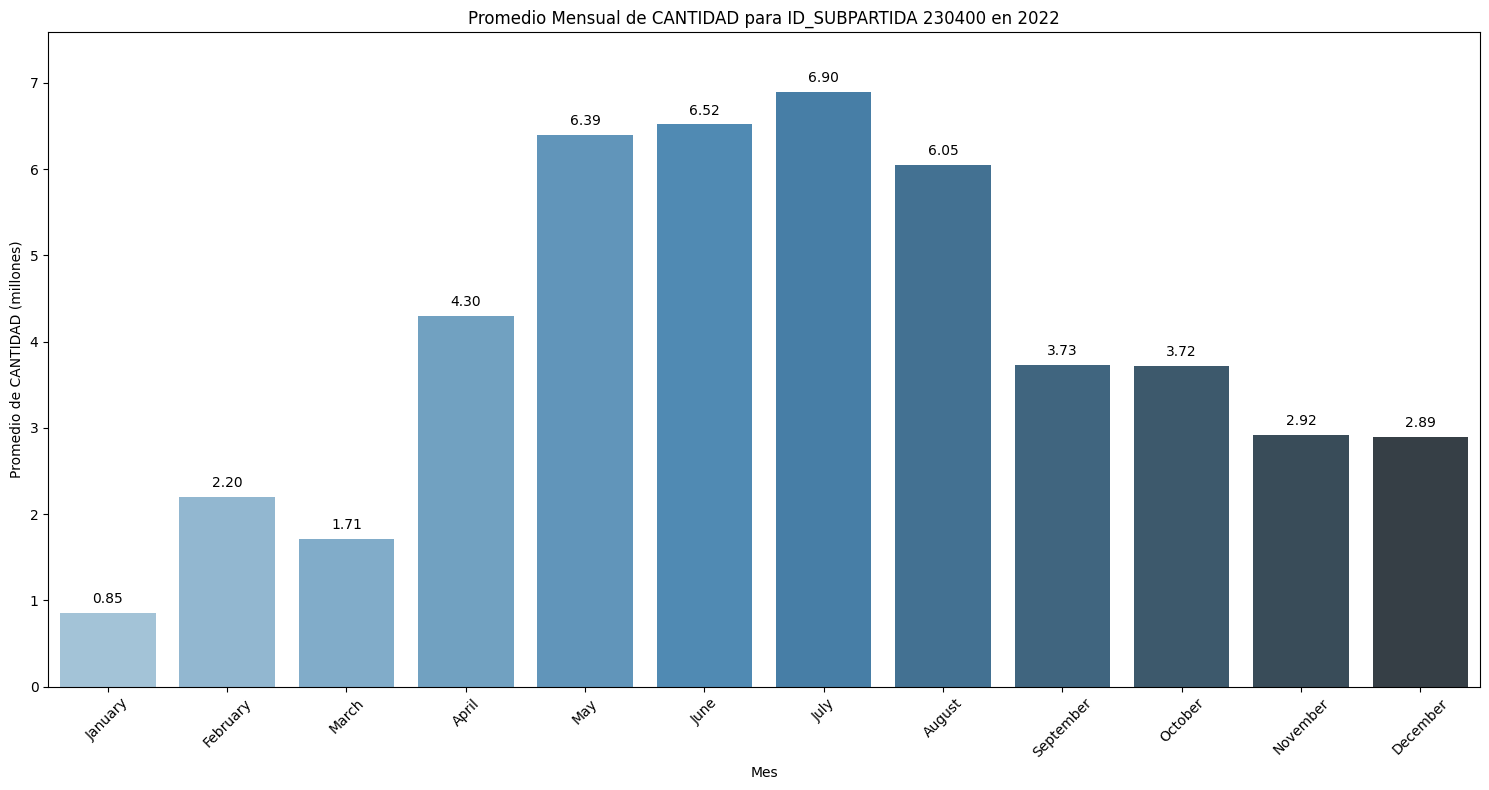

In [19]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2022)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 230400 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1836538059.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1836538059.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


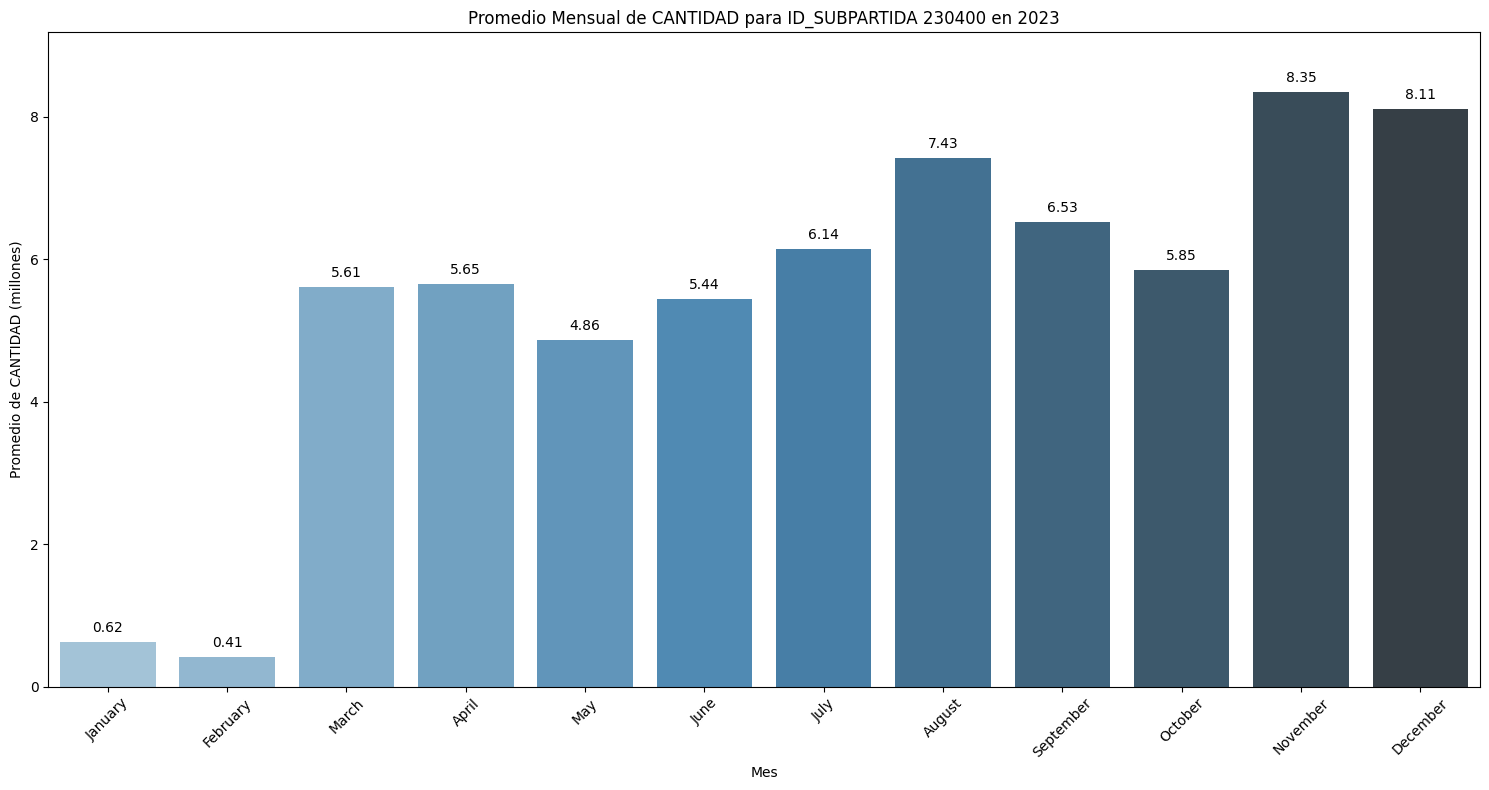

In [20]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2023)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 230400 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1911655648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1911655648.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


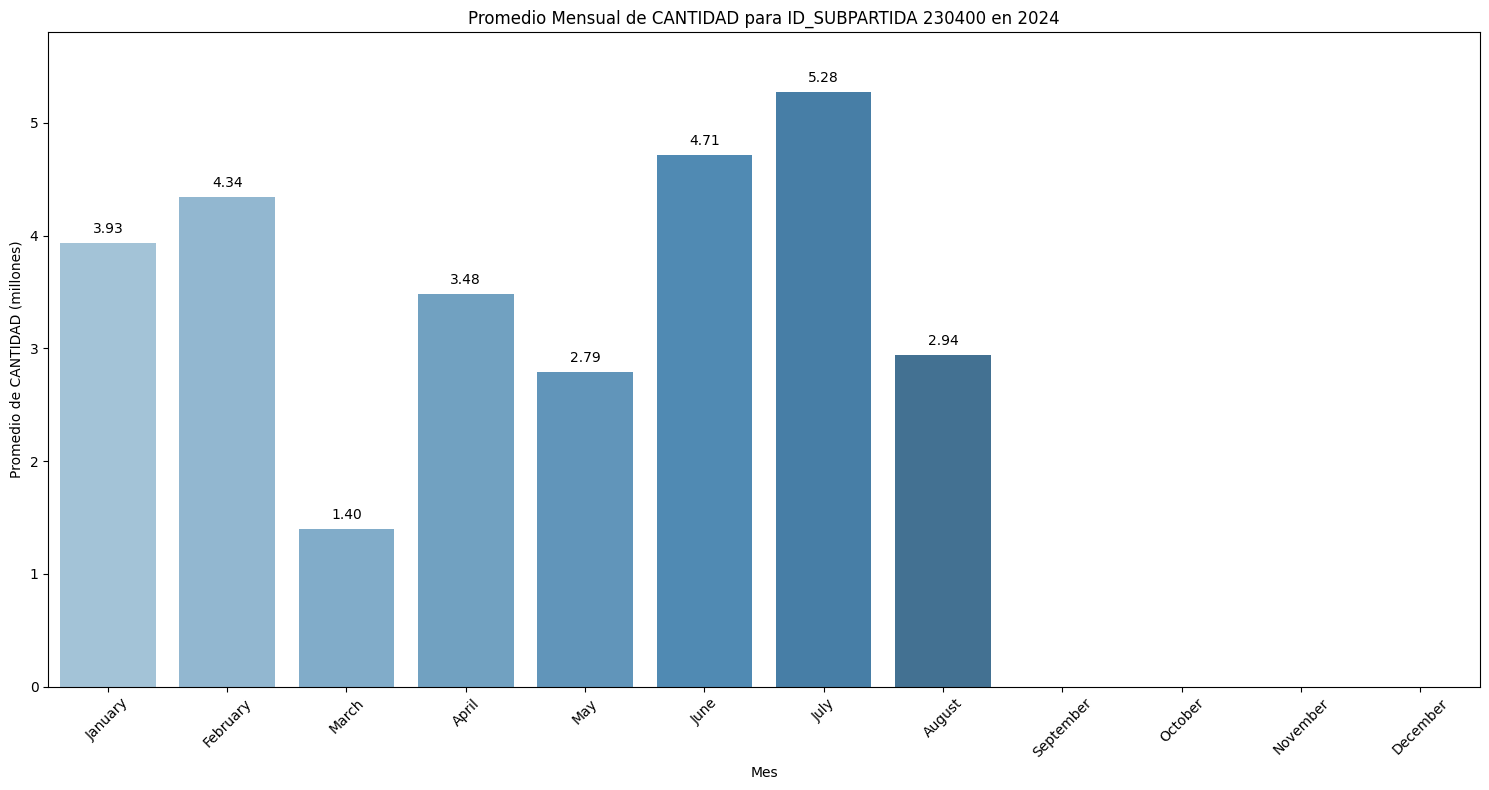

In [21]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2024)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 230400 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [22]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_exporParaguay_Filter[df_exporParaguay_Filter['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='CANTIDAD', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de CANTIDAD',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1891939333.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1891939333.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Año'] = df_subpartida['FECHA'].dt.year


**Analisis**

Las exportaciones presentan un comportamiento cíclico a lo largo del año. En años como 2023 y 2022, hay un aumento significativo entre los meses de abril a agosto, lo que coincide el procesamiento de soja en Paraguay.
2024 sigue una tendencia similar, aunque con volúmenes ligeramente menores, mostrando también un aumento progresivo hasta julio, antes de estabilizarse.

La cosecha de soja en Paraguay generalmente ocurre entre los meses de febrero y mayo, lo que explica el aumento en las exportaciones de pellets de soja en los meses posteriores a la cosecha, cuando el procesamiento del grano está en su punto máximo.

Los picos en exportación suelen darse entre abril y julio, coincidiendo con la disponibilidad de pellets tras el procesamiento del grano cosechado.

2023 muestra los valores más altos durante casi todo el año, en comparación con otros años, alcanzando su pico en los meses de junio y julio.
En contraste, los años 2018, 2020, y 2021 presentan volúmenes más bajos y estables, con menos variación mes a mes.
2022 y 2024 muestran patrones similares, con un crecimiento significativo en los mismos periodos, aunque en menor cantidad que 2023.

Meses de mayor actividad:
Abril, Mayo, Junio, Julio

### CODIGO DE ID 830990

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\2664401278.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\2664401278.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




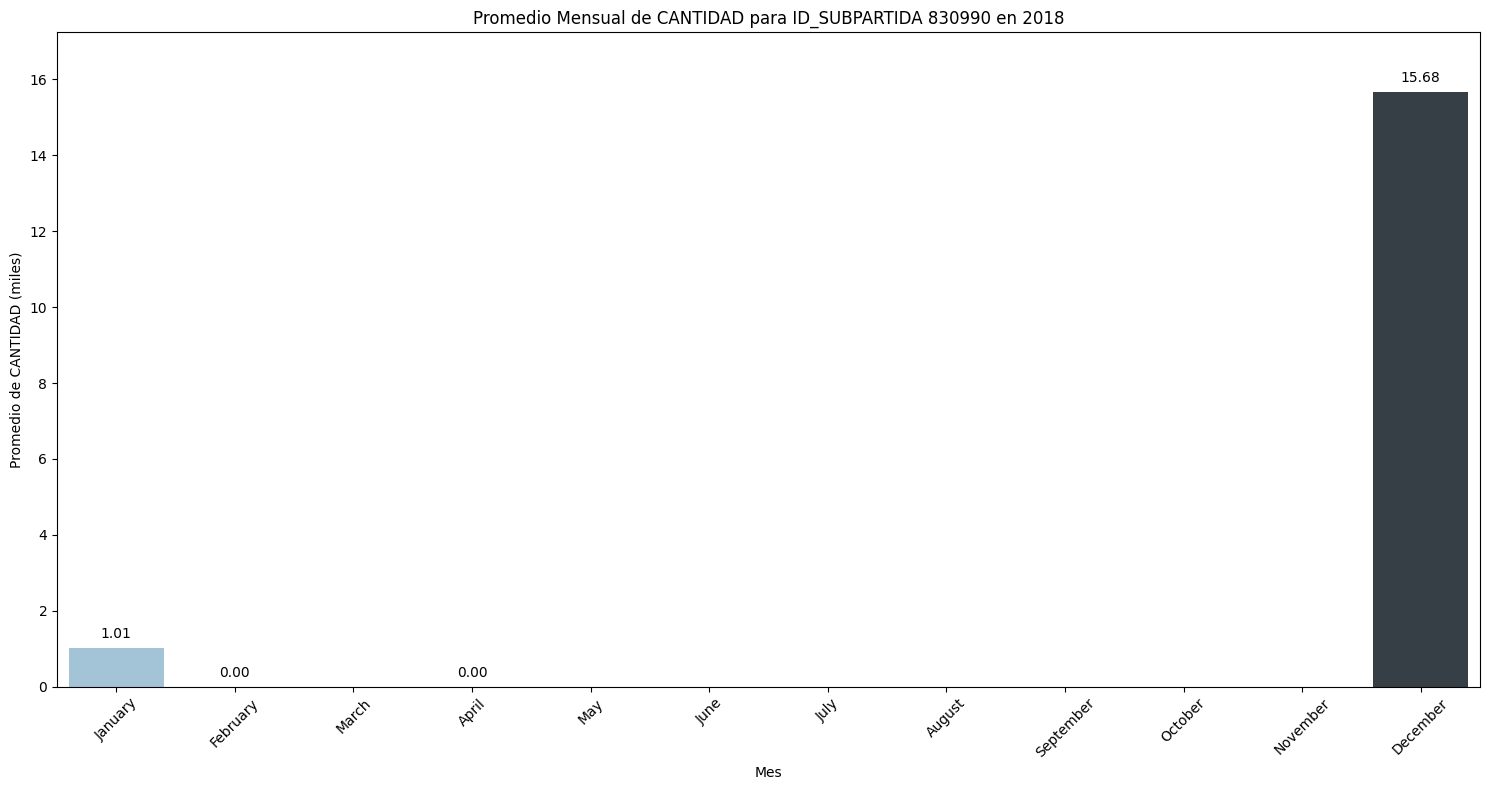

In [23]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2018)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 830990]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 830990 en 2018')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\4261155746.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\4261155746.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




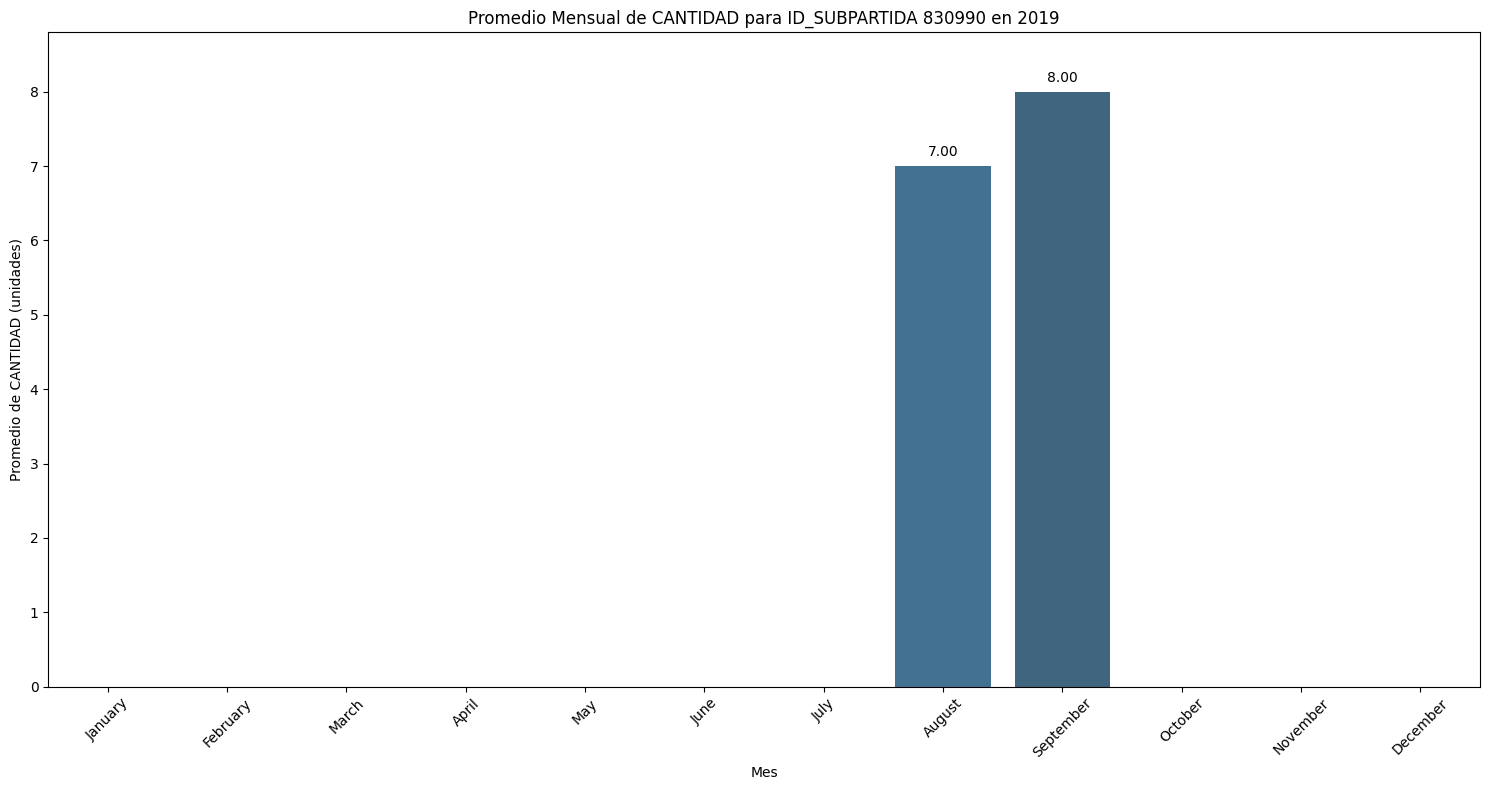

In [24]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2019)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 830990]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 830990 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1194108391.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1194108391.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




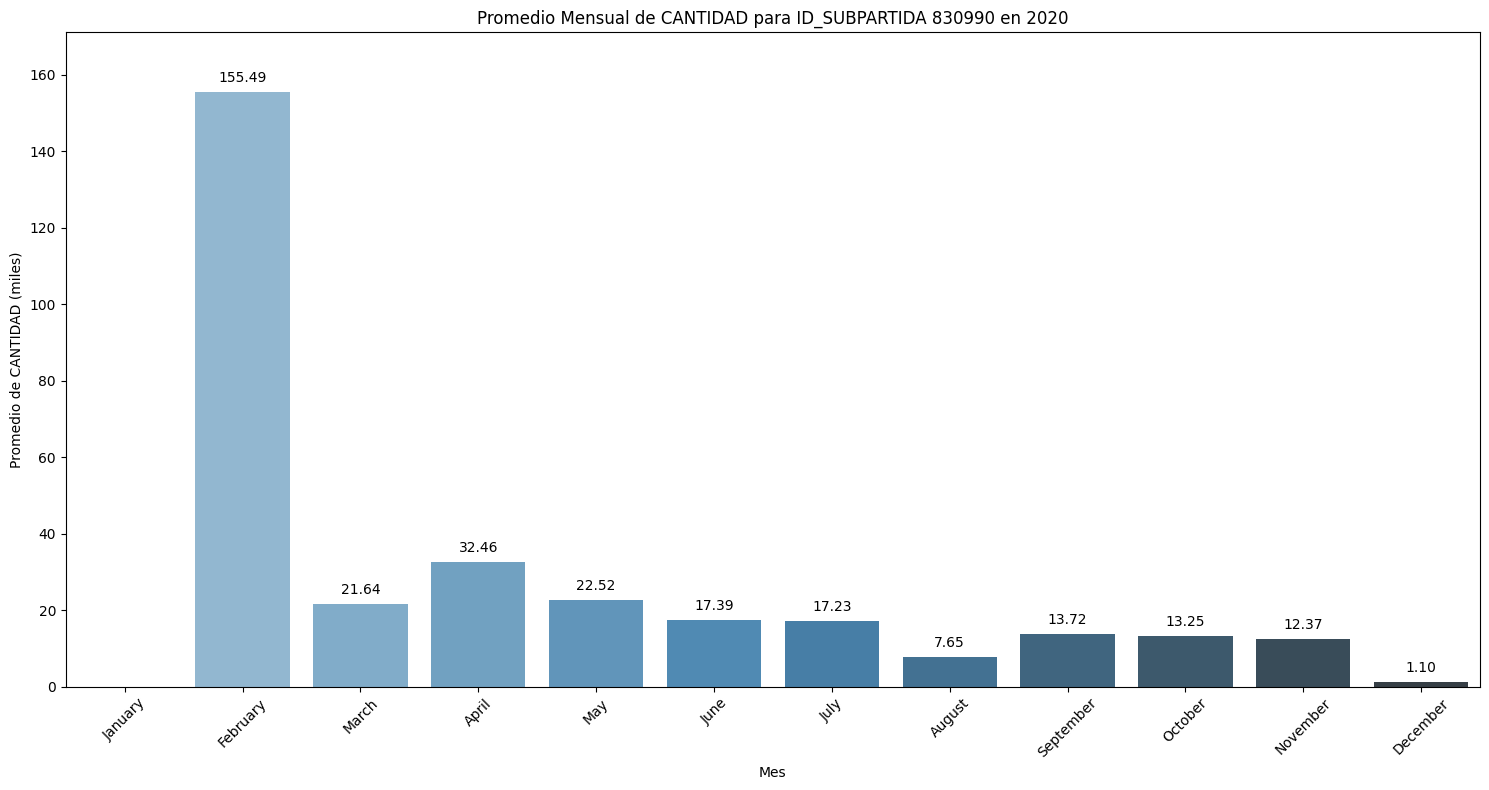

In [25]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2020)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 830990]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 830990 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3563109071.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3563109071.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




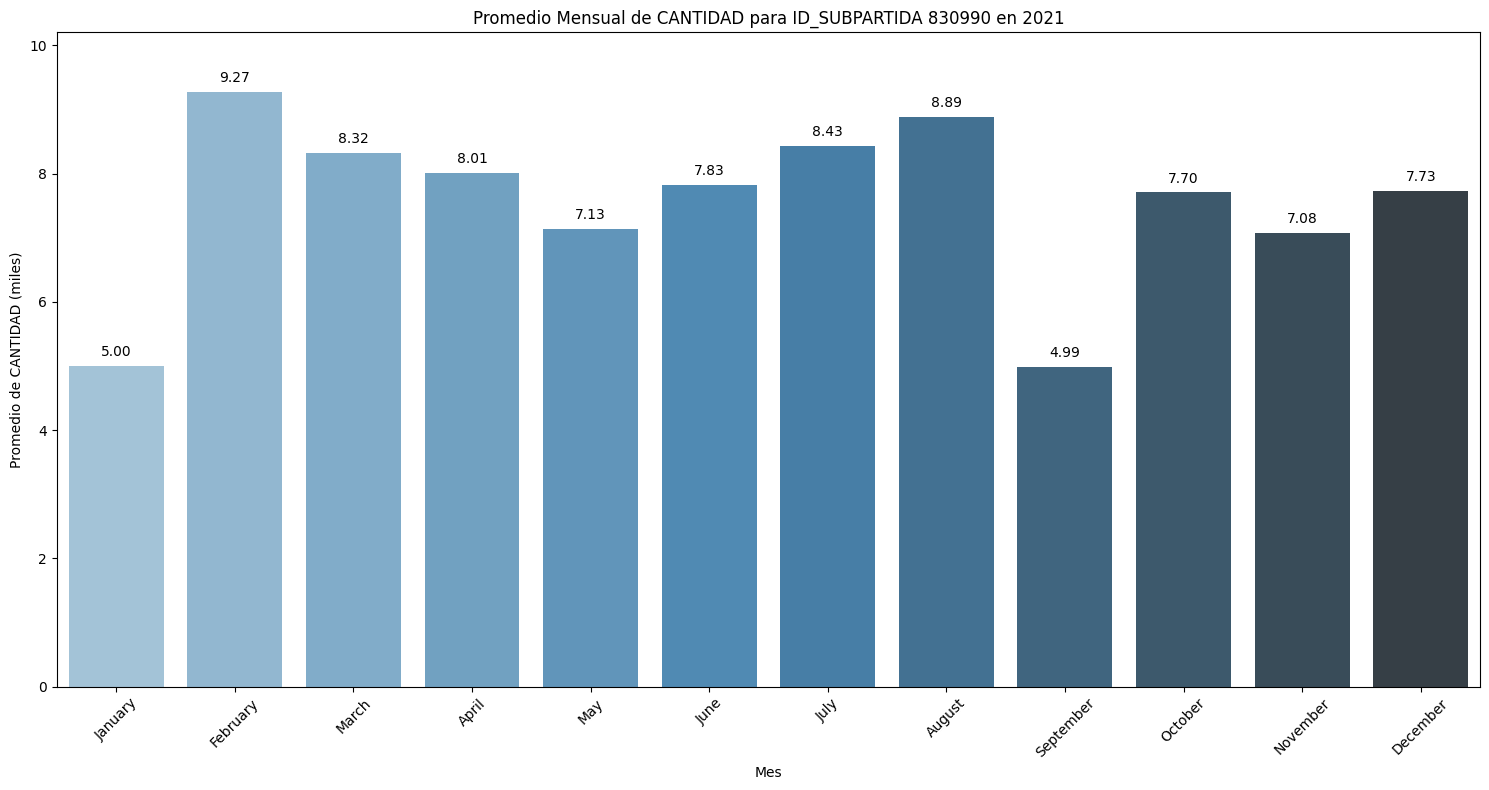

In [26]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2021)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 830990]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 830990 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\585336504.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\585336504.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




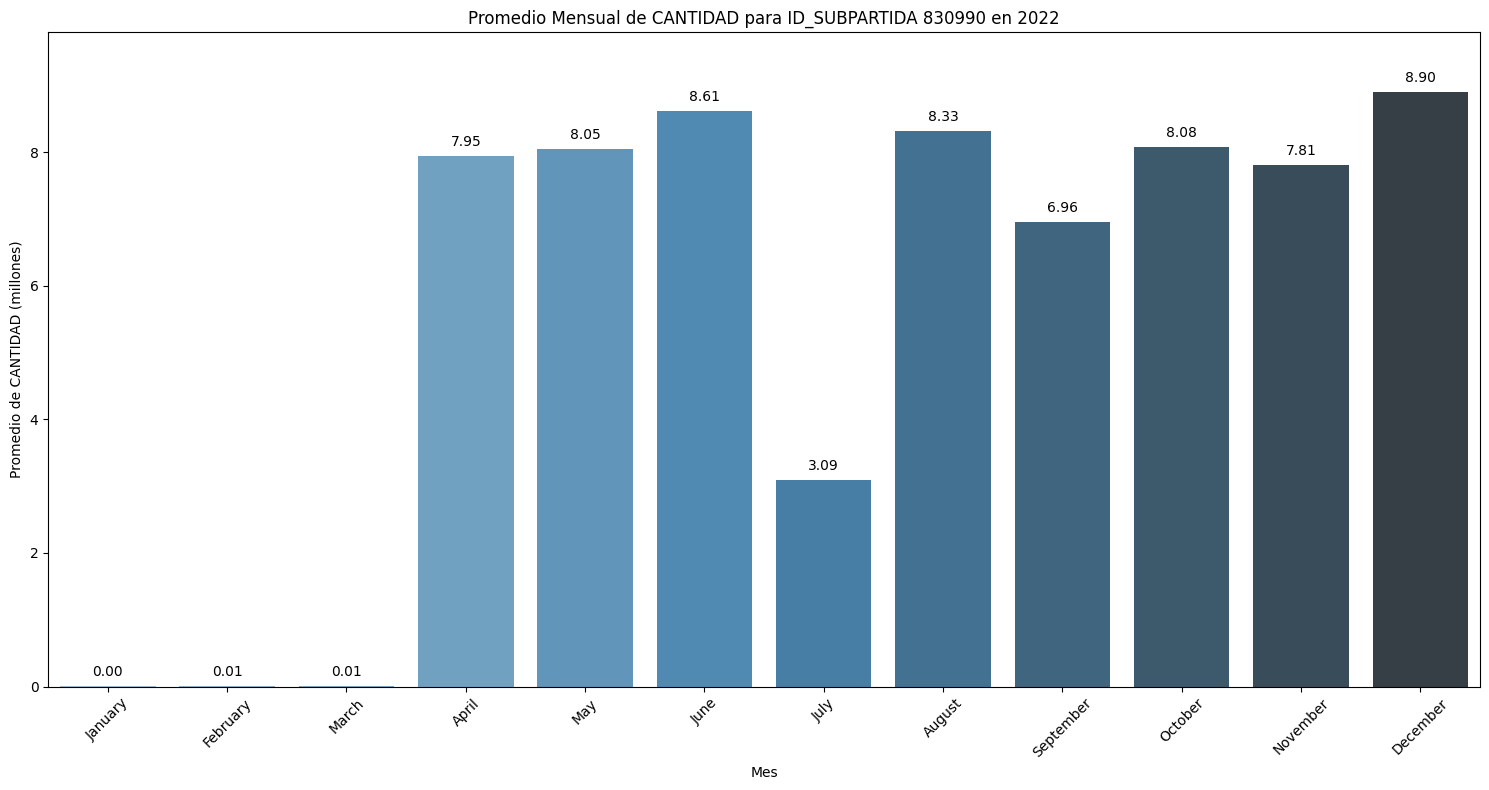

In [27]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2022)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 830990]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 830990 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3295305769.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3295305769.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




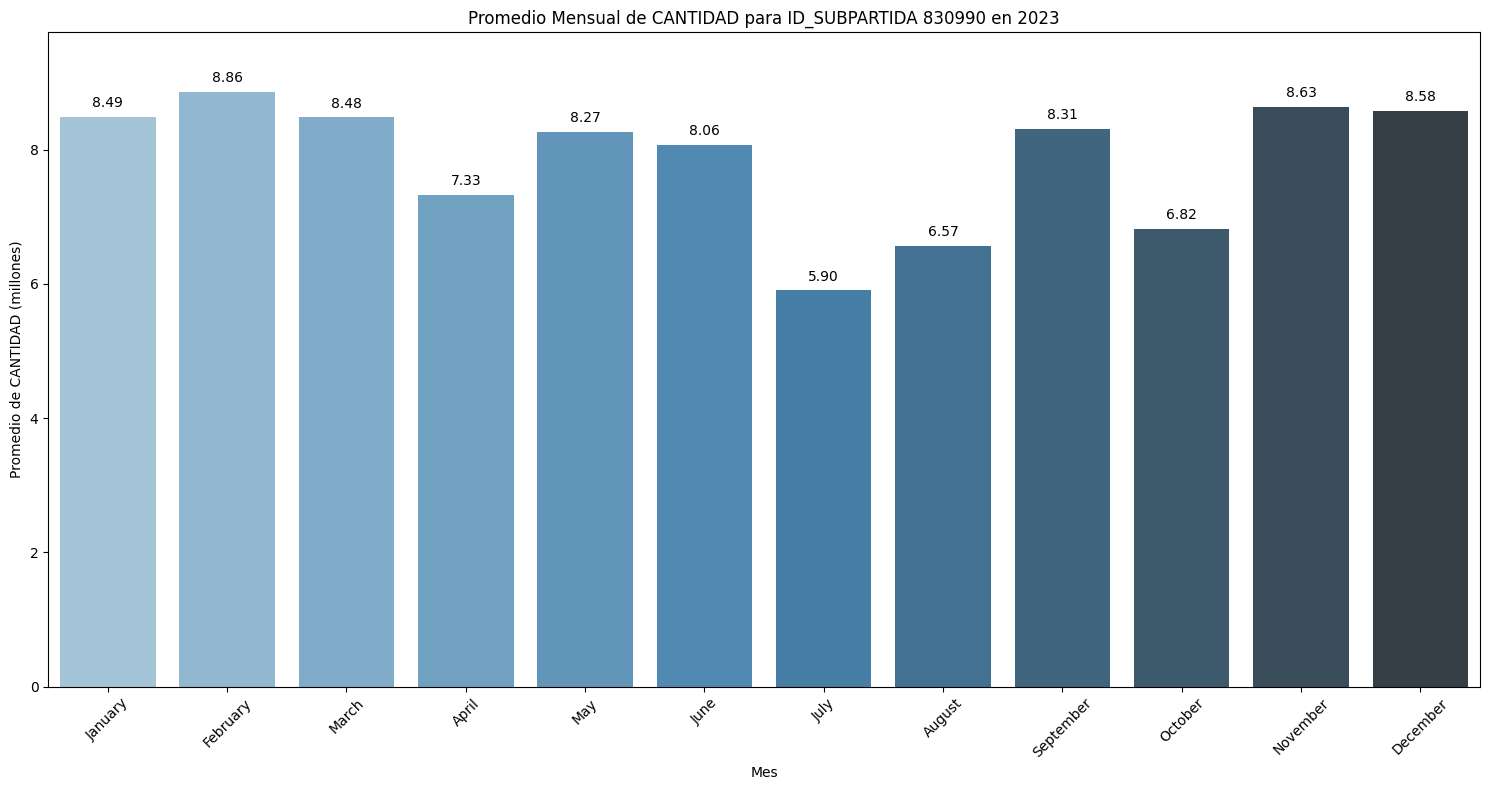

In [28]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2023)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 830990]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 830990 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1757582525.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1757582525.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




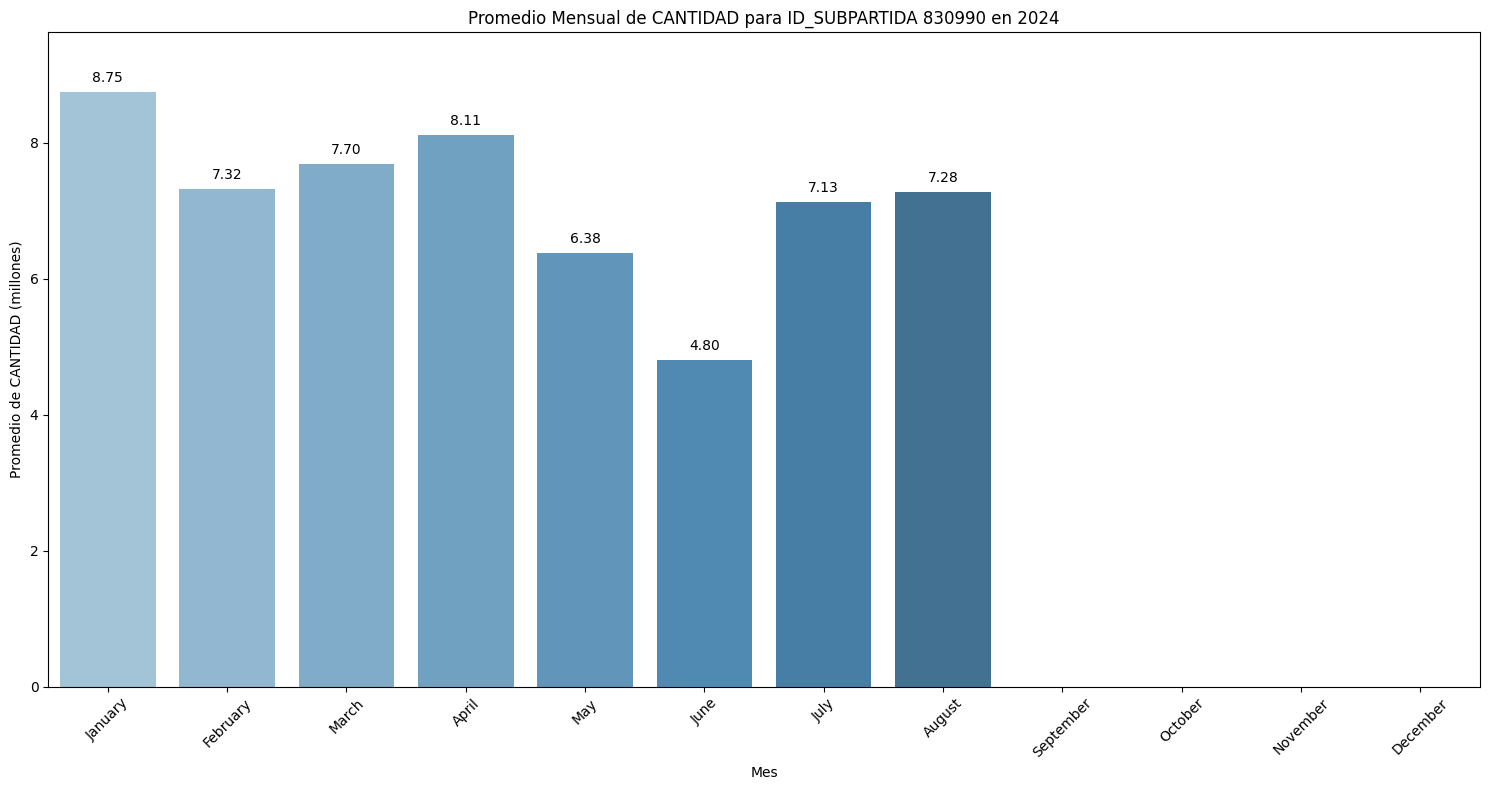

In [29]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2024)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 830990]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 830990 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [30]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_exporParaguay_Filter[df_exporParaguay_Filter['ID_SUBPARTIDA'] == 830990]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='CANTIDAD', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de CANTIDAD',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3210523588.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3210523588.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Analisis**
En 2023, las exportaciones son generalmente consistentes, con pocas variaciones y niveles altos durante todo el año, lo que podría sugerir una demanda constante o una producción estable.
2024 tiene valores algo menores y tiende a descender ligeramente a medida que avanzan los meses, aunque se mantiene relativamente estable.

Los años 2021 y 2022 muestran fluctuaciones más notables en comparación con otros años, especialmente en los meses de agosto y septiembre, donde los valores caen significativamente.

En contraste, los años 2018, 2019 y 2020 tienen valores cercanos a cero o muy bajos en la mayoría de los meses, ya que a comparacion del resto de meses, estos solo fueron miles y no millones

Meses de mayor actividad:
Los meses de marzo, abril, y septiembre son los más activos en varios años

### Codigo de ID 761699

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\851104864.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\851104864.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




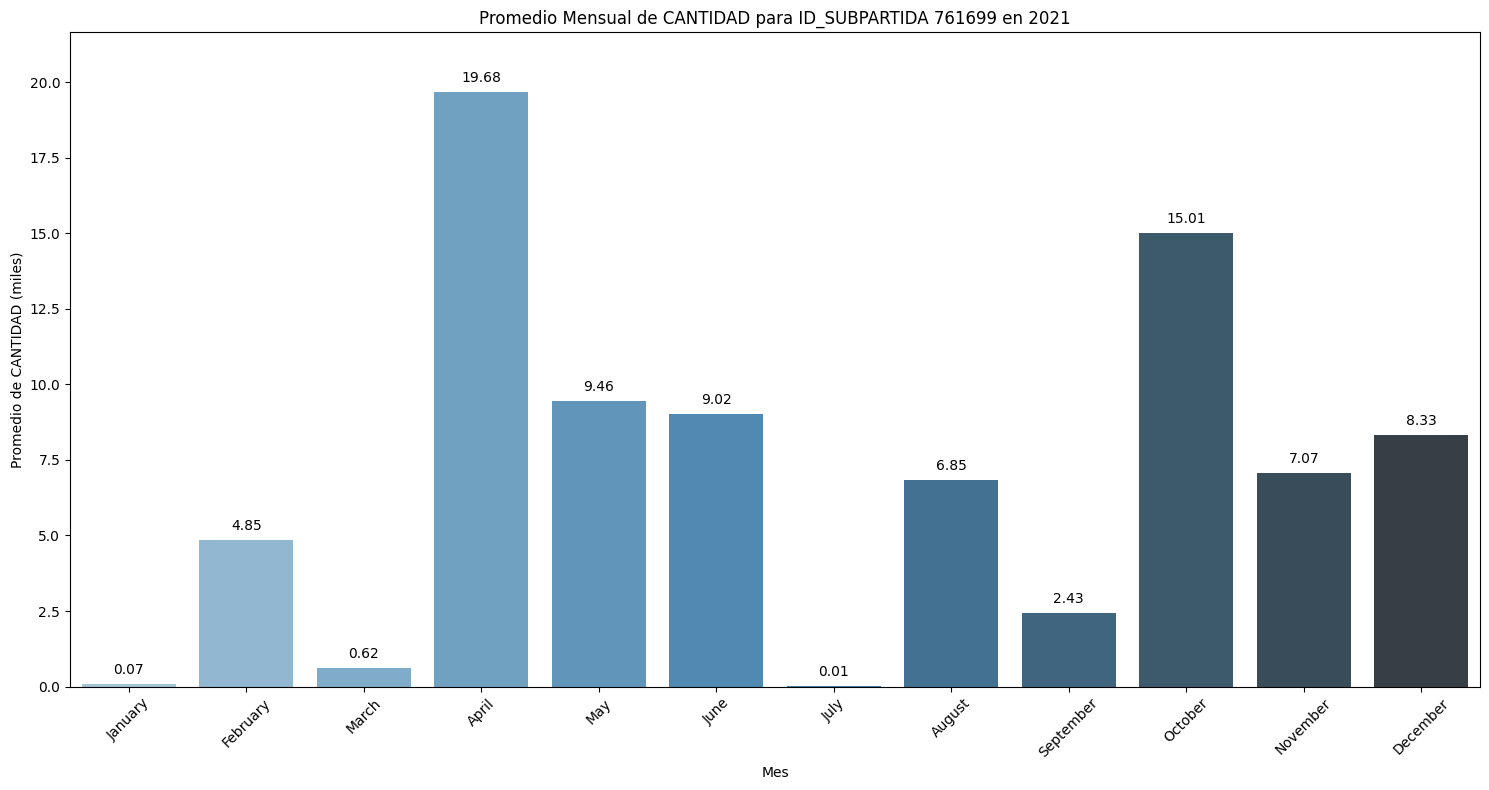

In [31]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2018)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 761699]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 761699 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\912402389.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\912402389.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




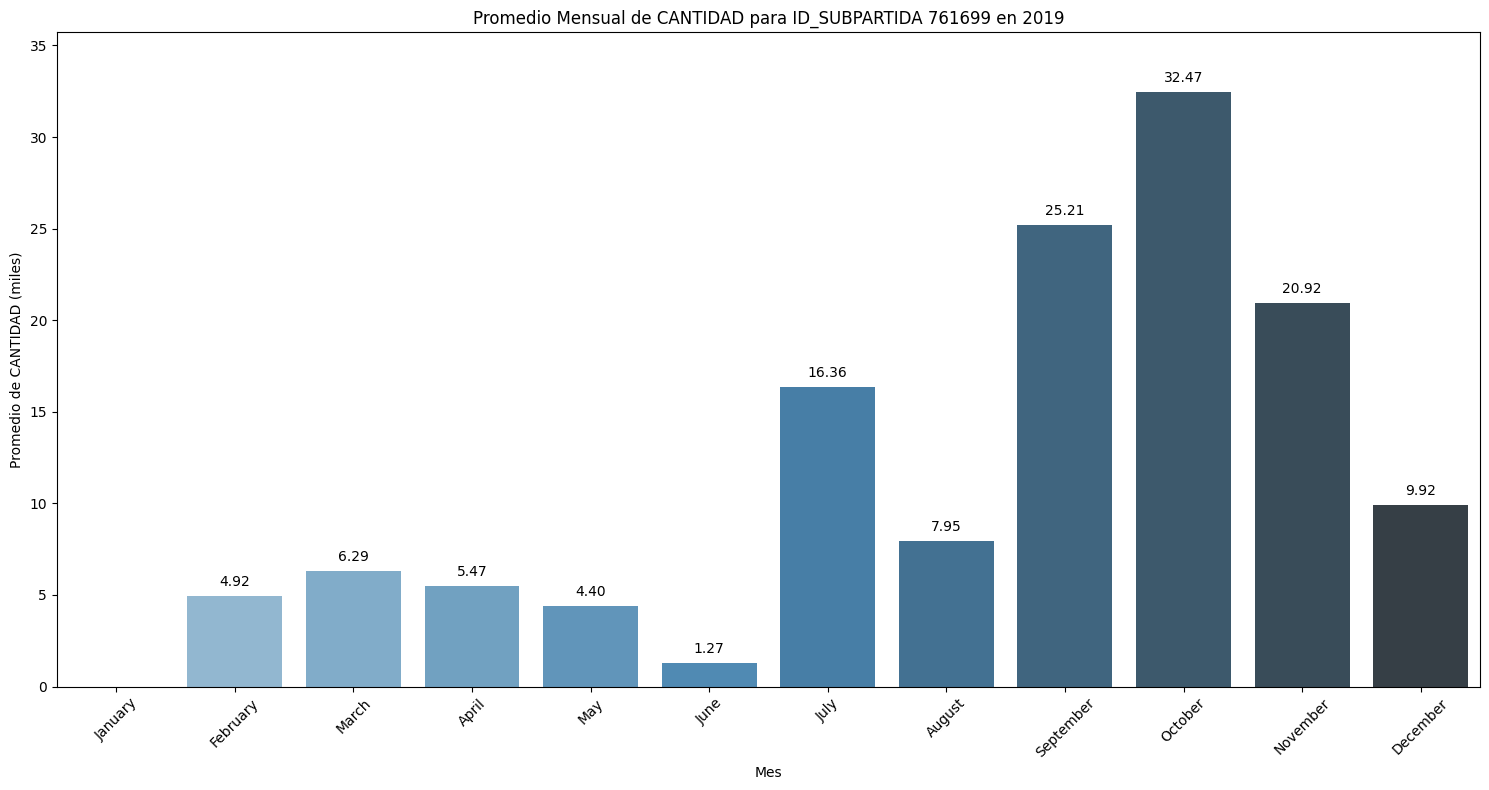

In [32]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2019)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 761699]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 761699 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\2432528032.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\2432528032.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




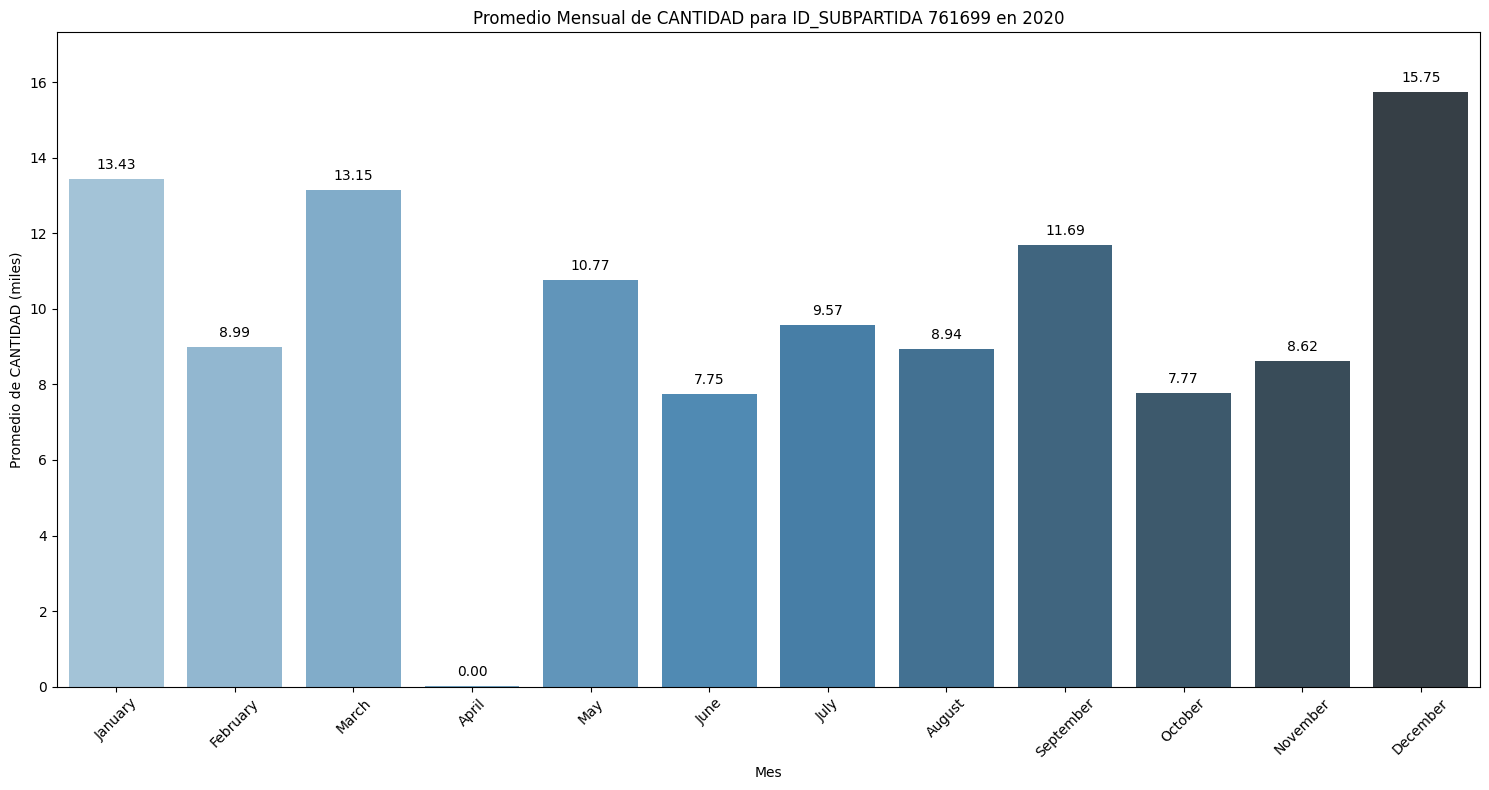

In [33]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2020)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 761699]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 761699 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3249652180.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3249652180.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




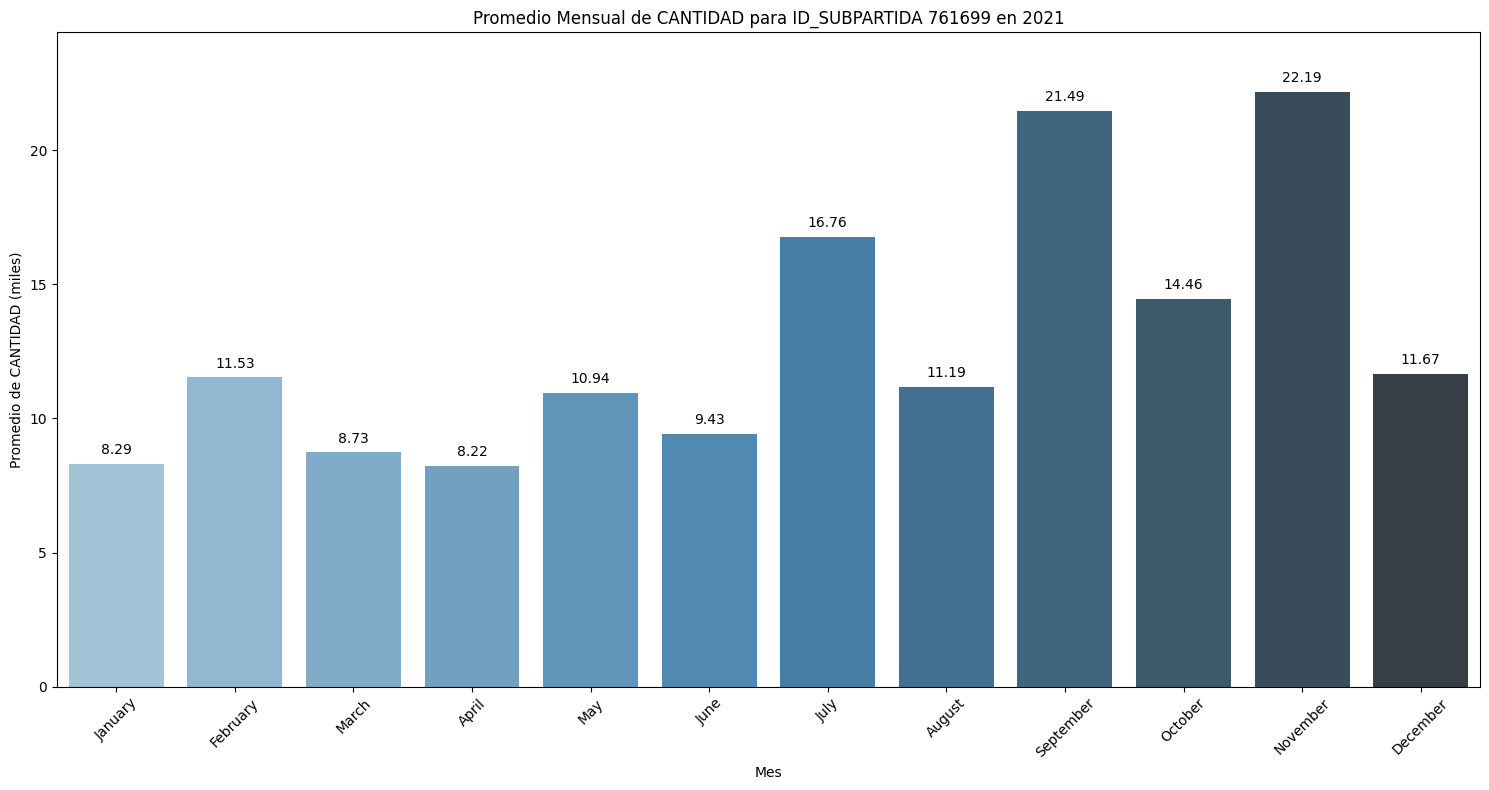

In [34]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2021)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 761699]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 761699 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1209446968.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\1209446968.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




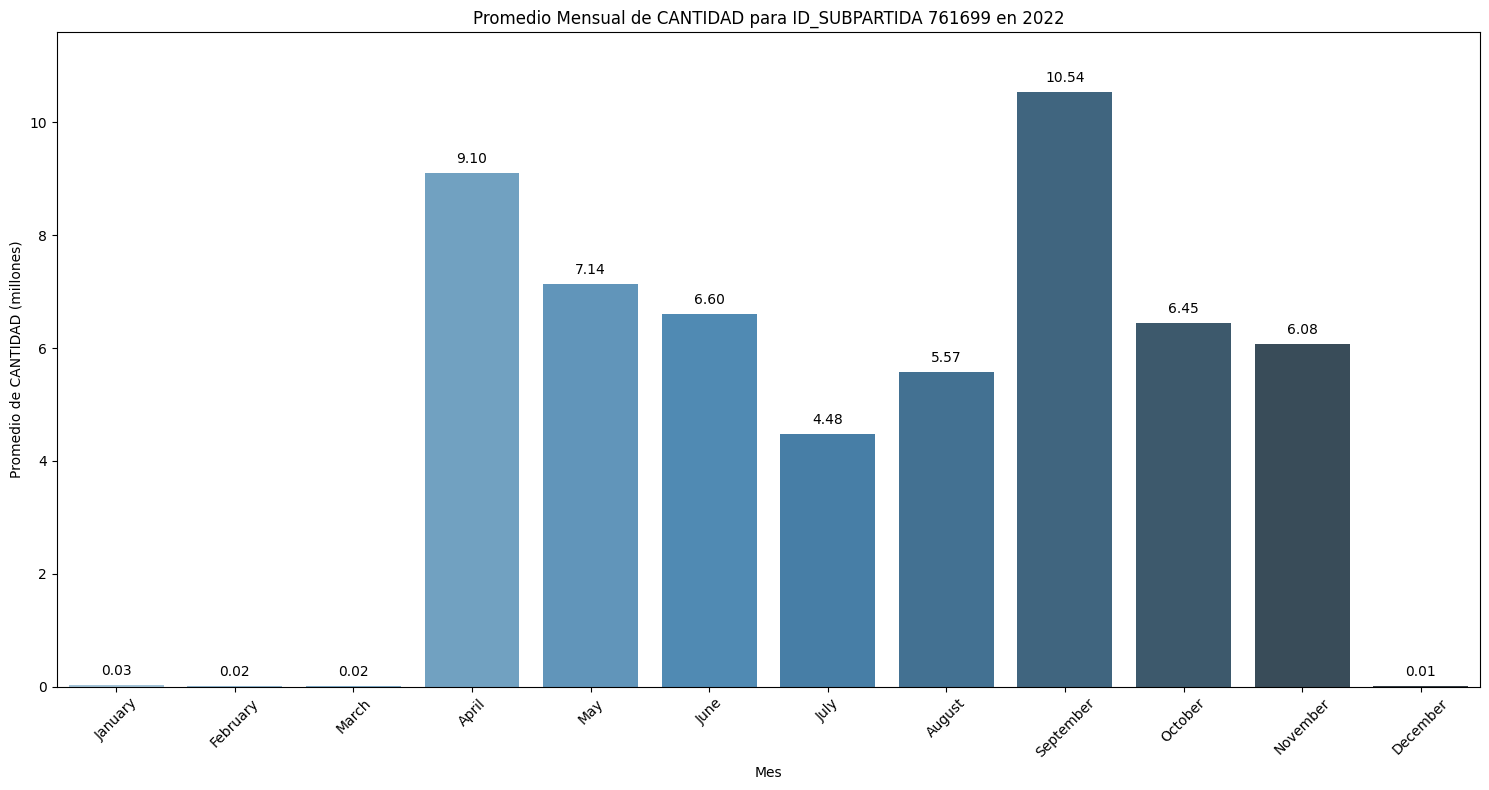

In [35]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2022)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 761699]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 761699 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3000904138.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3000904138.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




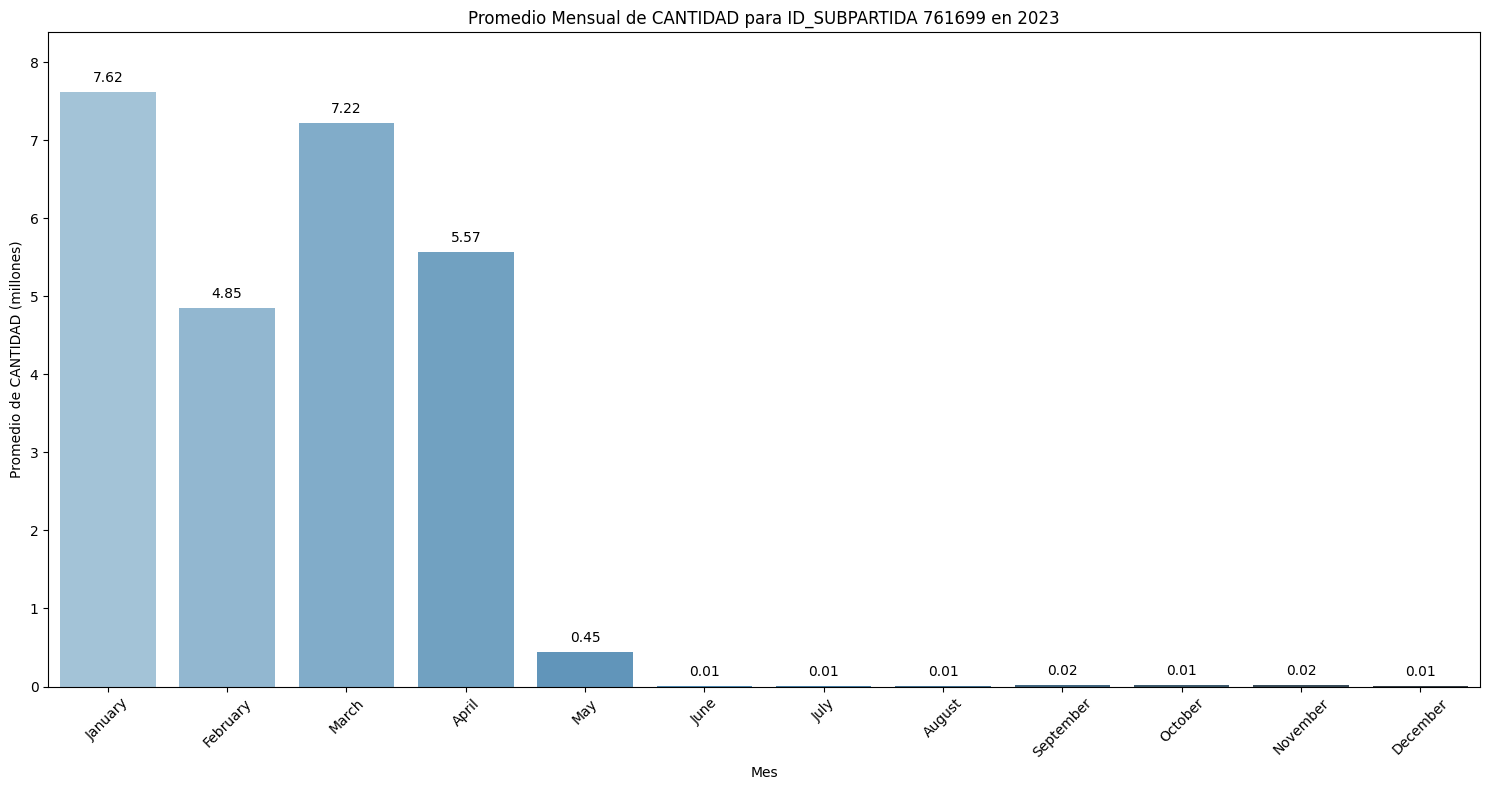

In [36]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2023)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 761699]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 761699 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\189257733.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\189257733.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




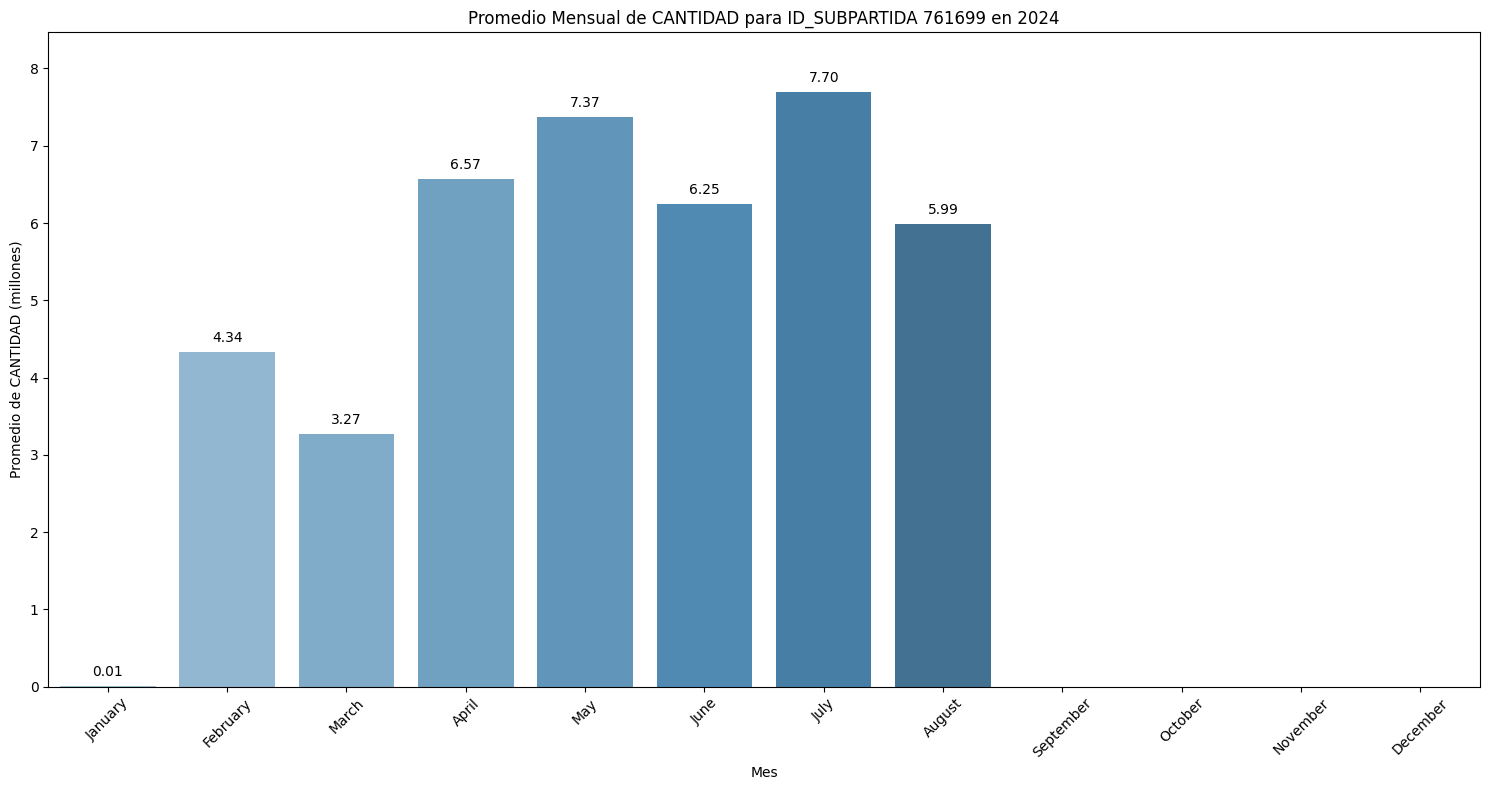

In [37]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_exporParaguay_Filter['FECHA'].dt.year == 2024)
df_2023 = df_exporParaguay_Filter[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 761699]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 761699 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [38]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_exporParaguay_Filter['FECHA'] = pd.to_datetime(df_exporParaguay_Filter['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_exporParaguay_Filter[df_exporParaguay_Filter['ID_SUBPARTIDA'] == 761699]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='CANTIDAD', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 120190 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de CANTIDAD',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3428608058.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_19176\3428608058.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**ANALISIS**
2022 muestra un incremento notable en abril, alcanzando valores altos, y otro pico en septiembre. A partir de octubre, las cantidades disminuyen progresivamente hasta alcanzar cero en diciembre.
2023 presenta un comportamiento alto en enero y marzo, pero una caída drástica en abril, manteniéndose en cero durante el resto del año.
2024 (naranja) muestra una actividad estable entre febrero y junio, con valores alrededor de los 3-4 millones y una disminución a partir de julio.
Los años 2018 (azul) y 2020 (rojo) tienen valores mucho menores, aunque muestran algunas fluctuaciones entre los primeros meses del año.
Meses con mayor actividad: Los meses de marzo, abril, y septiembre son los que tienden a tener los picos más altos, especialmente en los años 2022 y 2023.

Tendencia de los promedios: Se observa que los años recientes (especialmente 2022 y 2024) presentan mayor actividad comparado con los primeros años de la serie.

## GRAFICAS SUBTIPO_ID con respecto al valor FOB

### GRAFICO DEL ID 120190

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2220954824.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2220954824.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


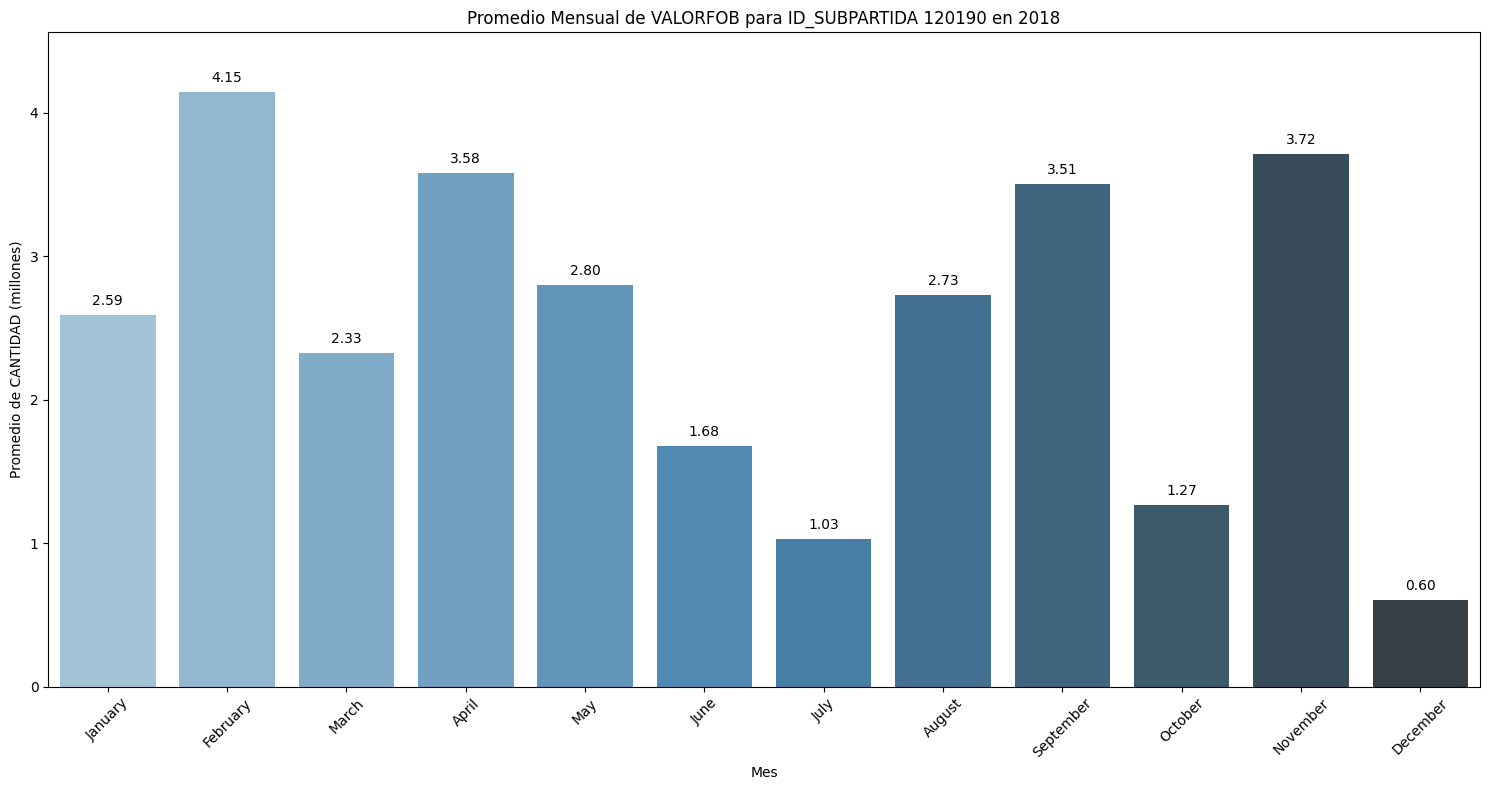

In [43]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2018)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 120190 en 2018')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1413768472.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1413768472.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')


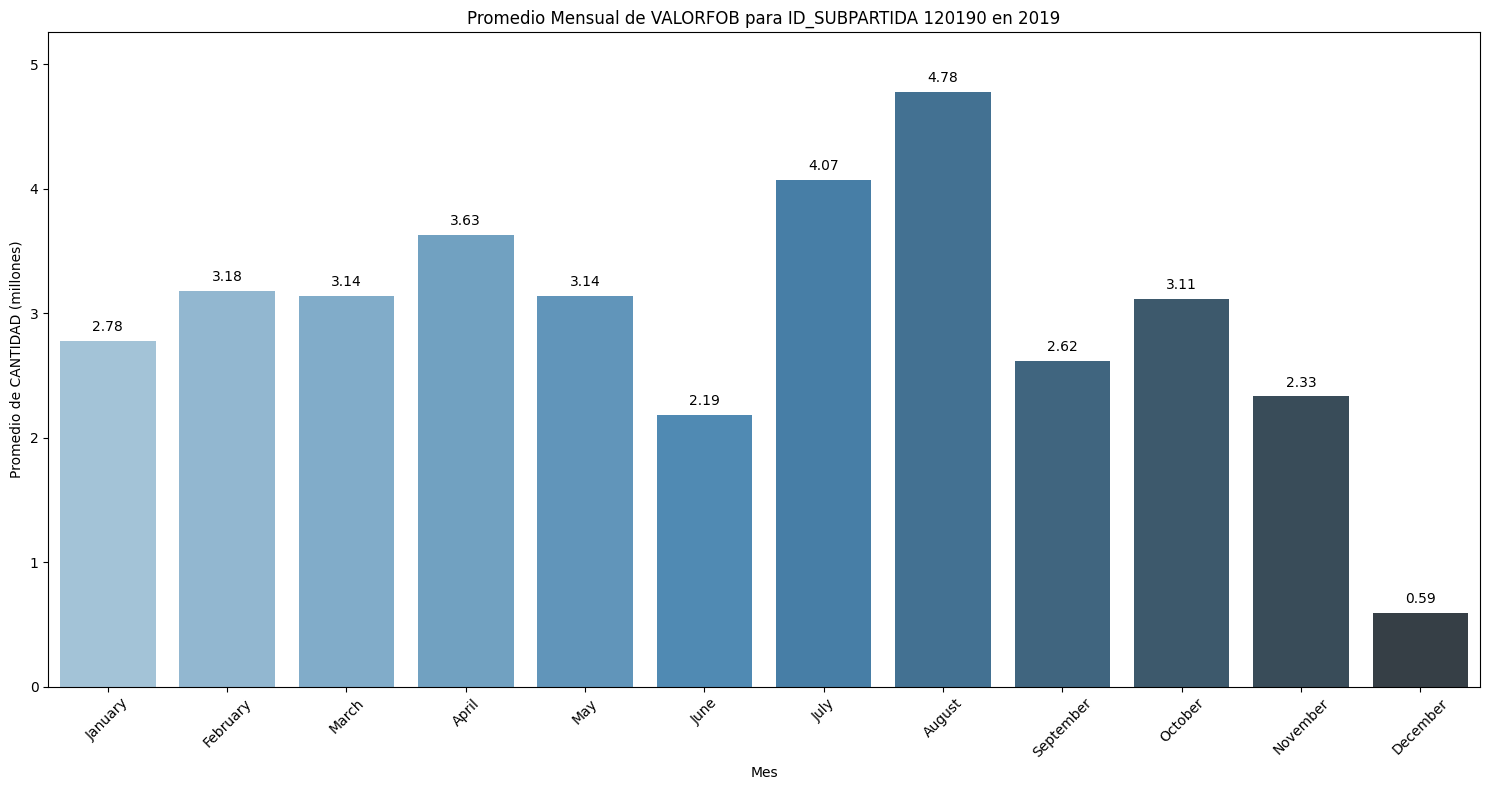

In [44]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2019)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 120190 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\395488296.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\395488296.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




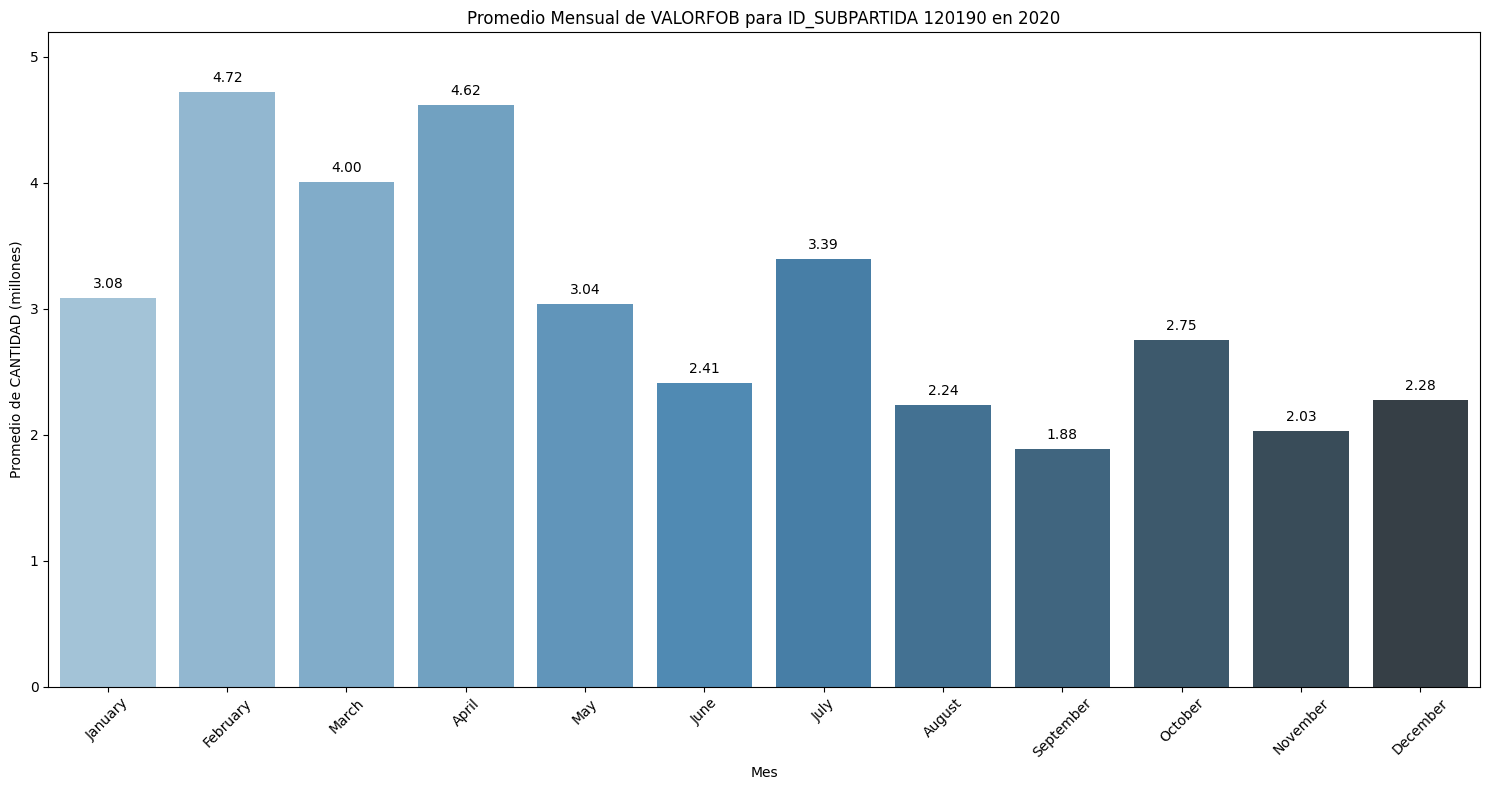

In [46]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2020)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 120190 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\4172367712.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\4172367712.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




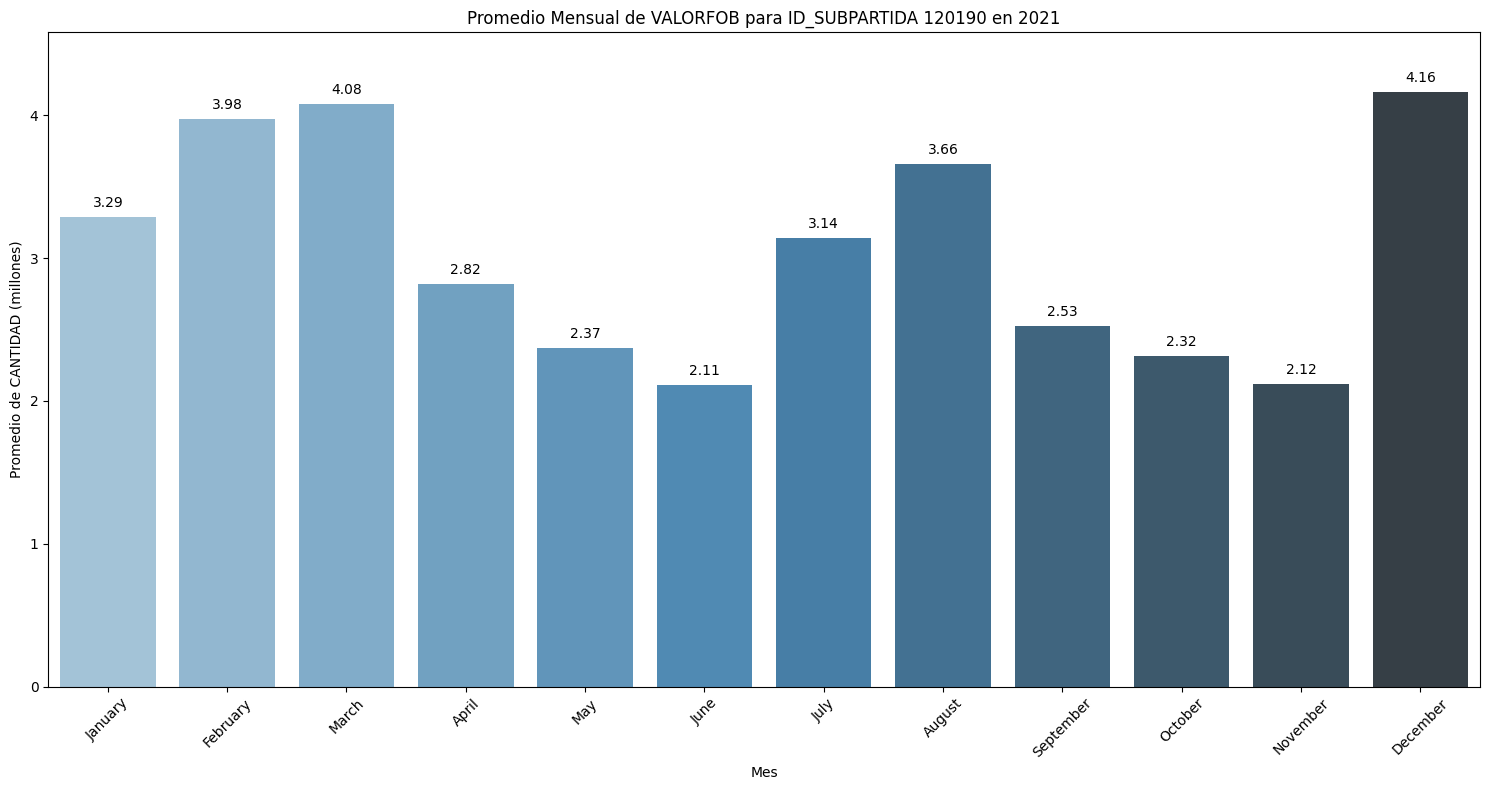

In [47]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2021)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 120190 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\218019172.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\218019172.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




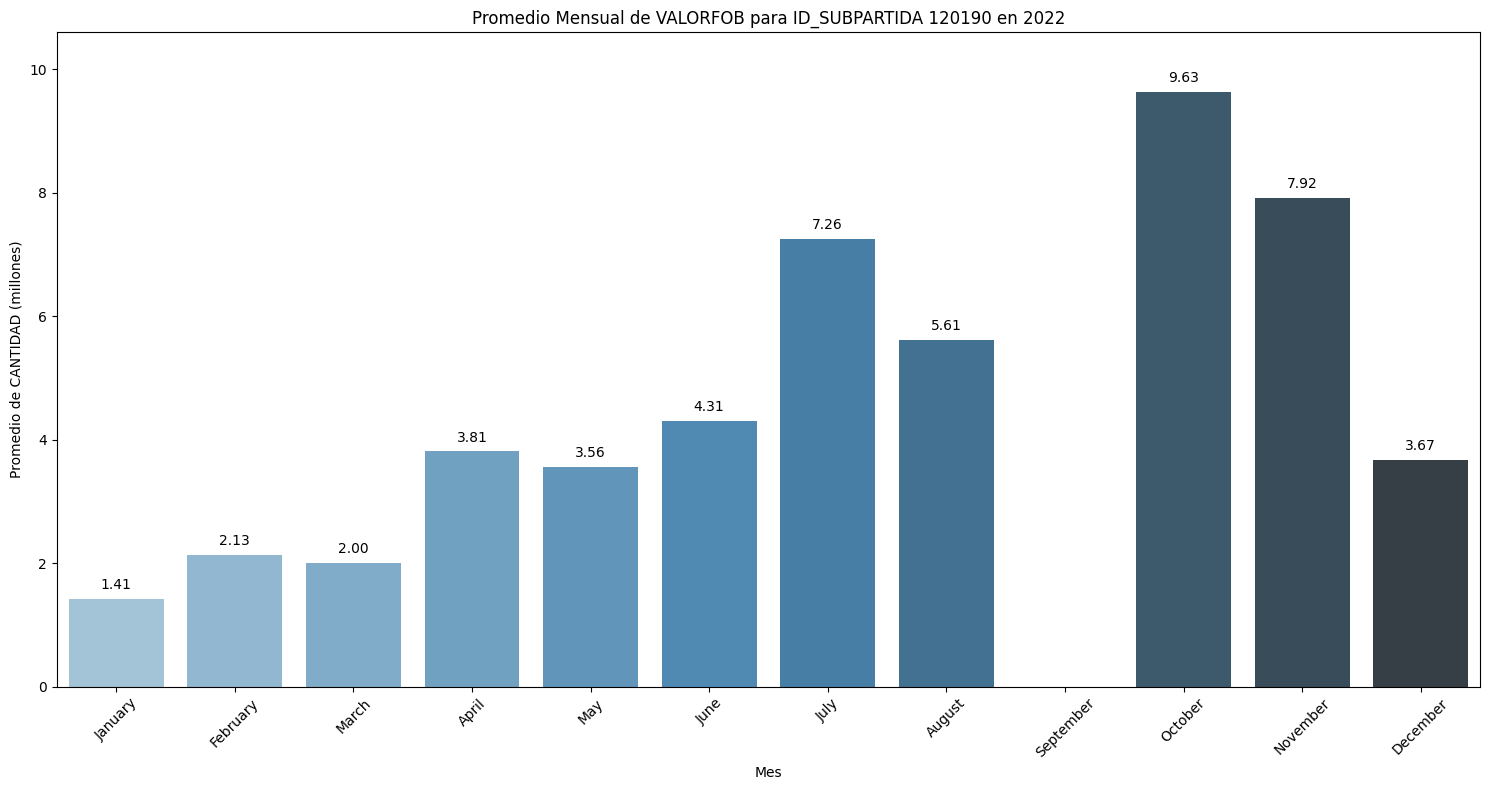

In [48]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2022)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 120190 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1174734403.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1174734403.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




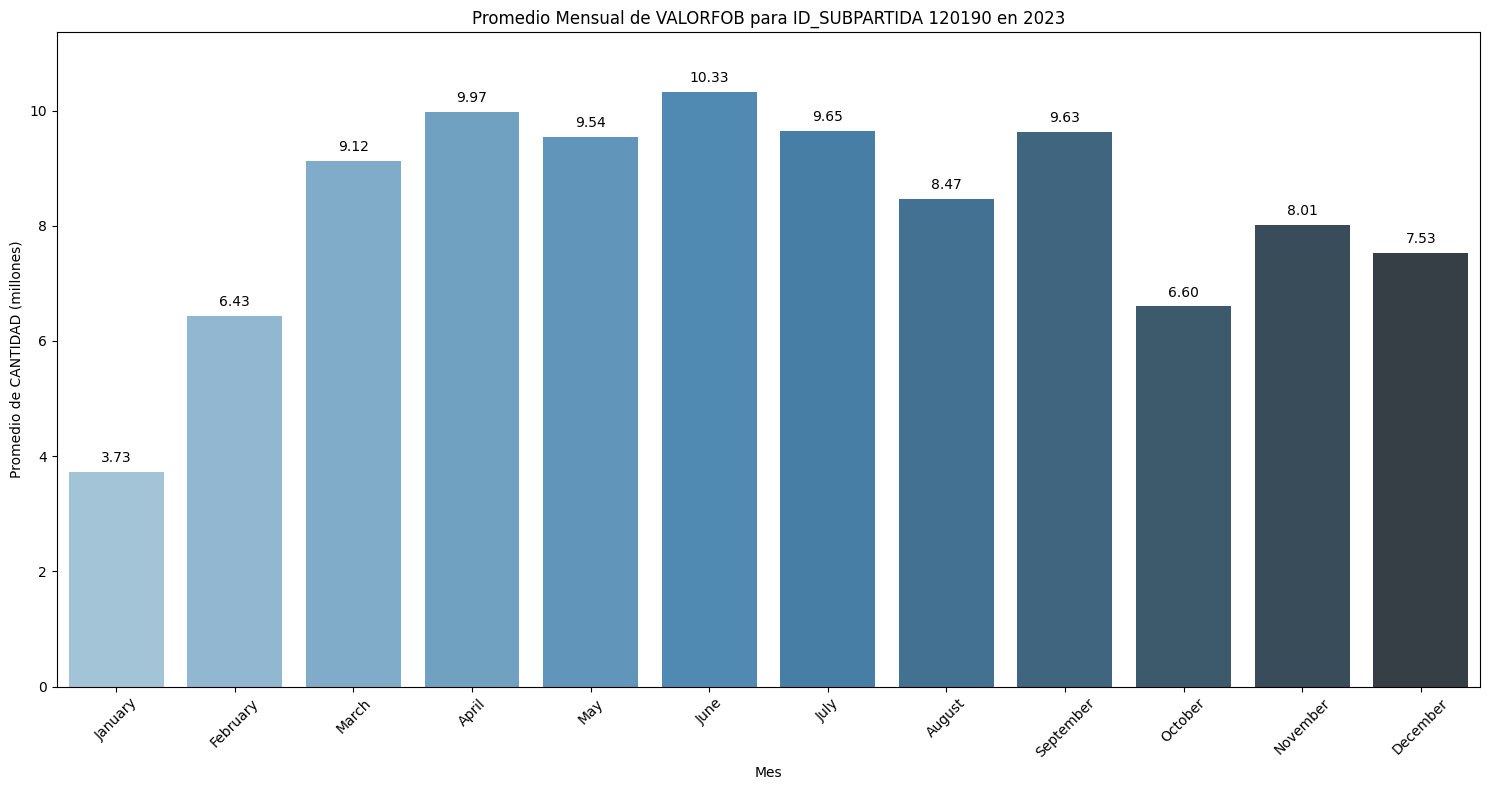

In [49]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2023)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 120190 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3938198579.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3938198579.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




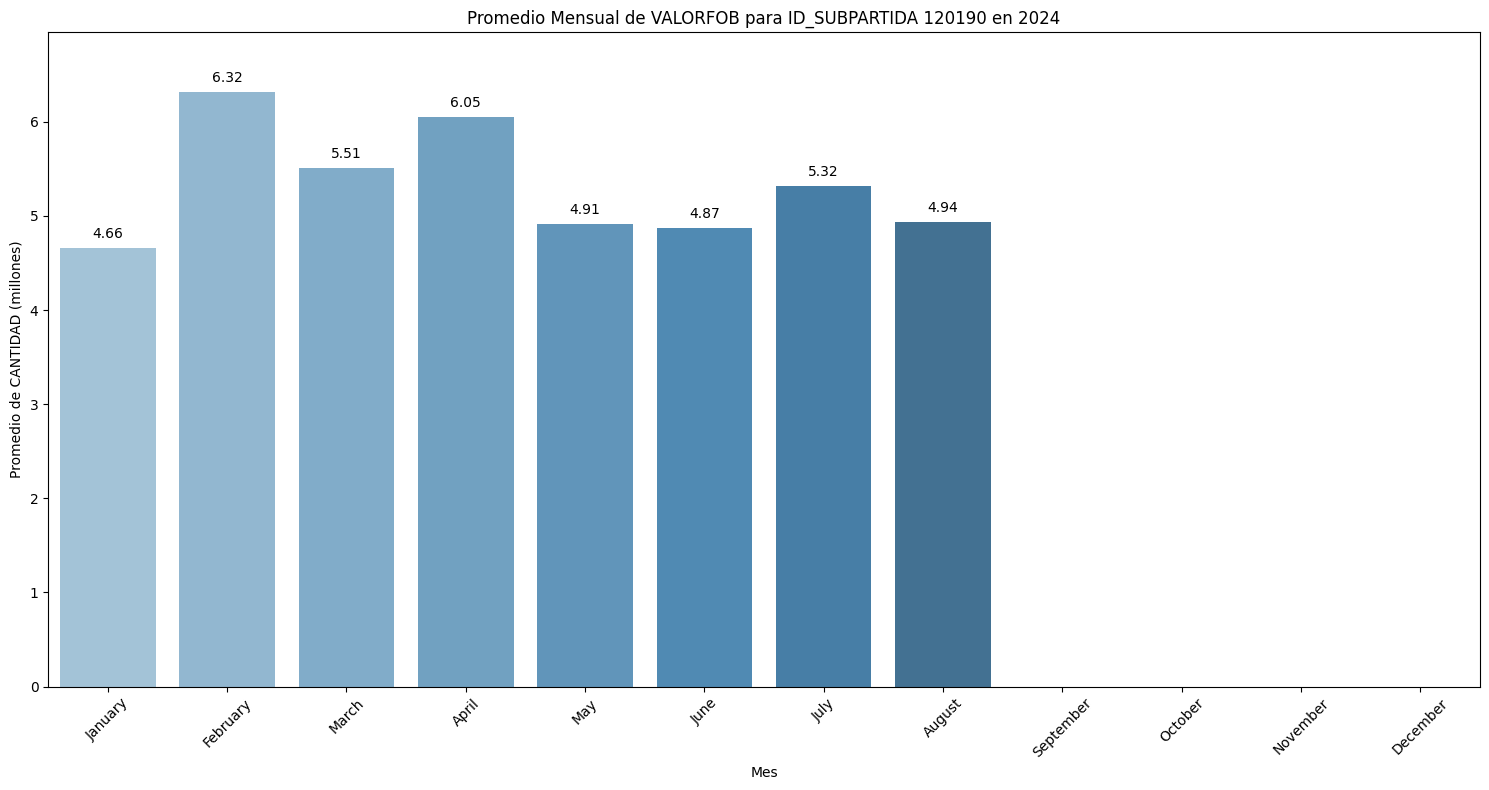

In [50]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2024)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 120190 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [ ]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_expoParaguay_Filter_VFOB[df_expoParaguay_Filter_VFOB['ID_SUBPARTIDA'] == 120190]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['VALORFOB'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='VALORFOB', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de VALORFOB para ID_SUBPARTIDA 120190 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de valorfob',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\4217051341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
C:\Users\migue\AppData\Local\Temp\ipykernel_6372\4217051341.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subpartida['Año'] = df_subpartida['FECHA'].dt.year


### GRAFICO DEL ID 230400

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2014813923.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2014813923.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




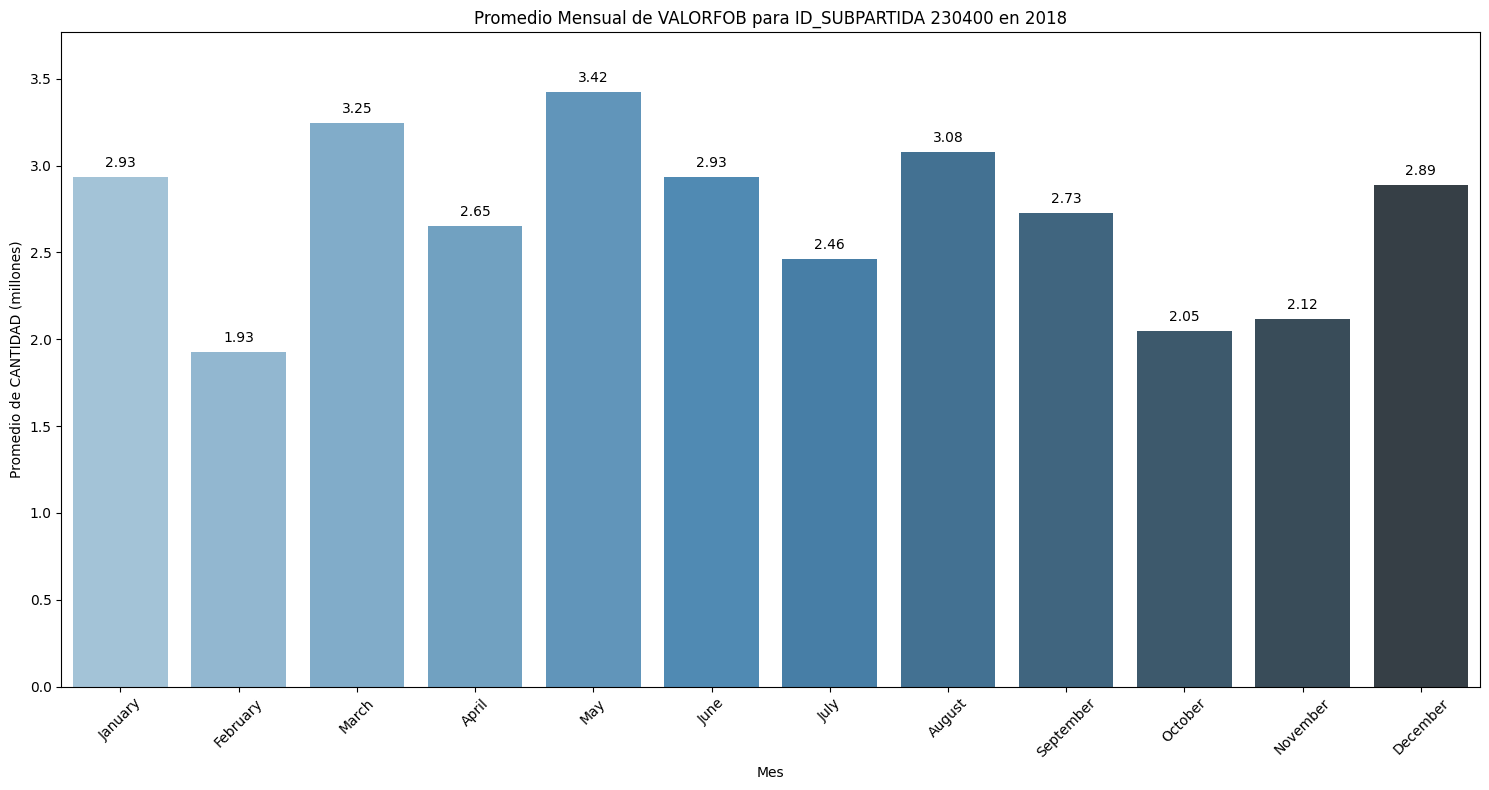

In [58]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2018)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 230400 en 2018')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2568554271.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2568554271.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




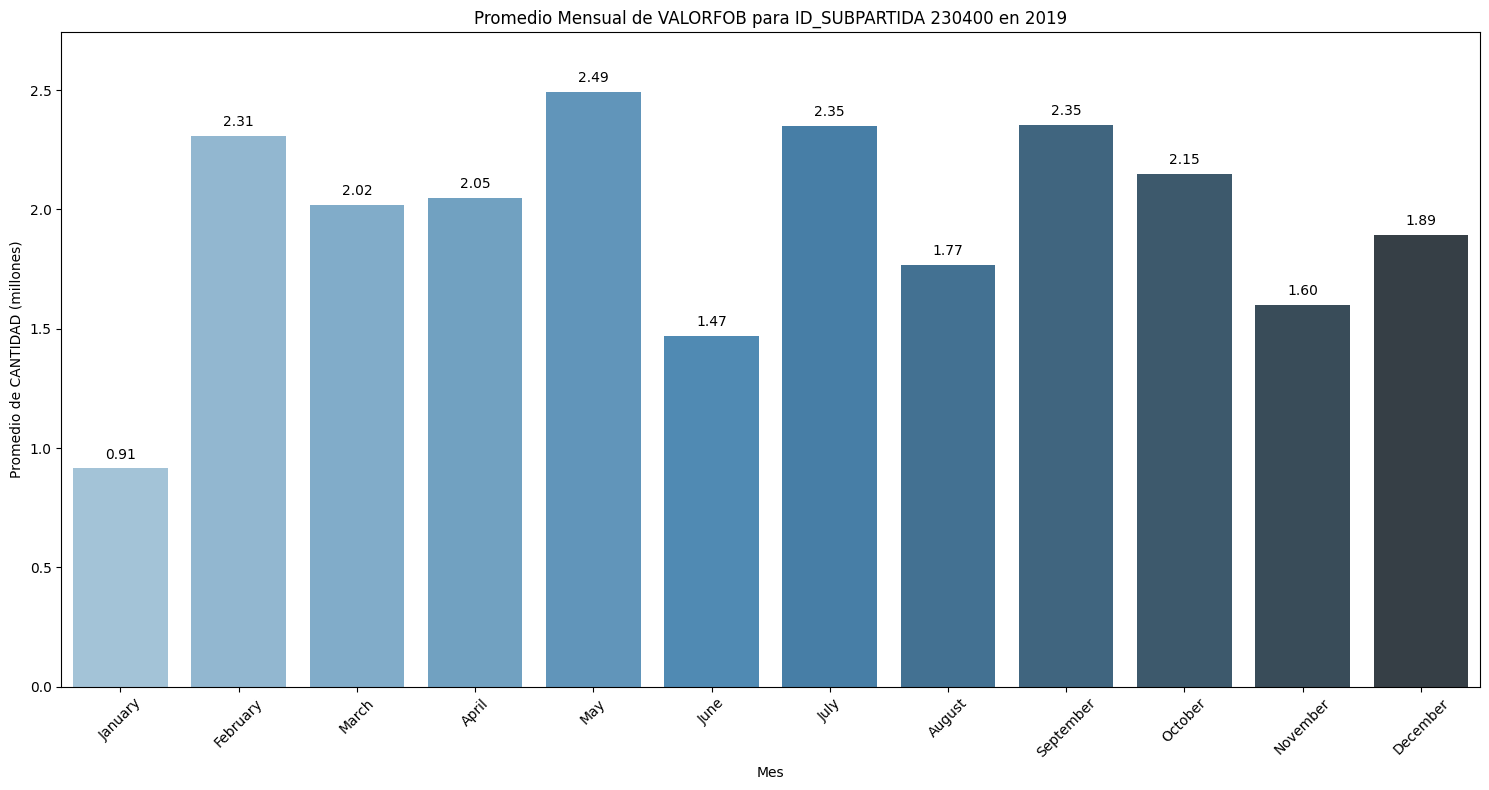

In [57]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2019)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 230400 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\931283475.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\931283475.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




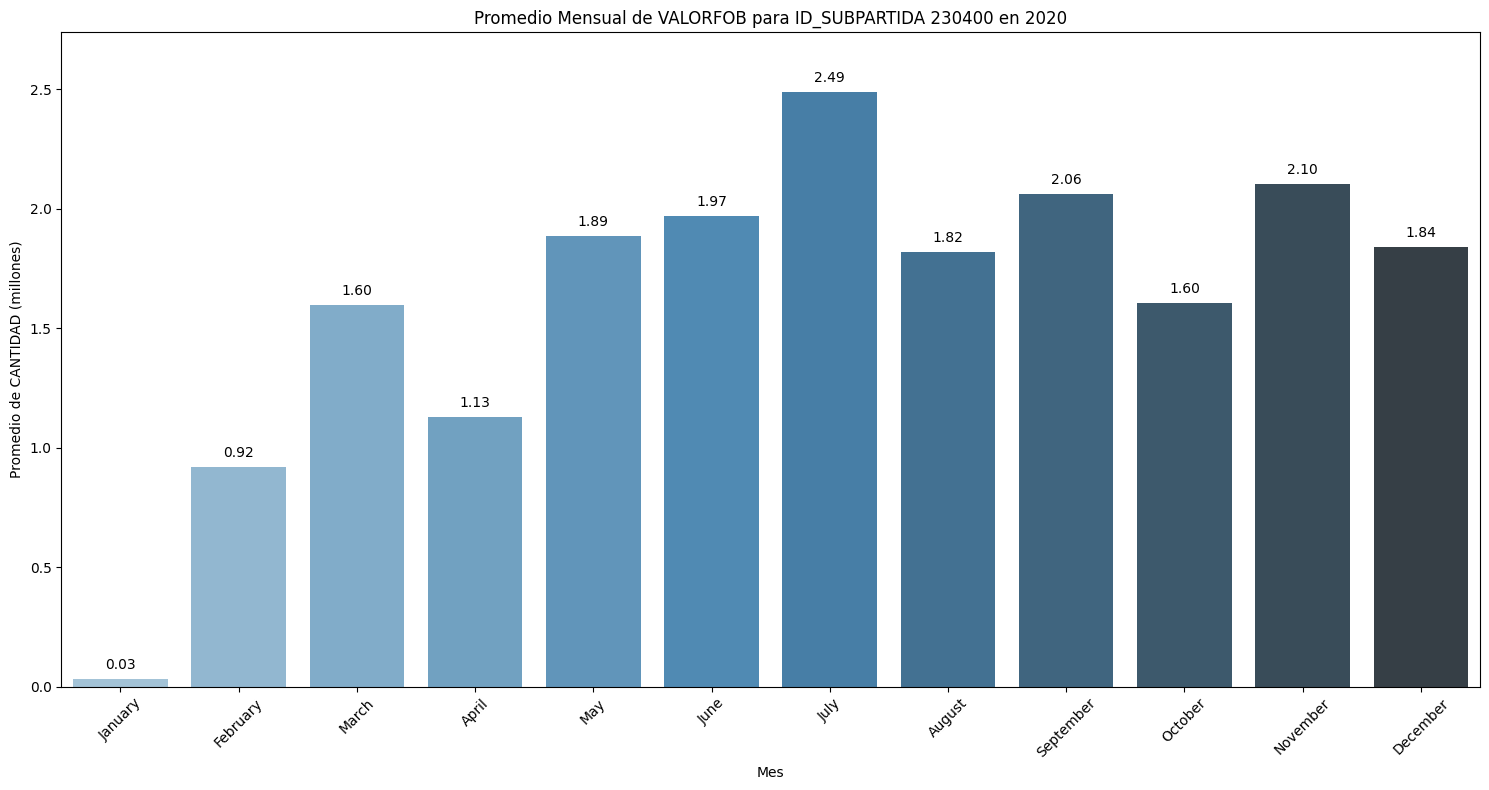

In [56]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2020)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 230400 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\4221536497.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\4221536497.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




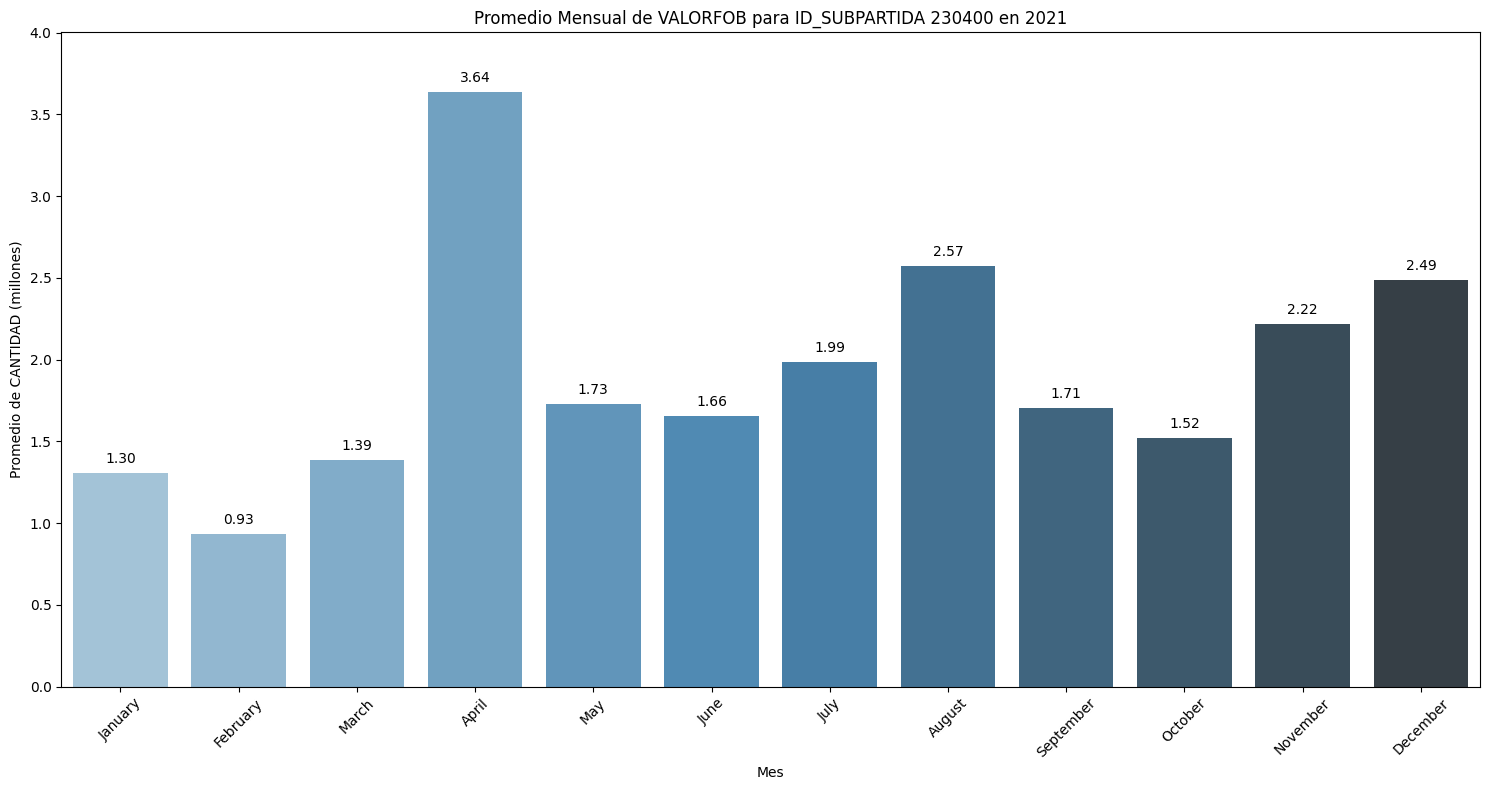

In [55]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2021)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 230400 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\721757143.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\721757143.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




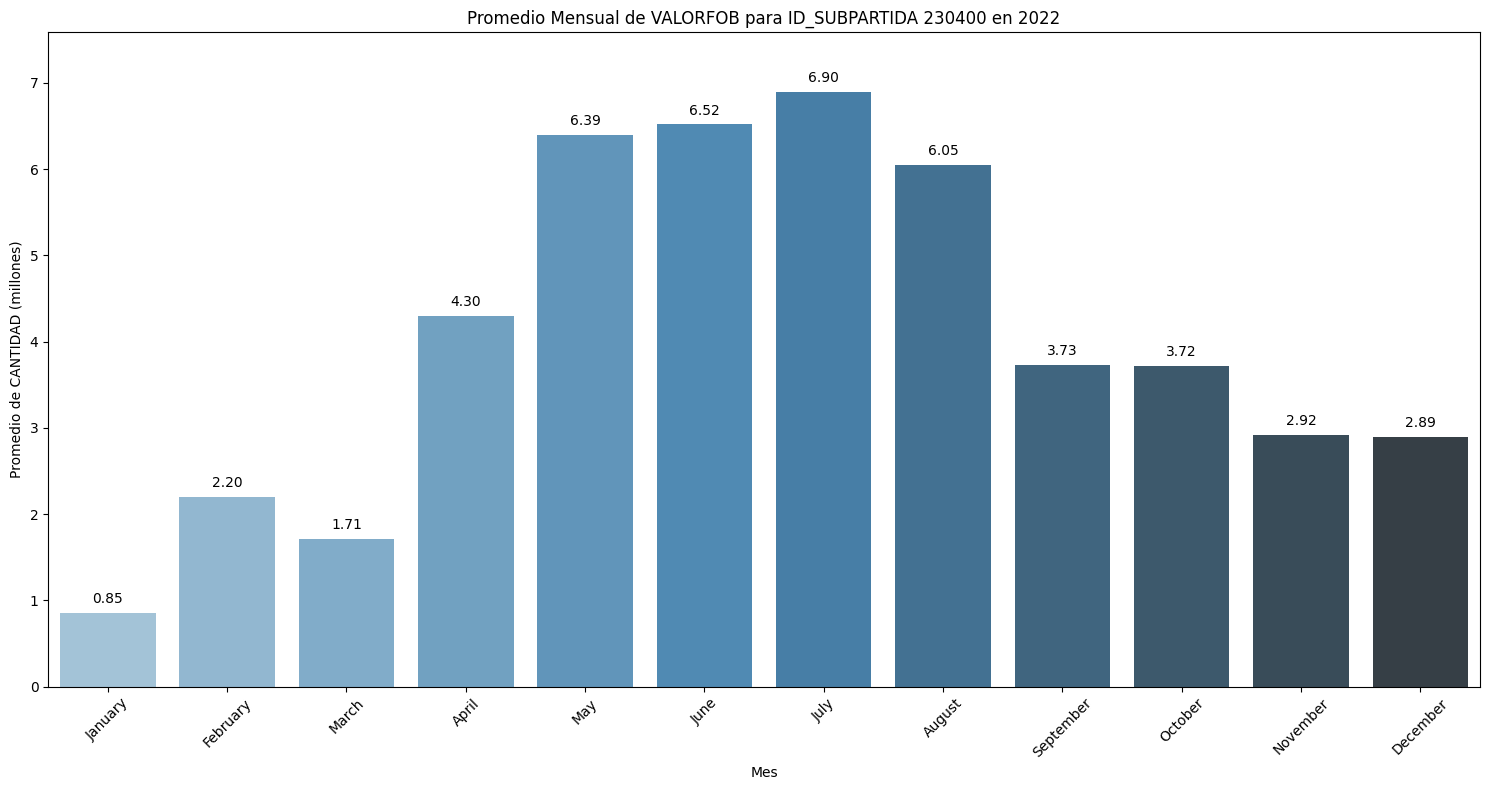

In [54]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2022)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 230400 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3653676234.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3653676234.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




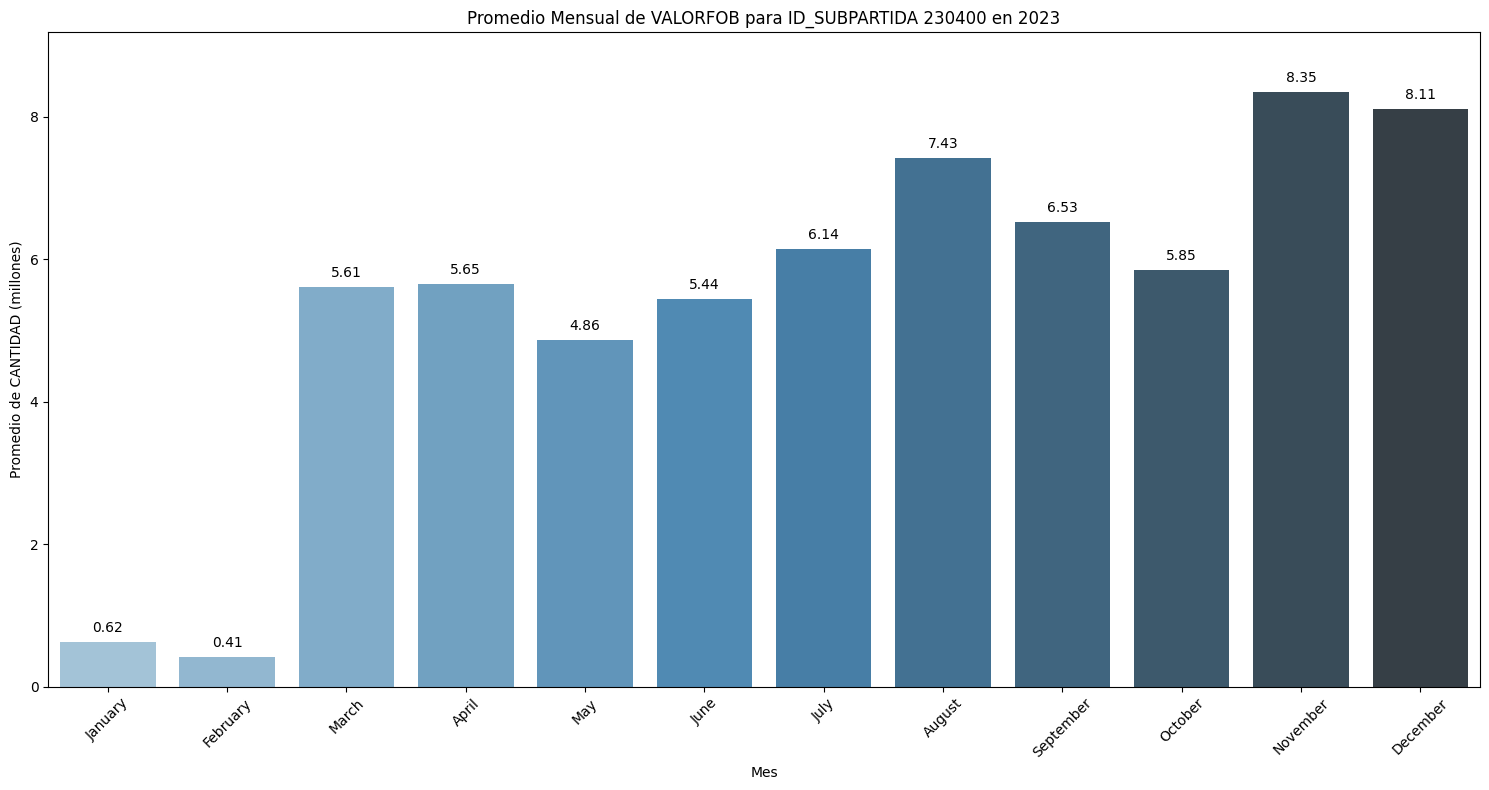

In [53]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2023)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 230400 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\30942537.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\30942537.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




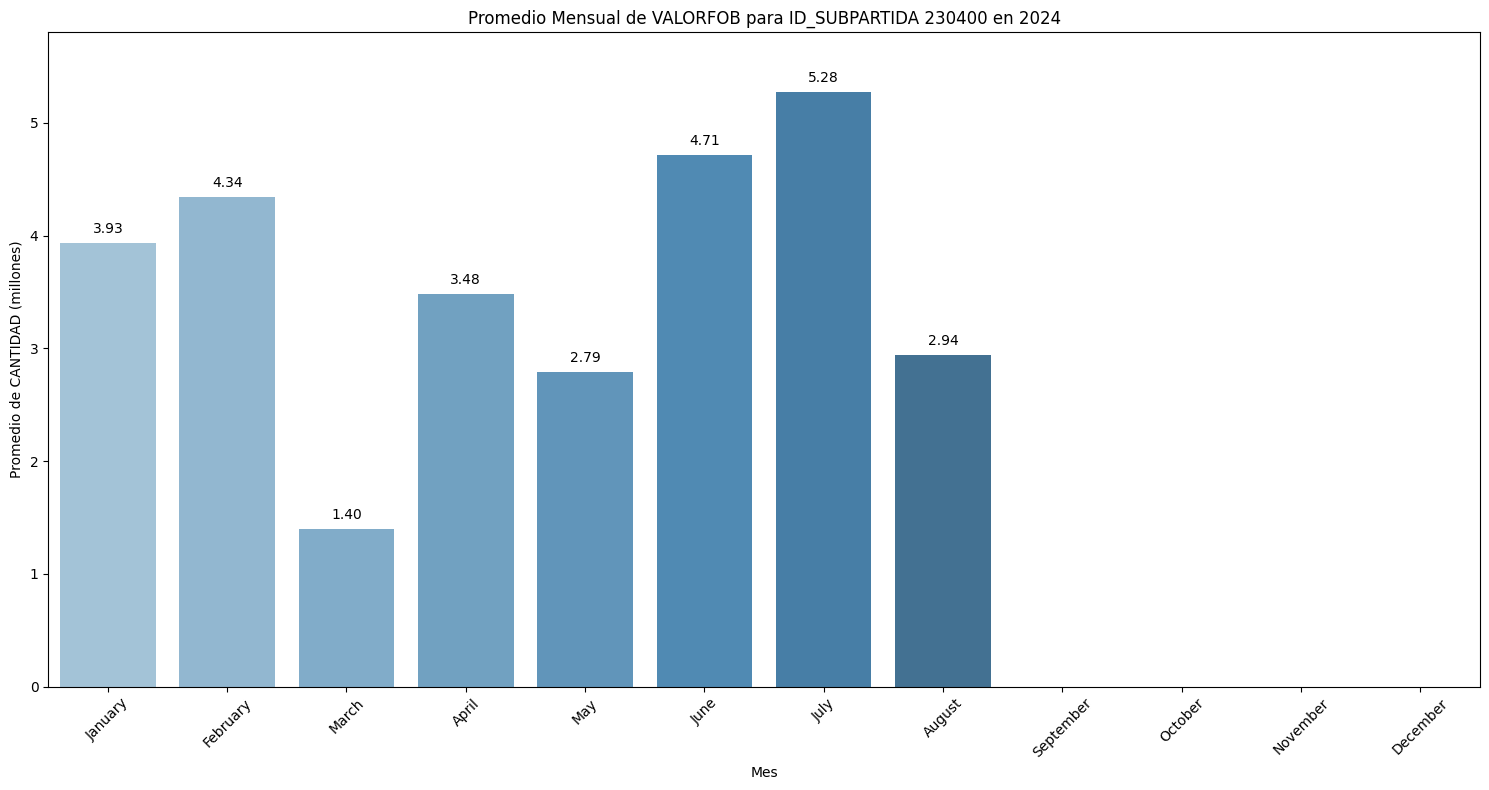

In [52]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2024)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 230400 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [84]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_expoParaguay_Filter_VFOB[df_expoParaguay_Filter_VFOB['ID_SUBPARTIDA'] == 230400]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['VALORFOB'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='VALORFOB', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de VALORFOB para ID_SUBPARTIDA 230400 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de valorfob',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3348813050.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3348813050.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### GRAFICO DEL ID 20230

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3641950247.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3641950247.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




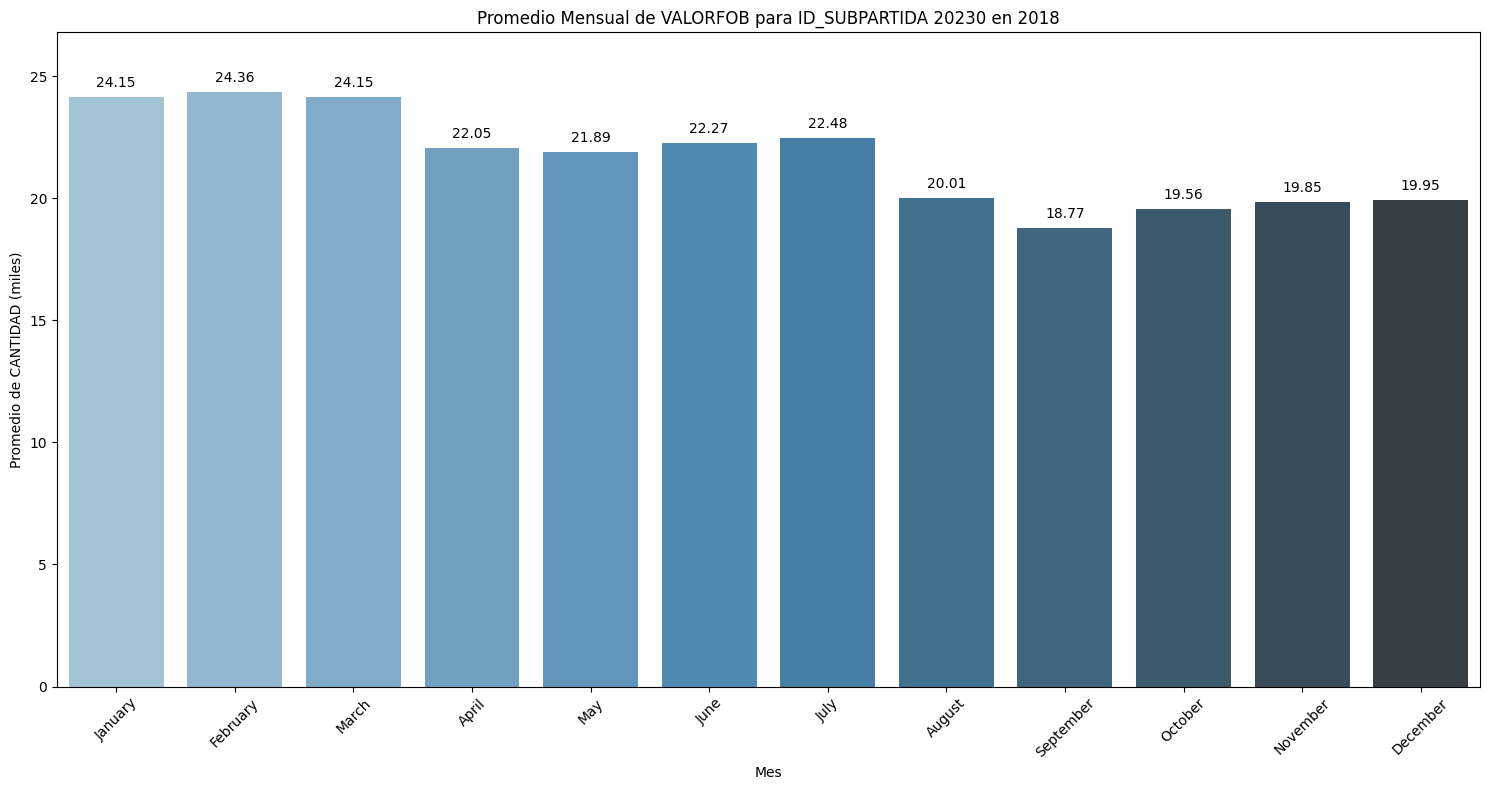

In [59]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2018)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20230]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20230 en 2018')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1203901766.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1203901766.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




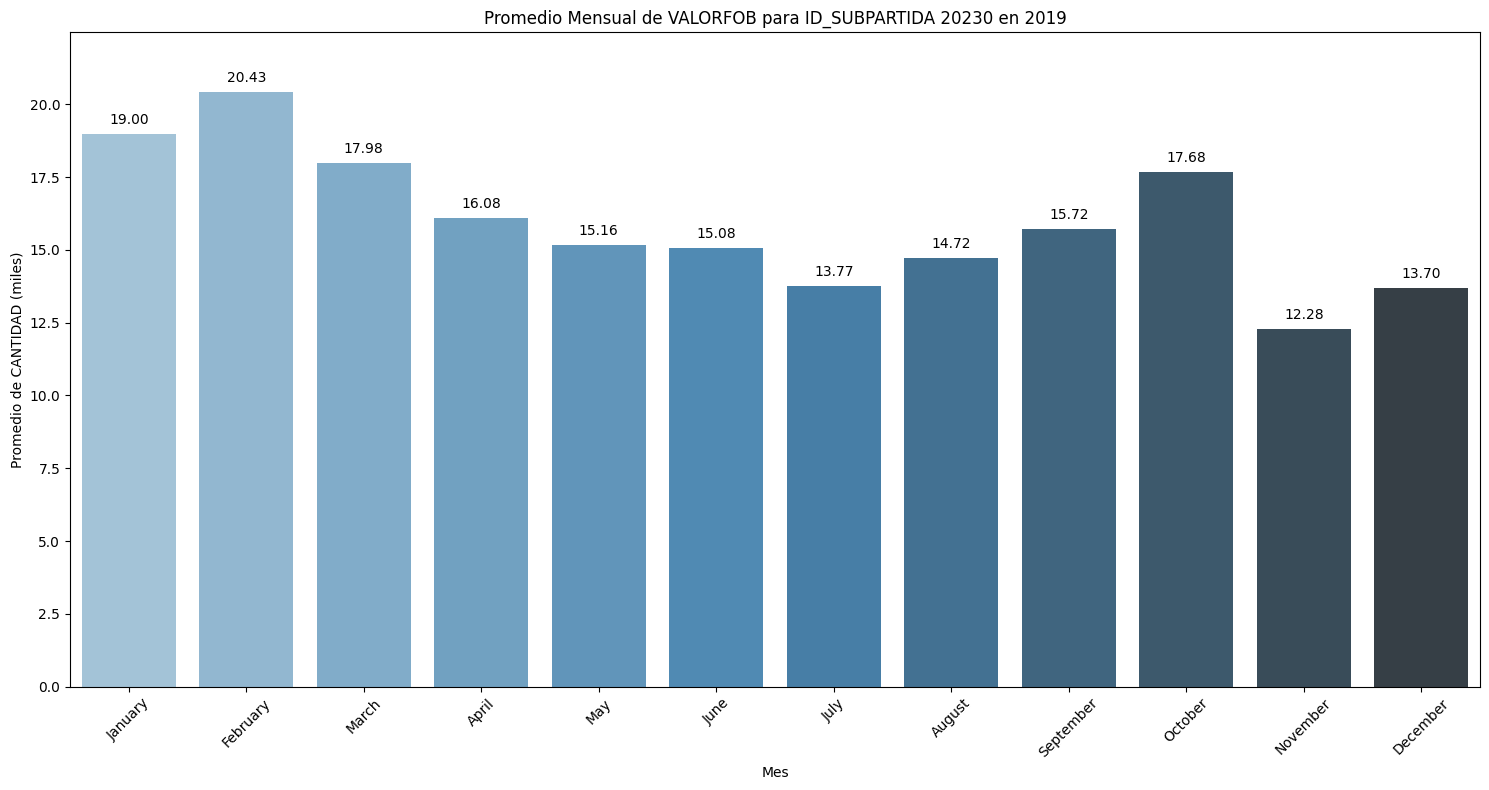

In [61]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2019)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20230]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20230 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3706573902.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3706573902.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




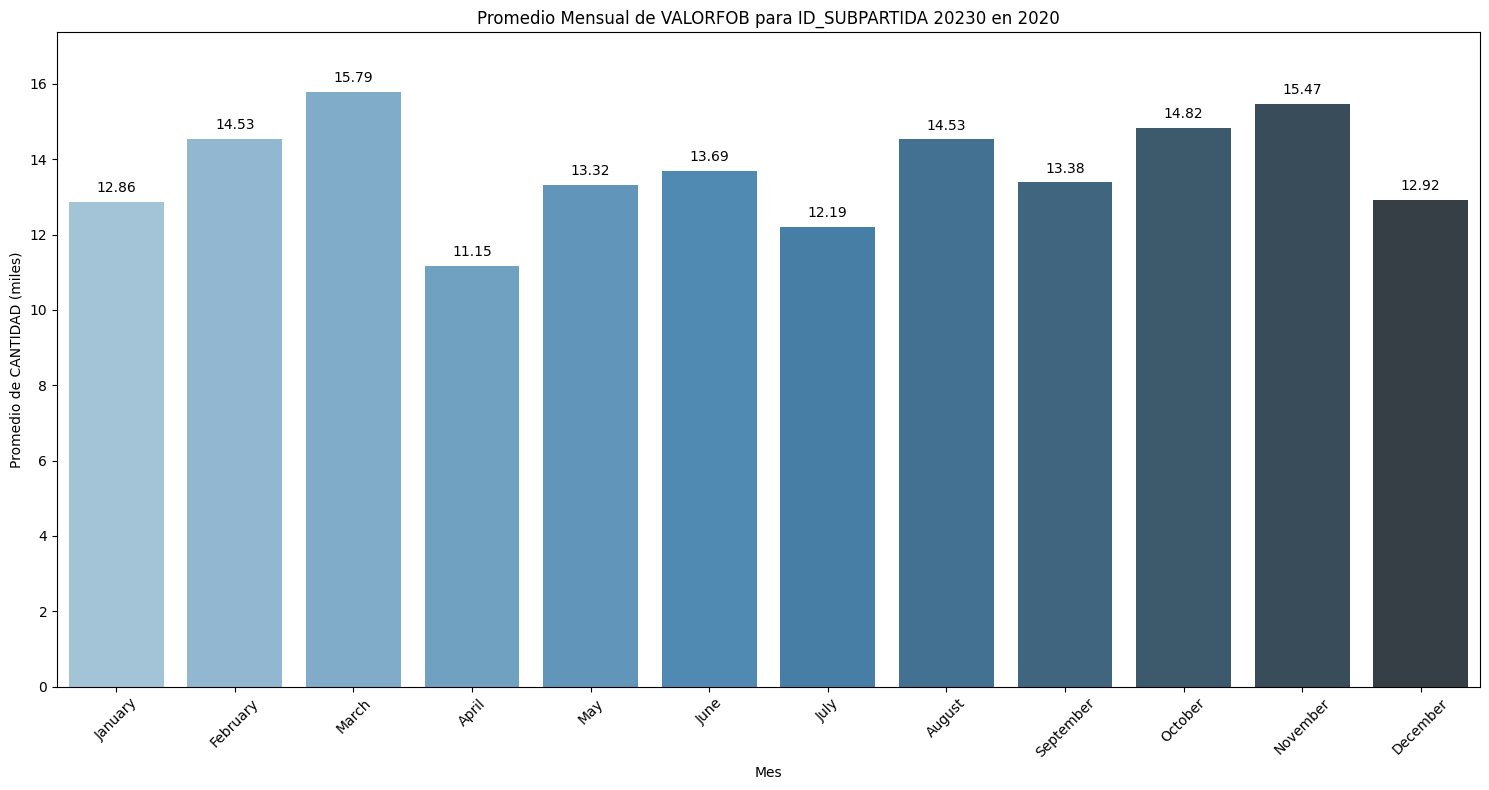

In [60]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2020)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20230]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20230 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\393053239.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\393053239.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




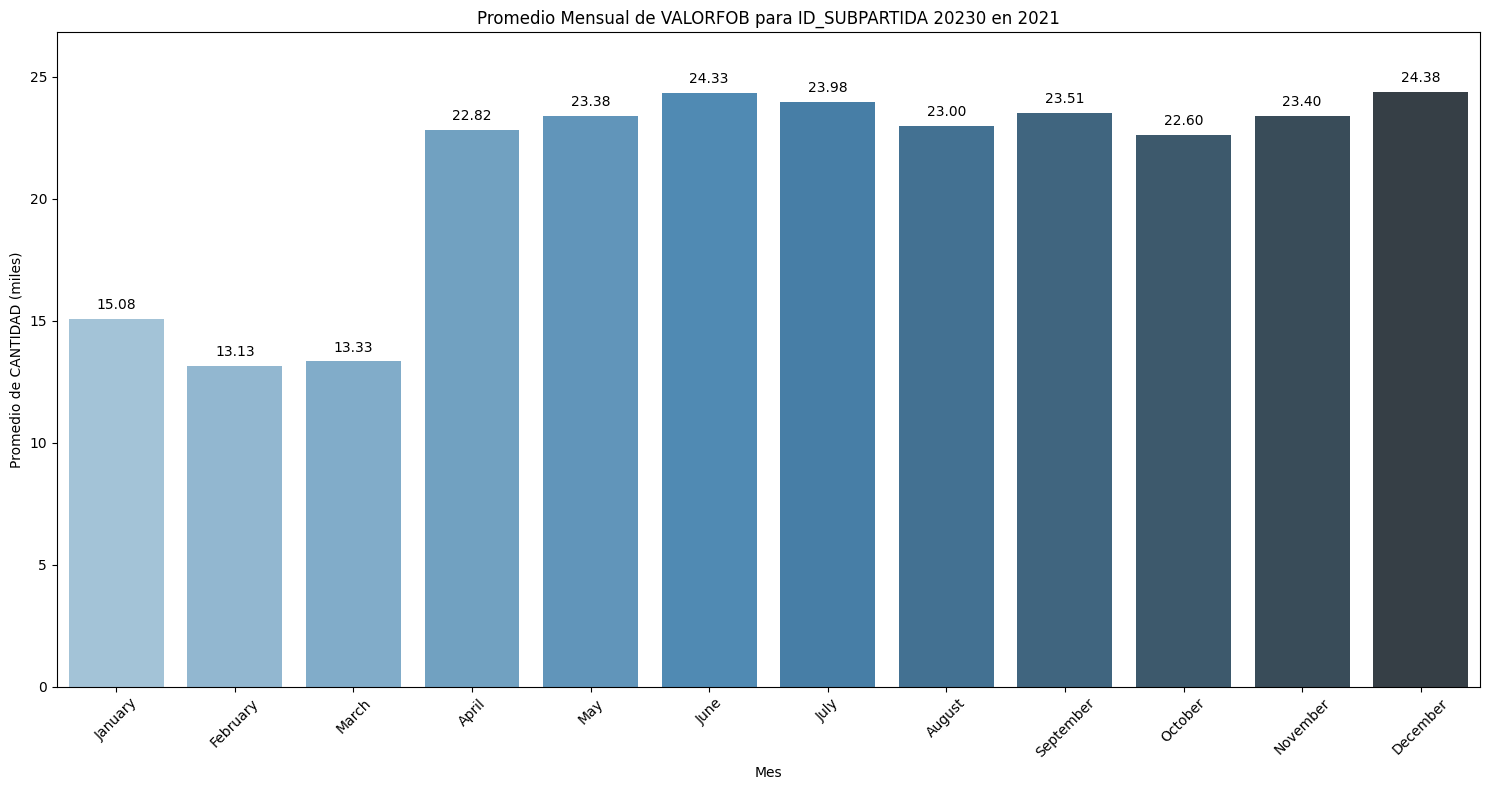

In [62]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2021)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20230]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20230 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\576140761.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\576140761.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




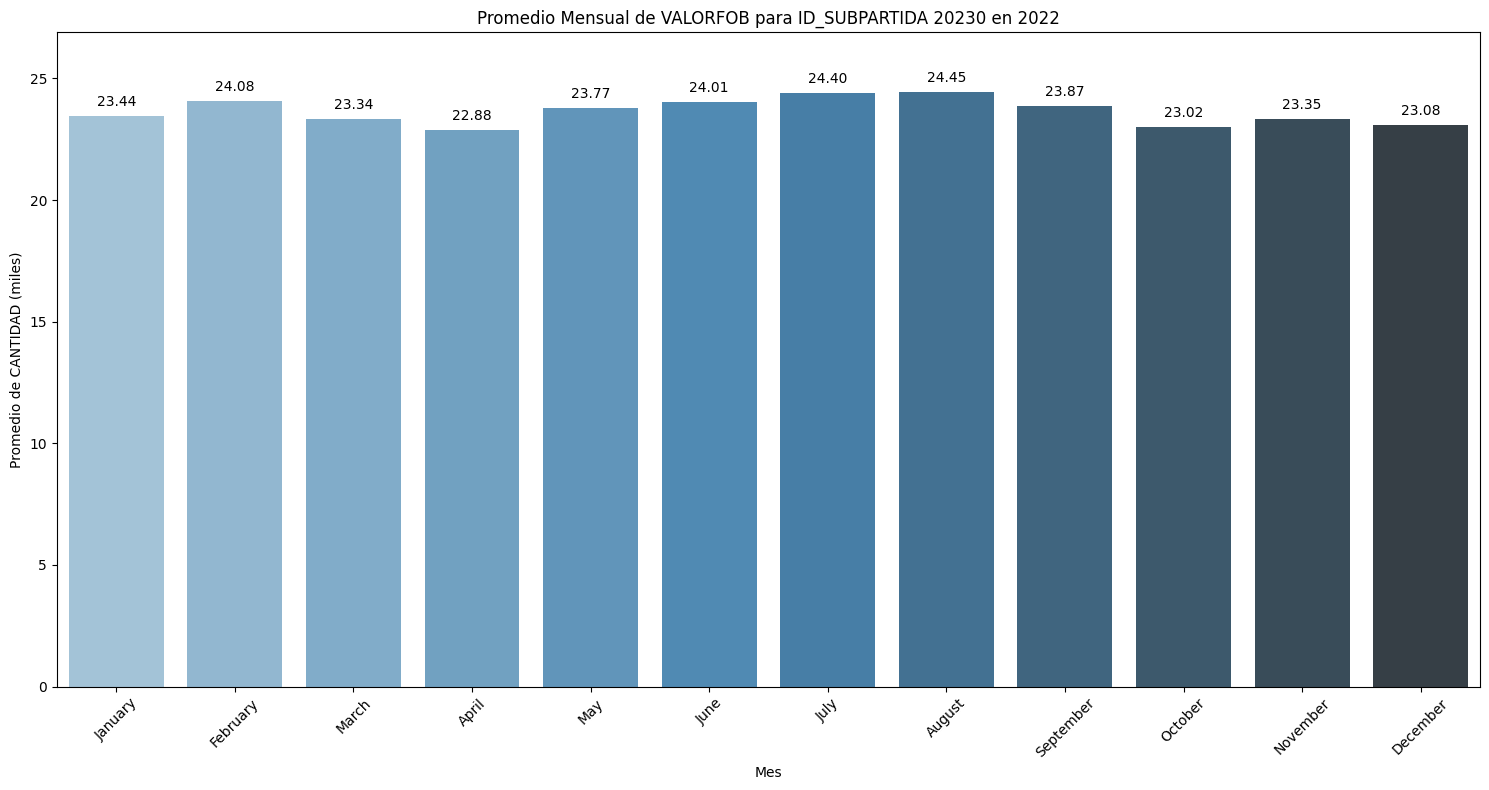

In [63]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2022)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20230]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20230 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1232116453.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1232116453.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




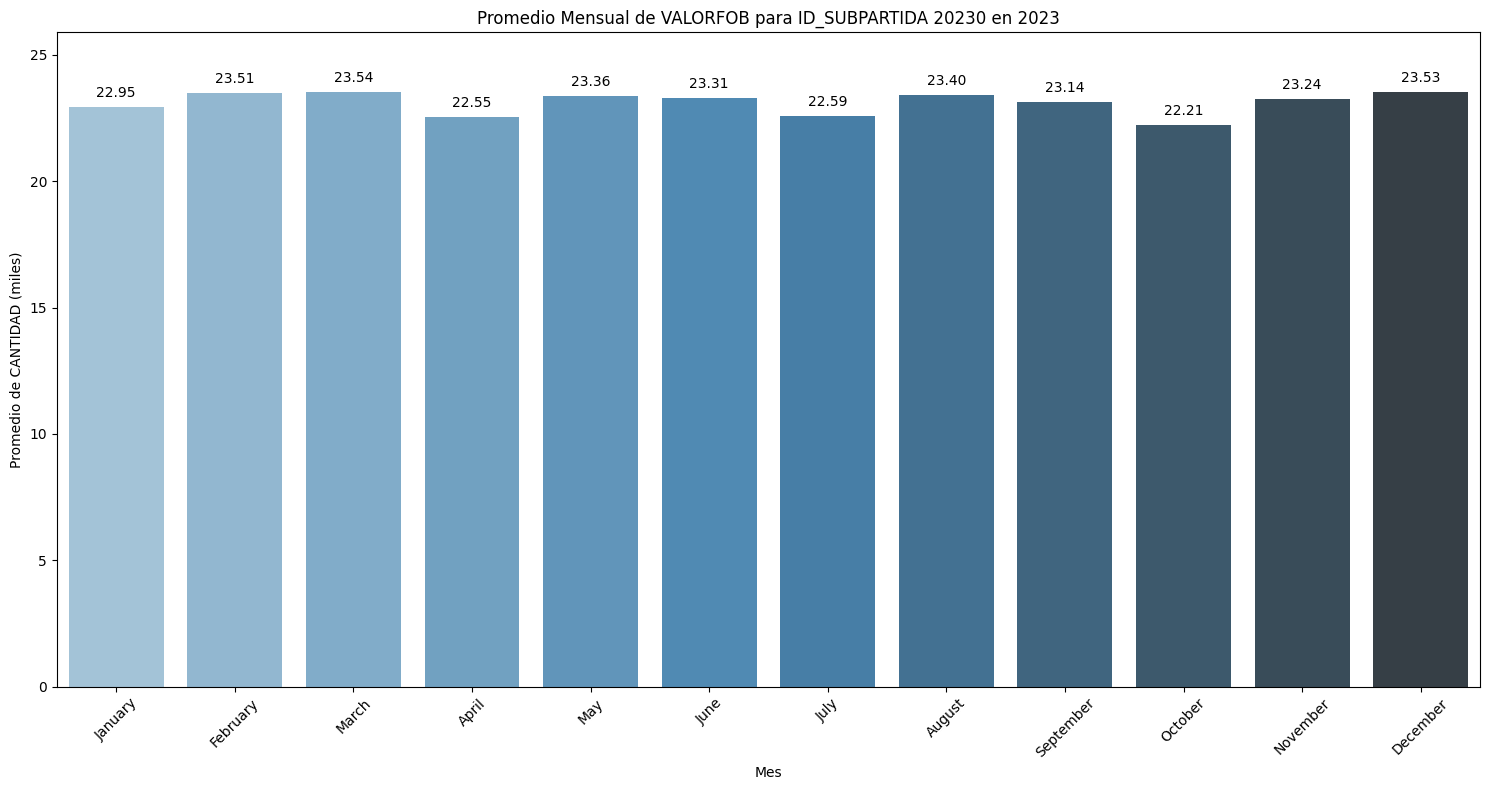

In [64]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2023)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20230]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20230 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1084873624.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1084873624.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




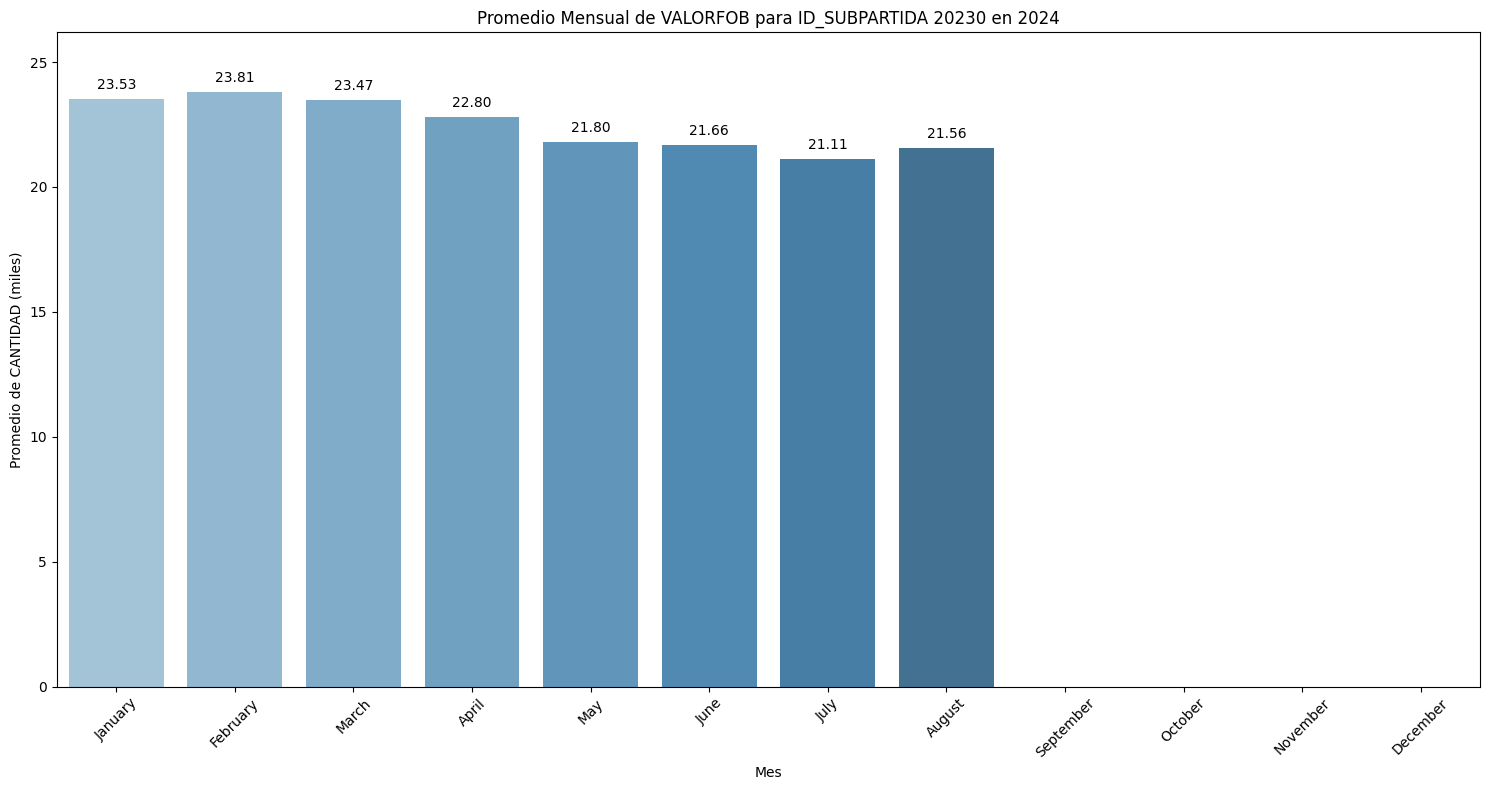

In [65]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2024)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20230]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20230 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [ ]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_expoParaguay_Filter_VFOB[df_expoParaguay_Filter_VFOB['ID_SUBPARTIDA'] == 20230]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['VALORFOB'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='VALORFOB', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de VALORFOB', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de CANTIDAD para ID_SUBPARTIDA 20230 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de valorfob',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1357041790.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1357041790.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



En 2022, el promedio de valor FOB empieza alto en enero y muestra una disminución hasta abril, seguida de un incremento importante hacia julio y una posterior caída en los meses finales del año.
En 2021, el valor FOB también comienza elevado, pero se mantiene relativamente estable en la primera mitad del año y luego muestra un aumento a partir de septiembre, finalizando con un alza en diciembre.
Los demás años presentan valores más bajos en comparación, con menos fluctuaciones pronunciadas, aunque se observa una ligera tendencia al alza en ciertos meses, como en agosto o septiembre.

Para algunos años, como 2029 y 2022, se observa una subida en la segunda mitad del año (junio-julio), lo que podría deberse a factores estacionales o aumentos en la demanda internacional. sin embargo, en los demas años se hace una bajada de la cual nunca se recupera ninguno

En años recientes como 2024, la línea es bastante plana, lo que indica menos variabilidad, posiblemente debido a estabilización en los precios o menor demanda.

Dado que es un producto de exportación, eventos como cambios en la demanda global de carne, restricciones de importación/exportación, y fluctuaciones en los costos de transporte pueden haber afectado los valores FOB en años específicos.
Es posible que en años de fluctuaciones fuertes (como 2022 y 2021), hayan influido factores como variaciones en la producción, costos de alimentación del ganado, o situaciones económicas específicas en Paraguay o en los mercados importadores. Incluso por efectos de la pandemia

### GRAFICO DEL ID 20130

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\820404510.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\820404510.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




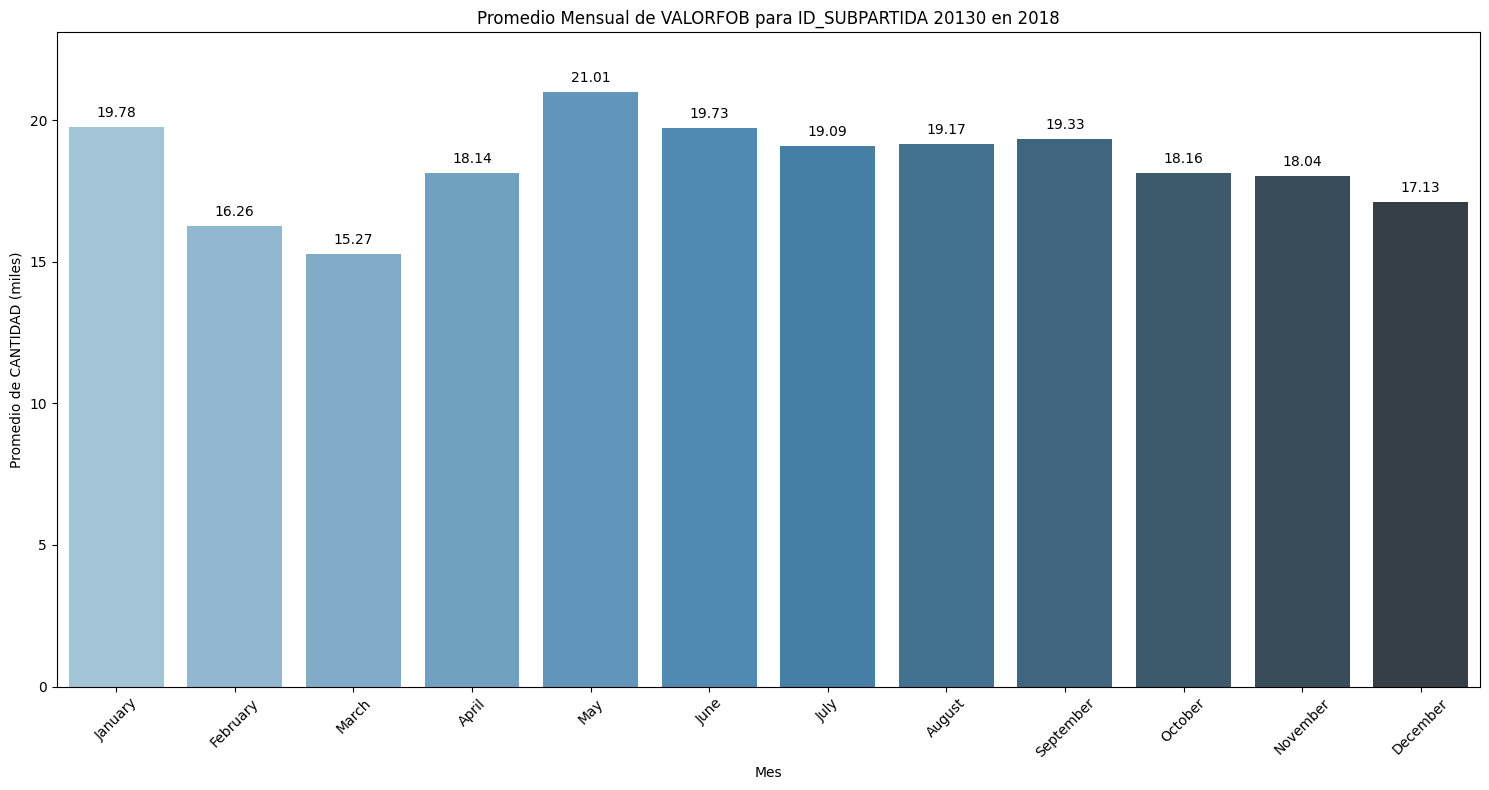

In [67]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2018)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20130]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20130 en 2018')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2303322984.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2303322984.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




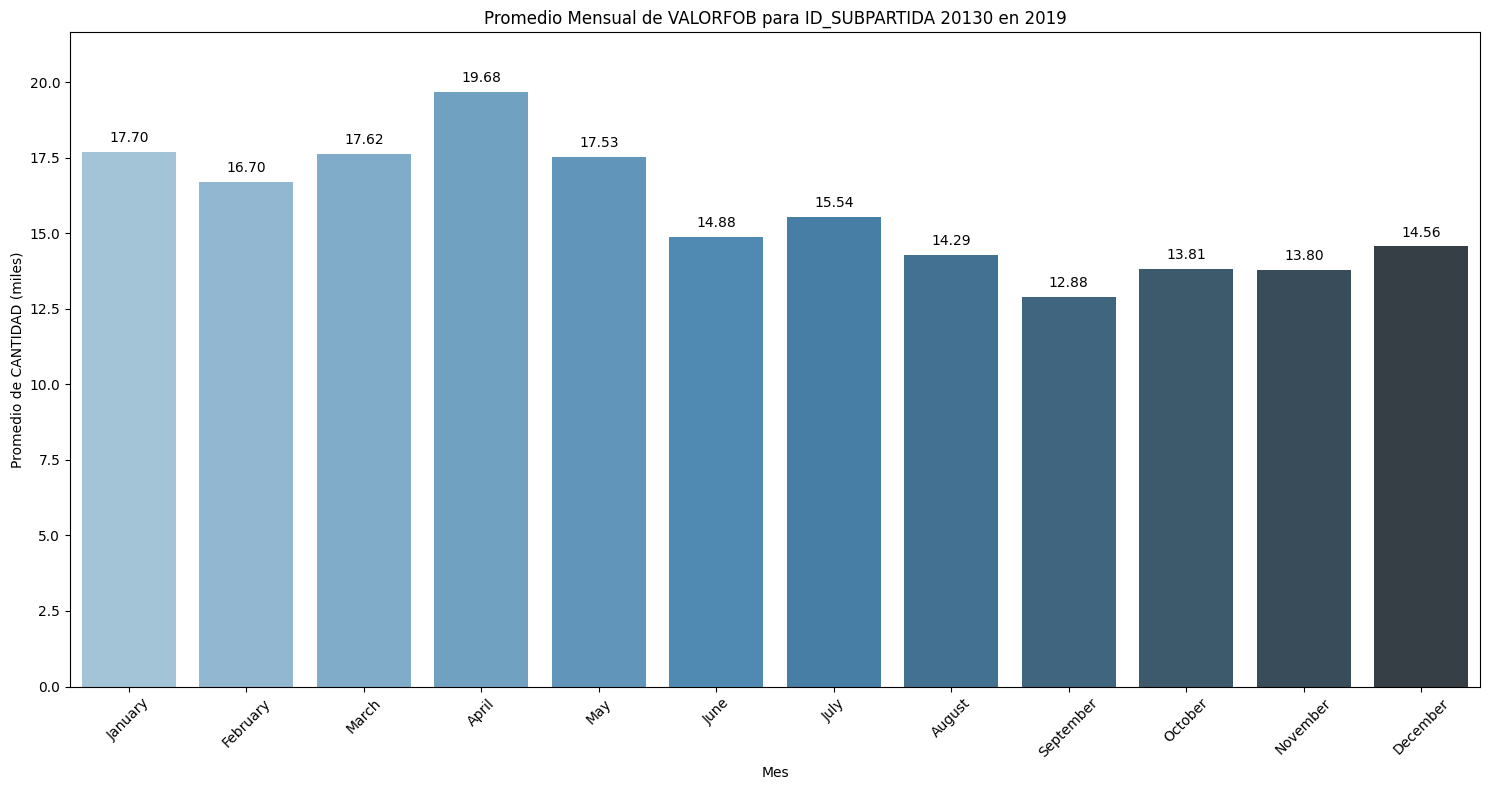

In [68]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2019)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20130]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20130 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\370591613.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\370591613.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




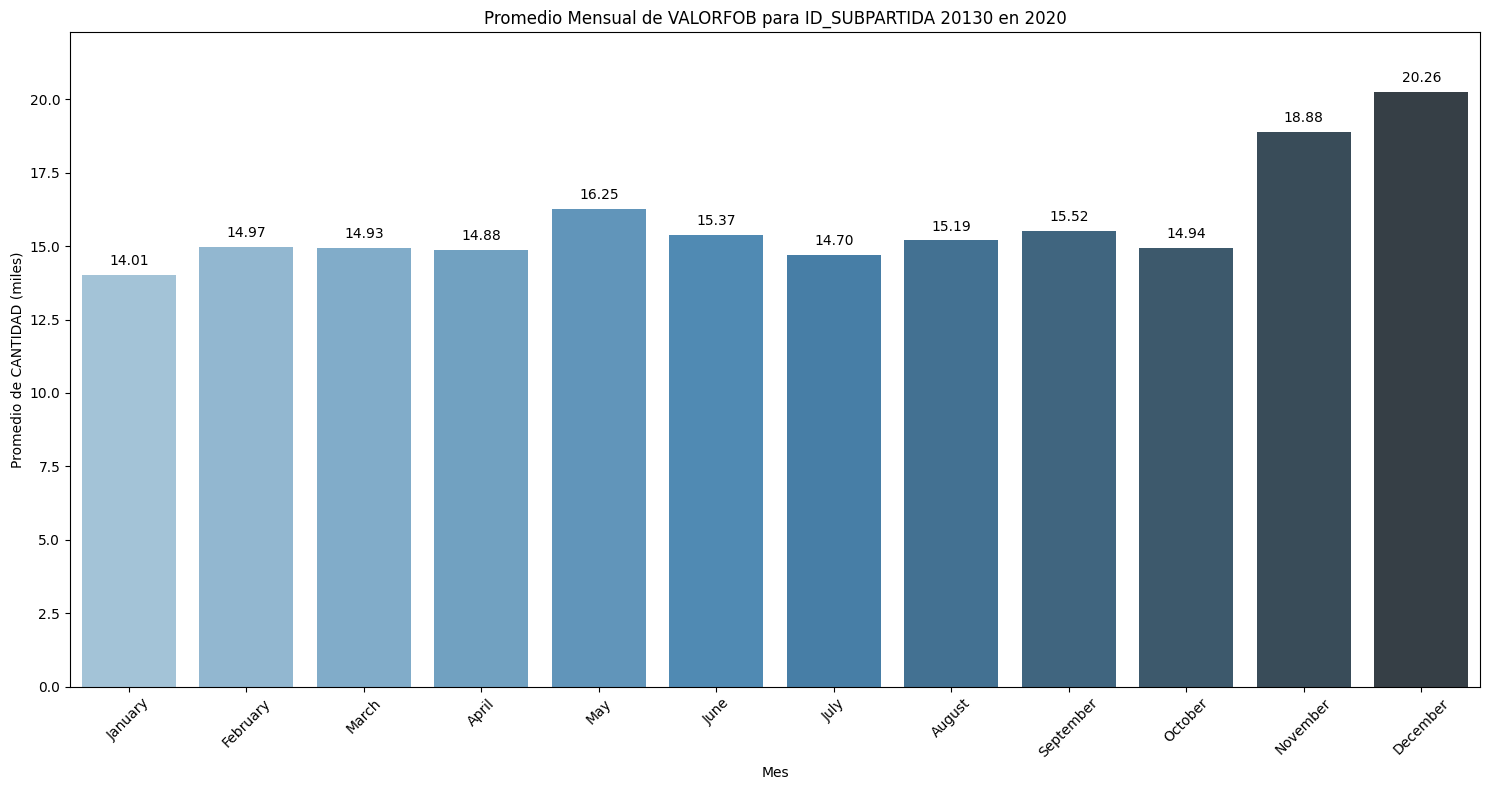

In [69]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2020)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20130]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20130 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3212455443.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3212455443.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




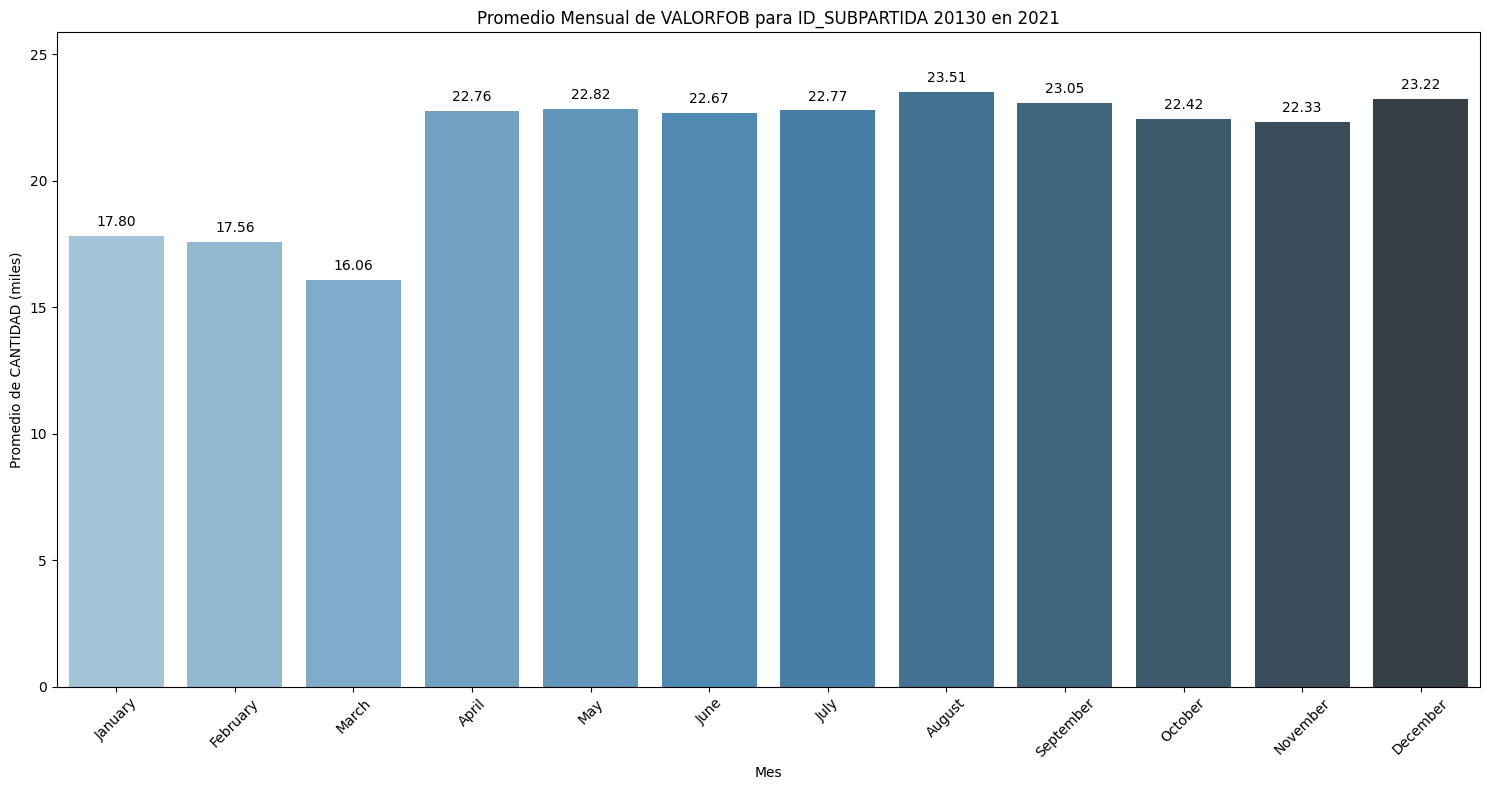

In [70]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2021)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20130]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20130 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1936654060.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1936654060.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




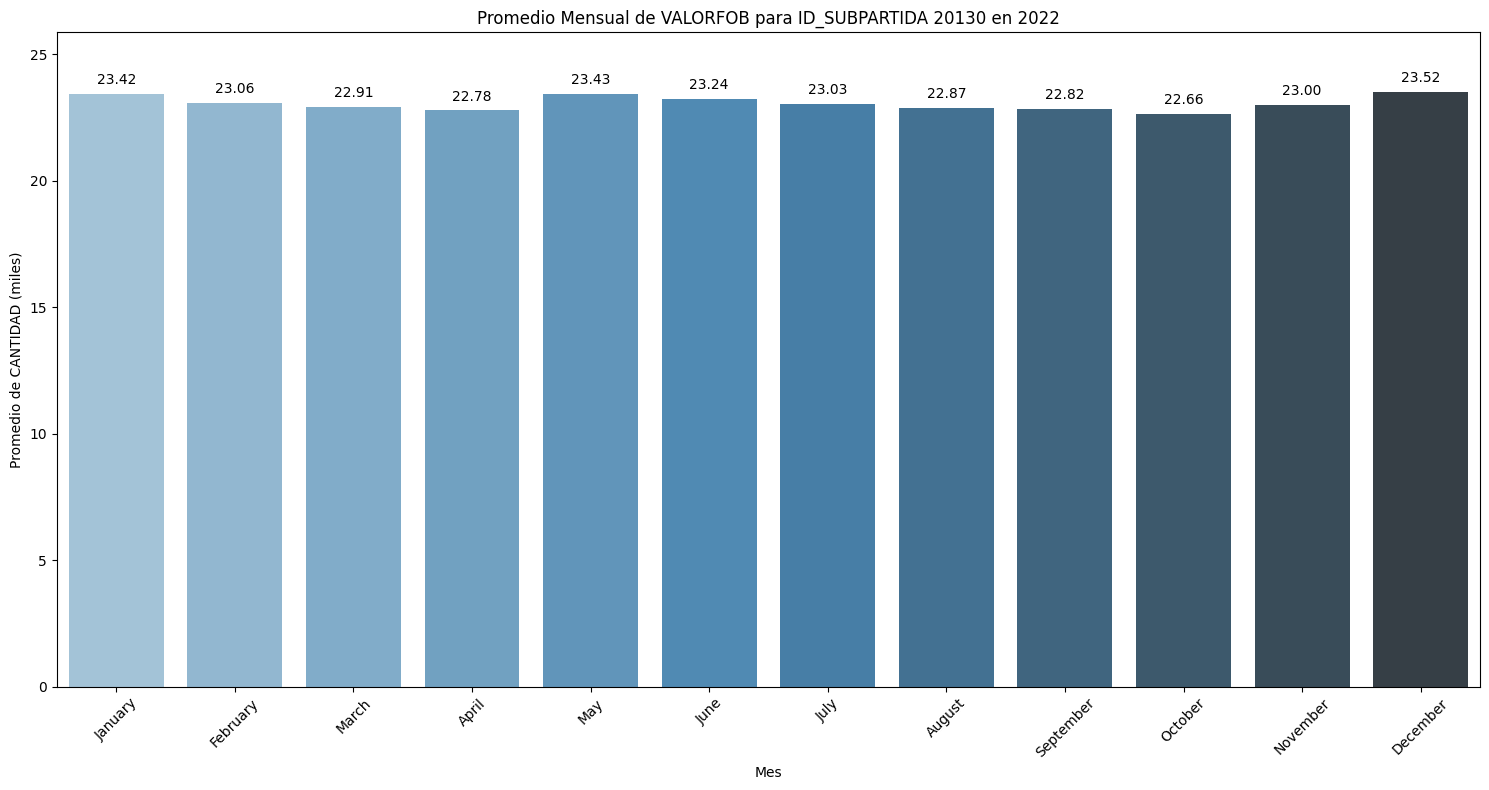

In [71]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2022)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20130]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20130 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3501061529.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3501061529.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




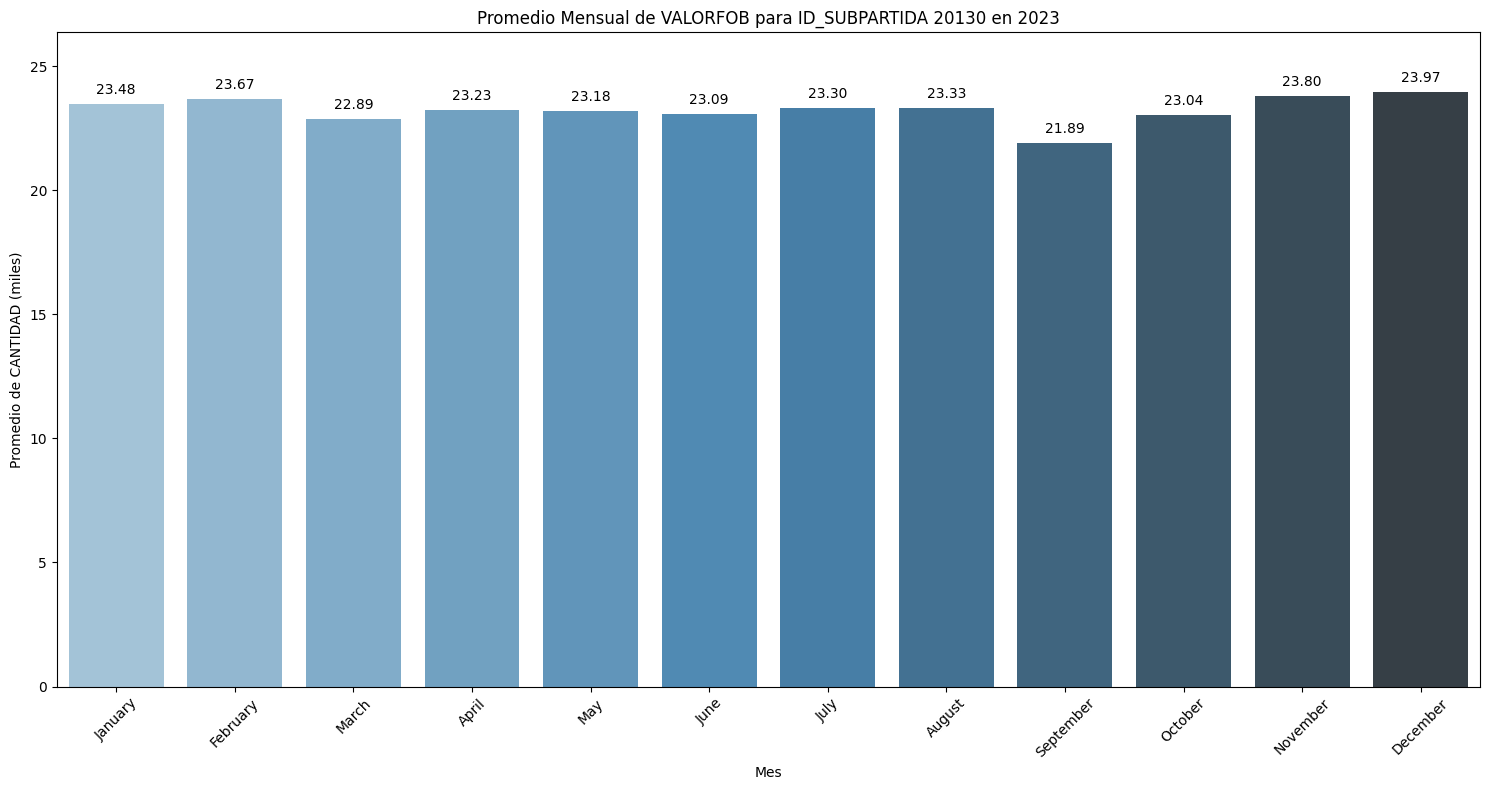

In [72]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2023)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20130]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20130 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1017180176.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1017180176.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




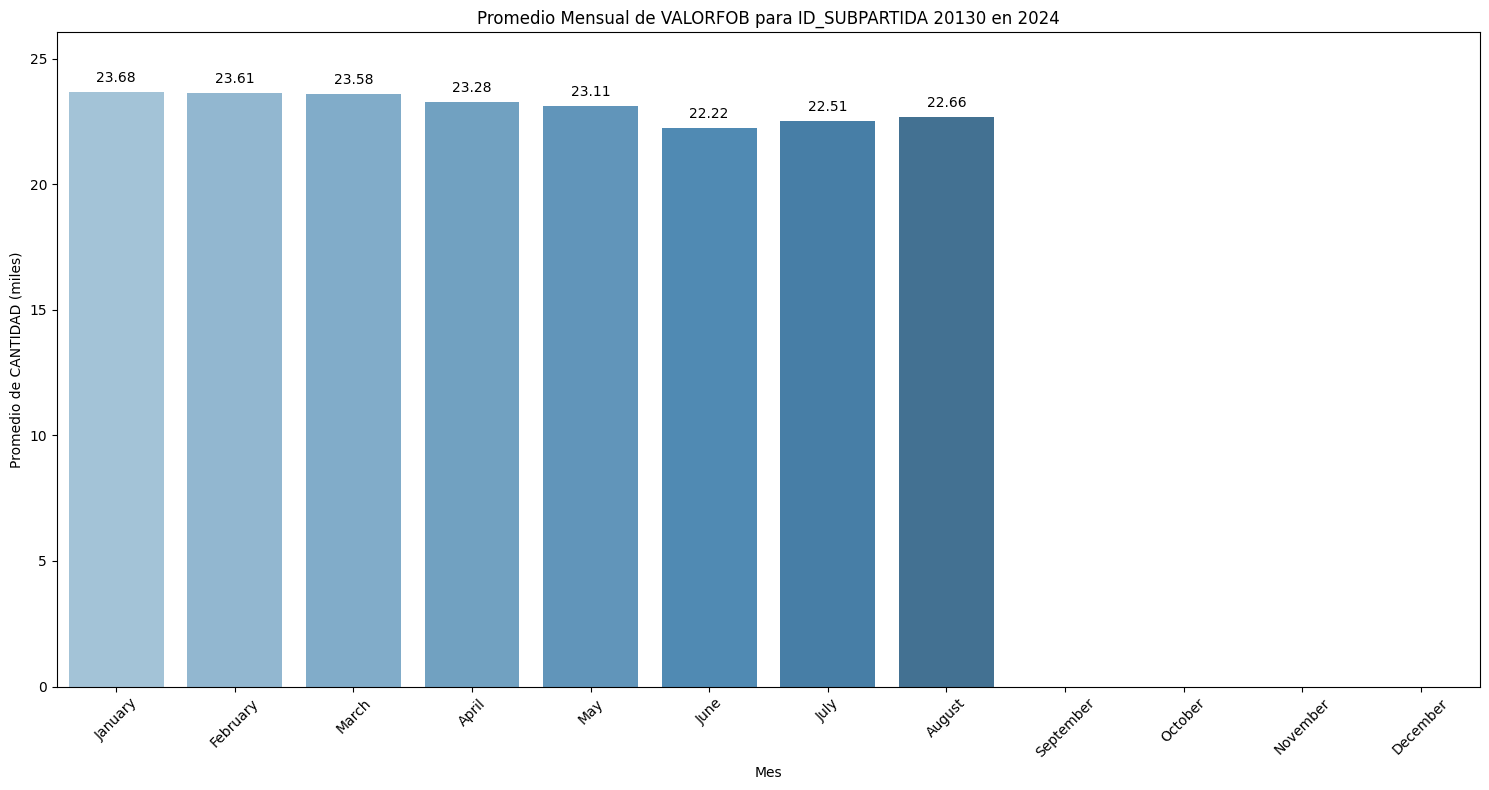

In [73]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2024)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 20130]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20130 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [ ]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_expoParaguay_Filter_VFOB[df_expoParaguay_Filter_VFOB['ID_SUBPARTIDA'] == 20130]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['VALORFOB'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='VALORFOB', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de VALORFOB para ID_SUBPARTIDA 20130 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de valorfob',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\132866503.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\132866503.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Abril a Julio: Parece que estos meses son unos meses decisivos para poder identificar una posible tendencia de su valor hasta diciembre

Agosto a Octubre: Este periodo es notable en muchos años, ya que muchos valores bajan de valor durante esos meses. Esto mismo sucede con junio y julio

Noviembre y Diciembre: hay una ligera recuperación o estabilización al final del año, lo cual puede indicar un comportamiento estacional de aumento en esos meses.

2021: Muestra un comportamiento ascendente en los meses iniciales, alcanzando un pico en agosto y manteniendo valores altos hasta fin de año.
2023: Similar a 2021, aunque menos pronunciado, tiene un aumento en los primeros meses y alcanza su punto más alto en octubre.
2020: Se comporta de manera atípica, con una baja considerable de marzo en adelante, manteniéndose entre los valores más bajos comparados con otros años.

### GRAFICO DEL ID 150710

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\224648466.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\224648466.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




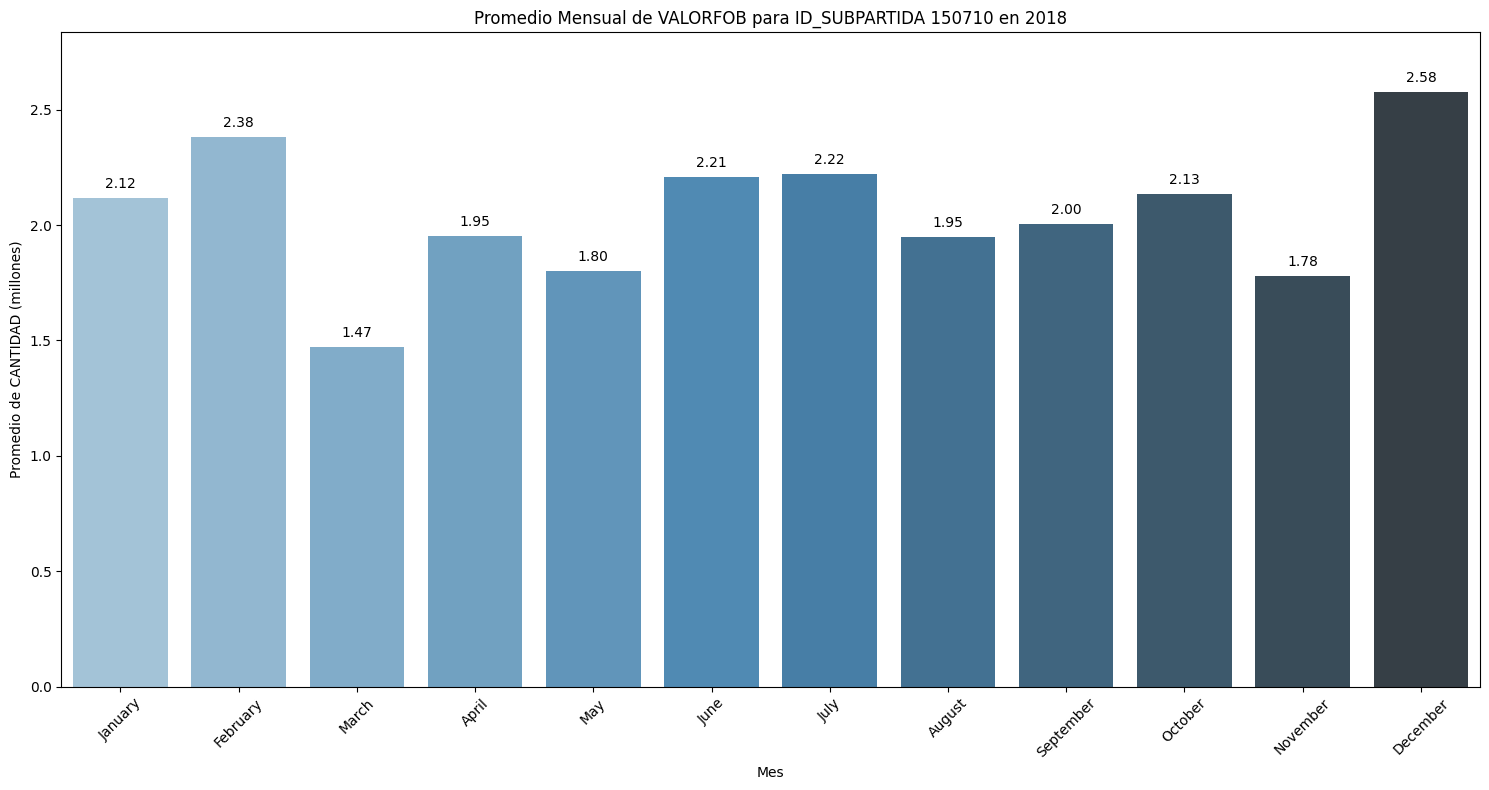

In [75]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2018)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 150710]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 150710 en 2018')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3331402098.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3331402098.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




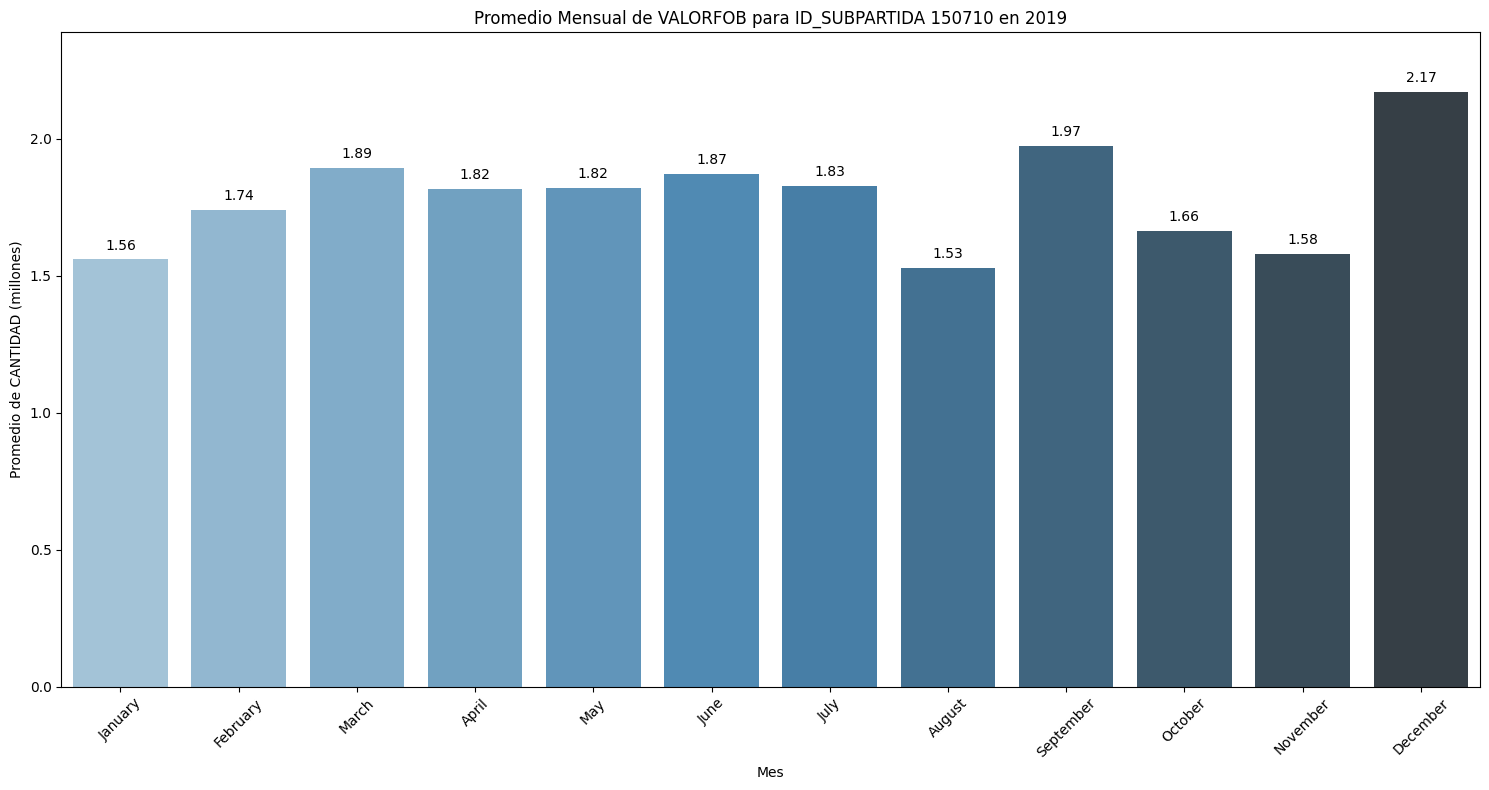

In [76]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2019)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 150710]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 150710 en 2019')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3942558678.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3942558678.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




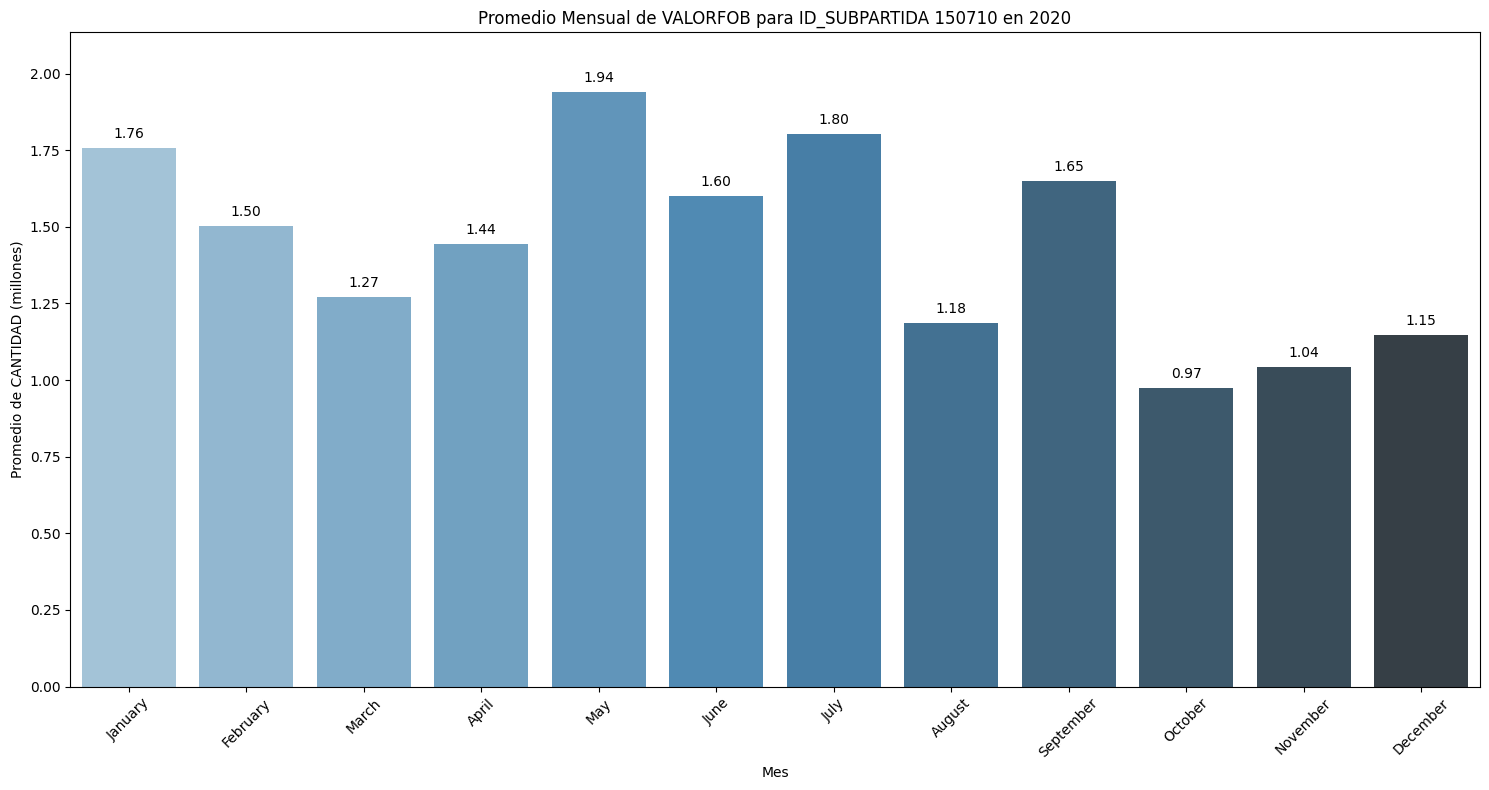

In [77]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2020)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 150710]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 150710 en 2020')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2111223619.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2111223619.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




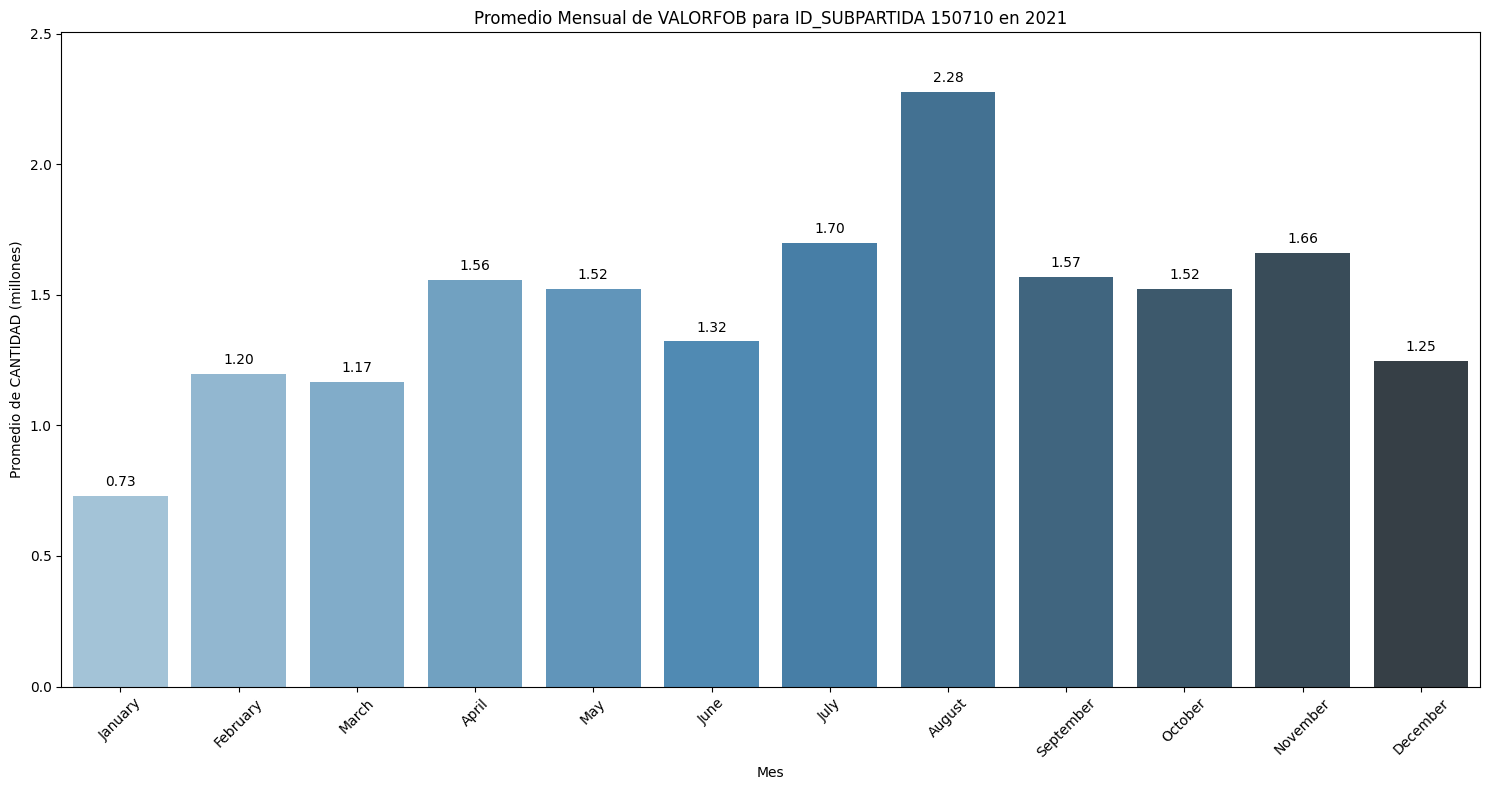

In [78]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2021)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 150710]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 150710 en 2021')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3363177634.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\3363177634.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




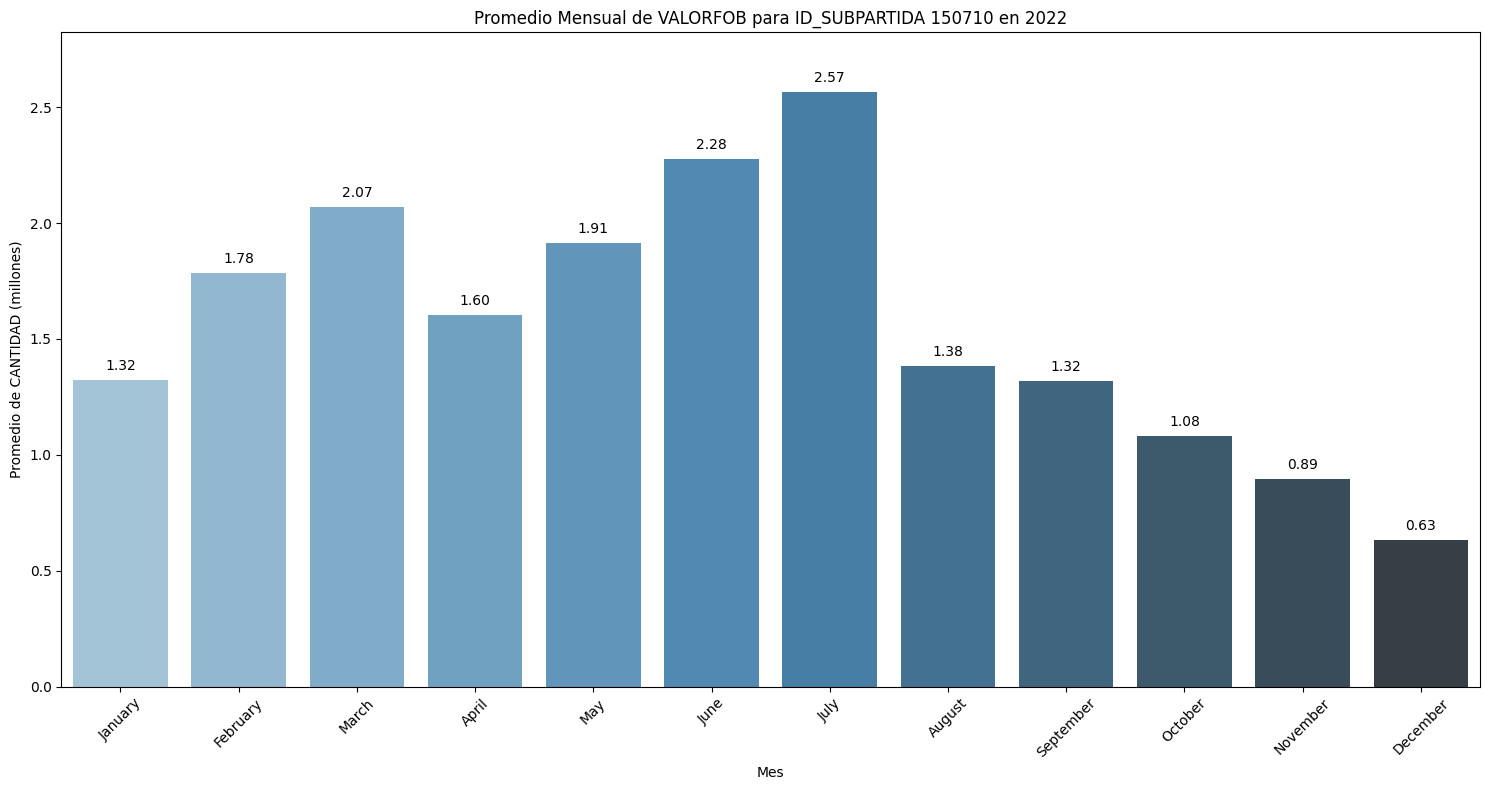

In [79]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2022)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 150710]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 150710 en 2022')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2736791472.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2736791472.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




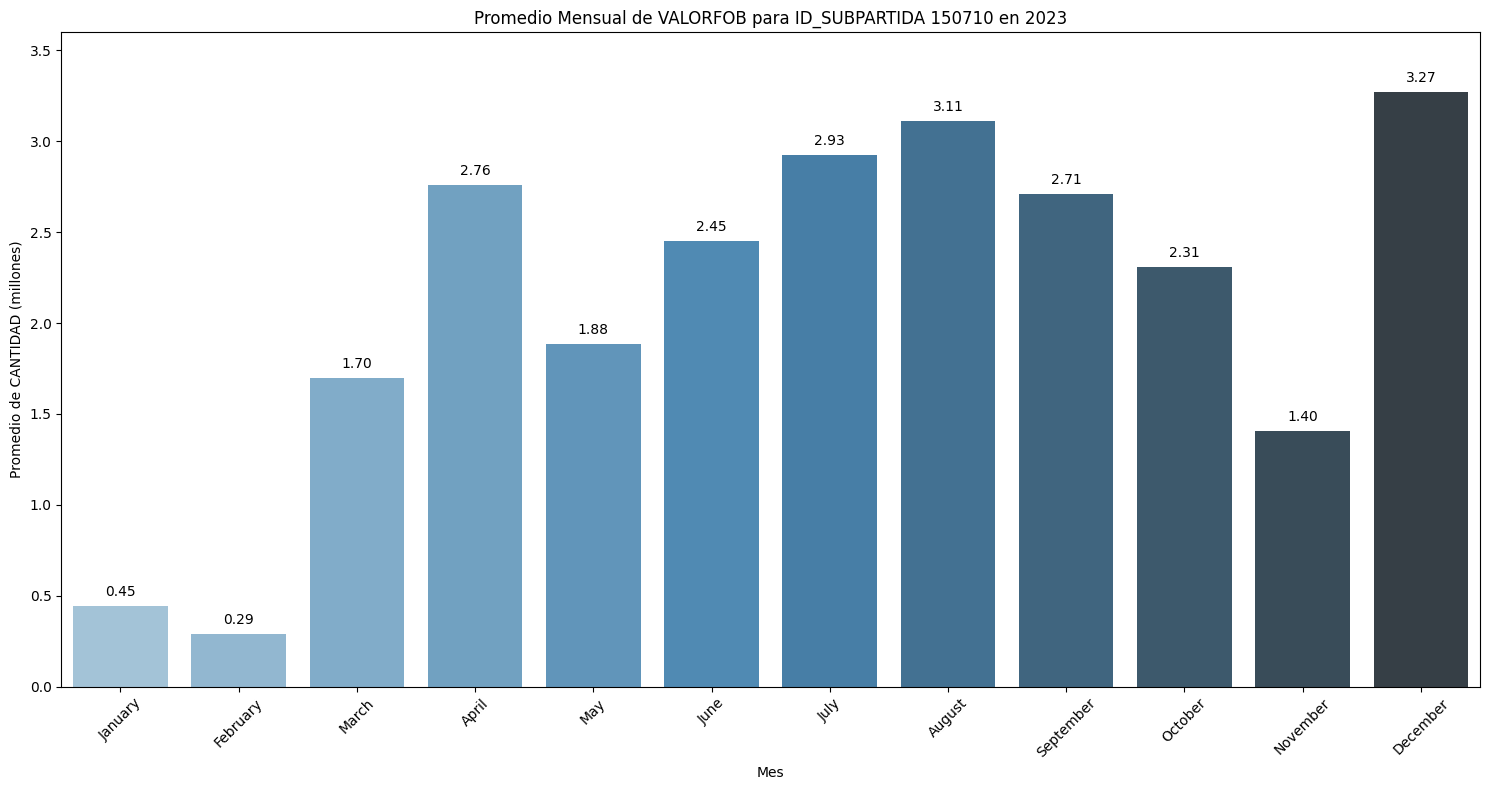

In [80]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2023)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 150710]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 150710 en 2023')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1585129821.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\1585129821.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




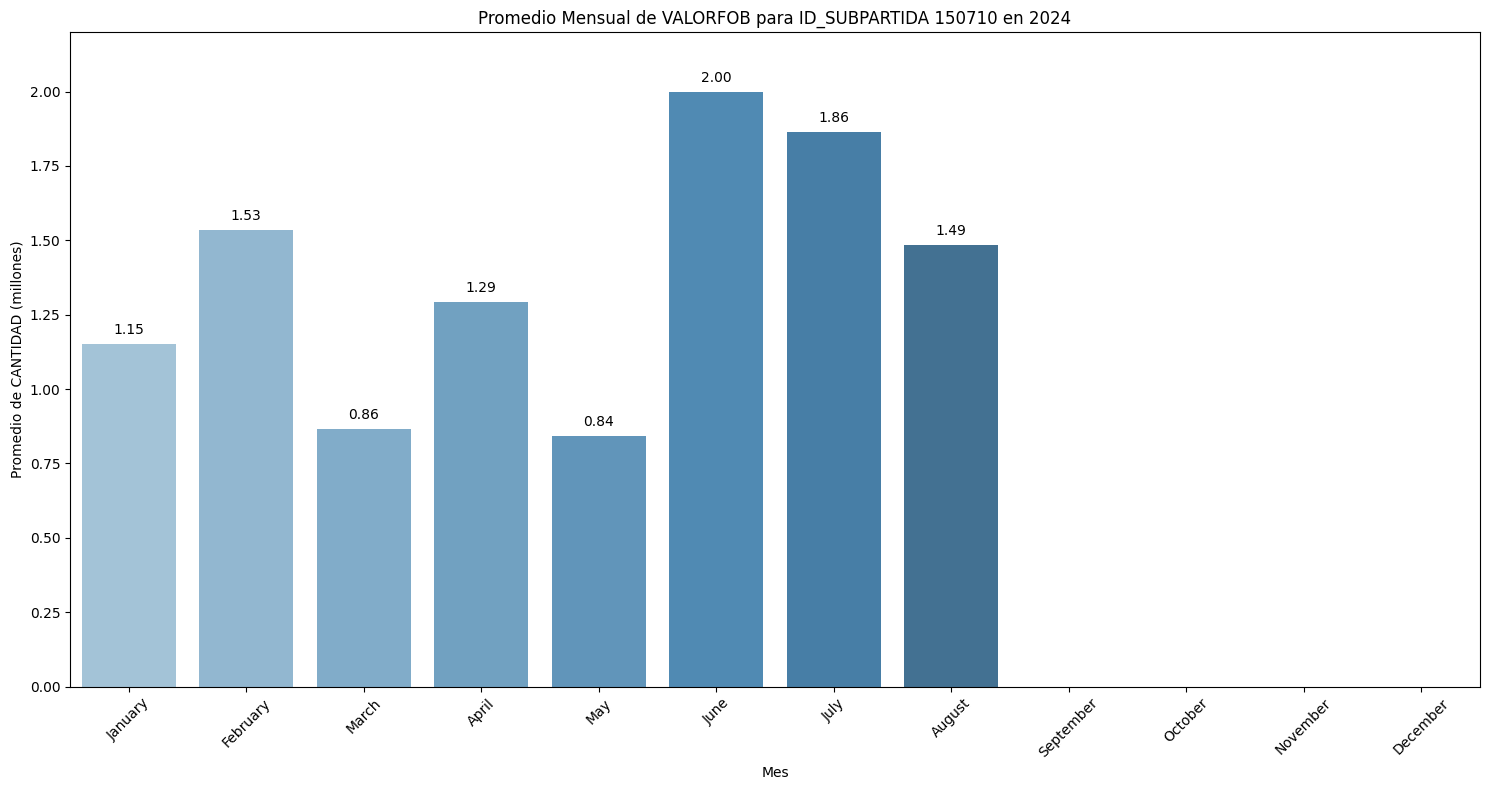

In [81]:
# Asegurarse de que la columna de fechas esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo los datos del año 2023
filtro_anio = (df_expoParaguay_Filter_VFOB['FECHA'].dt.year == 2024)
df_2023 = df_expoParaguay_Filter_VFOB[filtro_anio]

# Filtrar solo las filas donde ID_SUBPARTIDA es 100630
df_subpartida = df_2023[df_2023['ID_SUBPARTIDA'] == 150710]

# Crear una columna de mes
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month

# Calcular el promedio de 'CANTIDAD' por mes
df_avg_per_month = df_subpartida.groupby('Mes')['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month['Mes'] = df_avg_per_month['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month['Mes'] = pd.Categorical(df_avg_per_month['Mes'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_avg_per_month = df_avg_per_month.sort_values('Mes')

# Determinar la unidad de medida
max_value = df_avg_per_month['CANTIDAD'].max()
if max_value >= 1_000_000:
    unidad = "millones"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000_000
elif max_value >= 1_000:
    unidad = "miles"
    df_avg_per_month['CANTIDAD'] = df_avg_per_month['CANTIDAD'] / 1_000
else:
    unidad = "unidades"

# Crear la gráfica de barras
plt.figure(figsize=(15, 8))  # Ajustar tamaño de la figura
ax = sns.barplot(data=df_avg_per_month, x='Mes', y='CANTIDAD', palette='Blues_d')

# Ajustar límites del eje Y para evitar espacios en blanco
plt.ylim(0, df_avg_per_month['CANTIDAD'].max() * 1.1)

# Añadir las etiquetas de los valores en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Ajuste de la posición de las etiquetas
                textcoords='offset points')

# Títulos y etiquetas
plt.title(f'Promedio Mensual de VALORFOB para ID_SUBPARTIDA 150710 en 2024')
plt.xlabel('Mes')
plt.ylabel(f'Promedio de CANTIDAD ({unidad})')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [ ]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_expoParaguay_Filter_VFOB['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_VFOB['FECHA'])

# Filtrar solo el ID_SUBPARTIDA 120190
df_subpartida = df_expoParaguay_Filter_VFOB[df_expoParaguay_Filter_VFOB['ID_SUBPARTIDA'] == 150710]

# Crear una columna de mes y año
df_subpartida['Mes'] = df_subpartida['FECHA'].dt.month
df_subpartida['Año'] = df_subpartida['FECHA'].dt.year

# Calcular el promedio de 'CANTIDAD' por mes para cada año
df_avg_per_month_year = df_subpartida.groupby(['Año', 'Mes'])['VALORFOB'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_year['Mes'] = df_avg_per_month_year['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_year['Mes'] = pd.Categorical(df_avg_per_month_year['Mes'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                          'July', 'August', 'September', 'October', 'November', 'December'], 
                                              ordered=True)
df_avg_per_month_year = df_avg_per_month_year.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_year, x='Mes', y='VALORFOB', color='Año', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'Año': 'Año'},
              title='Promedio Mensual de CANTIDAD para VALORFOB 150710 en Diferentes Años')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de valorfob',
                  xaxis_tickangle=45, legend_title_text='Año')

# Mostrar la gráfica
fig.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2649819591.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\migue\AppData\Local\Temp\ipykernel_6372\2649819591.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Pico en el mes de abril  a julio: Gran parte de los años comienzan a subir desde el mes de abril. Sin embargo, el año 2022 destaca con un valor muy alto en julio, seguido de una caída considerable en agosto. 

agosto a noviembre: En la mayoría de los años, los valores tienden a disminuir gradualmente lo que sugiere una baja en exportaciones o ajustes estacionales

Diciembre: Los valores suelen recuperarse un poco. Excepto 2021 el cual hace todo lo contrario

Estabilidad en algunos años: Para los años 2018, 2019 y 2020, se observa un comportamiento más estable sin variaciones extremas. Estos años mantienen un promedio de valor FOB un poco bajo y constante a lo largo de los meses.

In [ ]:
# Asegurarse de que la columna 'FECHA' esté en formato datetime
df_expoParaguay_Filter_CANTIDAD['FECHA'] = pd.to_datetime(df_expoParaguay_Filter_CANTIDAD['FECHA'])

df_filtered = df_expoParaguay_Filter_CANTIDAD[df_expoParaguay_Filter_CANTIDAD['ID_SUBPARTIDA'].isin(id_subpartida_cantidad)]

# Crear una columna de mes y año
df_filtered['Mes'] = df_filtered['FECHA'].dt.month
df_filtered['Año'] = df_filtered['FECHA'].dt.year

# Calcular el promedio de 'VALORFOB' por mes para cada ID_SUBPARTIDA
df_avg_per_month_subpartida = df_filtered.groupby(['ID_SUBPARTIDA', 'Mes'])['CANTIDAD'].mean().reset_index()

# Convertir el número de mes a nombre
df_avg_per_month_subpartida['Mes'] = df_avg_per_month_subpartida['Mes'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))

# Ordenar los meses
df_avg_per_month_subpartida['Mes'] = pd.Categorical(df_avg_per_month_subpartida['Mes'], 
                                                    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                                'July', 'August', 'September', 'October', 'November', 'December'], 
                                                    ordered=True)
df_avg_per_month_subpartida = df_avg_per_month_subpartida.sort_values('Mes')

# Crear la gráfica interactiva de líneas con Plotly
fig = px.line(df_avg_per_month_subpartida, x='Mes', y='CANTIDAD', color='ID_SUBPARTIDA', markers=True,
              labels={'CANTIDAD': 'Promedio de CANTIDAD', 'Mes': 'Mes', 'ID_SUBPARTIDA': 'ID_SUBPARTIDA'},
              title='Promedio Mensual de cantidad para Diferentes ID_SUBPARTIDA')

# Personalizar diseño
fig.update_layout(xaxis_title='Mes', yaxis_title='Promedio de CANTIDAD',
                  xaxis_tickangle=45, legend_title_text='ID_SUBPARTIDA')

# Mostrar la gráfica
fig.show()


# prediccion 

Creacion del df a utilizar junto con su limpieza correspondiente

In [8]:
df_FilterID_prediction2 = df_exporParaguay_Filter

columnas_a_eliminar = [
    'ID','PERIODO','ID_EMPRESA','ID_CAPITULO','ID_PARTIDA','ID_POSICION','ID_ADUANAS','ID_VIA','ID_PAISDESTINO','ID_UNIDAD','VALORFOB_UNITARIO','VALORCIF','FLETE','PESO_NETO',	'PESO_BRUTO','ID_TRANSPORTADOR','DESCRIPCION_ARANCEL_PAIS','DESCRIPCION_PROD','MARCA','ID_PAISORIGEN','IMPONIBLE','DESTINACION','ITEM','ID_DECLARANTE','CANTIDAD'
    ]


df_FilterID_prediction2 = df_FilterID_prediction2.drop(columns=columnas_a_eliminar)
print("Las columnas seleccionadas se eliminaron con éxito")


Las columnas seleccionadas se eliminaron con éxito


In [9]:
df_FilterID_prediction2

FECHA  ID_SUBPARTIDA  VALORFOB
0        2018-01-02         100630   96320.0
1        2018-01-02         240319   44965.0
2        2018-01-02         420100   12050.0
3        2018-01-02         420100     304.8
4        2018-01-02         420100    4488.0
...             ...            ...       ...
1547954  2024-08-29         853890   16974.5
1547955  2024-08-29         854442    8808.0
1547956  2024-08-02         100630  265200.0
1547957  2024-08-29         852580    1787.4
1547958  2024-08-29         880330   15358.0

[1547959 rows x 3 columns]

In [10]:
import pandas as pd

# Filtrar el DataFrame
df_FilterID_prediction2 = df_FilterID_prediction2[df_FilterID_prediction2['ID_SUBPARTIDA'] == 120190][['FECHA', 'VALORFOB']]

# Asegúrate de que 'FECHA' sea de tipo datetime
df_FilterID_prediction2['FECHA'] = pd.to_datetime(df_FilterID_prediction2['FECHA'])

# Establecer 'FECHA' como índice
df_FilterID_prediction2.set_index('FECHA', inplace=True)

# Agrupar por mes y año y sumar 'VALORFOB'
df_grouped = df_FilterID_prediction2.resample('M').sum()

# Convertir el índice a formato aaaa-mm y quitar el nombre del índice
df_grouped.index = df_grouped.index.to_period('M').astype(str)
df_grouped.index.name = None  # Quitar el nombre del índice

# Mostrar el DataFrame resultante
df_grouped


C:\Users\migue\AppData\Local\Temp\ipykernel_19292\1951592606.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df_FilterID_prediction2.resample('M').sum()


VALORFOB
2018-01 171922114.0
2018-02 432612388.0
2018-03 584986623.5
2018-04 300739319.2
2018-05 307284031.5
...             ...
2024-04 361156947.0
2024-05 340699400.2
2024-06 352272405.4
2024-07 503353126.8
2024-08 225845371.9

[80 rows x 1 columns]

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Escalar datos
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(df_grouped)

# Crear las secuencias de entrenamiento
train_data = []
labels = []

for i in range(24, len(scaler_data)):
    train_data.append(scaler_data[i-24:i,0])
    labels.append(scaler_data[i,0])

train_data, labels = np.array(train_data), np.array(labels)
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Inicializar el modelo RNN
model = Sequential()

# Añadir la capa RNN
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(train_data.shape[1],1)))
model.add(SimpleRNN(units=50))

# Añadir la capa de salida
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(train_data, labels, epochs=50, batch_size=32)


Epoch 1/50


c:\Users\migue\anaconda3\envs\test\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4839
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1240
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1743
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1827
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1206
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0595
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0363
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0484
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0694
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0761
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0652
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0464
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0312
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0263
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0309
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/st

In [14]:
# Predecir los próximos 12 meses
test_data = scaler_data[-24:]
test_data = np.reshape(test_data,(1,24,1))

# Hacer predicciones
predictions = []
for _ in range(24):
    pred = model.predict(test_data)
    predictions.append(pred[0,0])
    test_data = np.append(test_data[:, 1:, :], pred.reshape(1,1,1), axis=1)

# Invertir la escala de las predicciones
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [15]:
# Crear fechas para las predicciones
future_dates = pd.date_range(start='2024-08-01', periods=24, freq='MS').date

# Crear DataFrame de predicciones
predictions_df = pd.DataFrame(predictions, index=future_dates, columns=['Predic ValorFob'])

# Combinar con los datos históricos
combined_df = pd.concat([df_grouped, predictions_df])

# Mostrar el DataFrame combinado
combined_df.tail(15)

VALORFOB  Predic ValorFob
2025-05-01       NaN      275040640.0
2025-06-01       NaN      274519648.0
2025-07-01       NaN      255761824.0
2025-08-01       NaN      199337072.0
2025-09-01       NaN      138938944.0
2025-10-01       NaN      190081360.0
2025-11-01       NaN      162182272.0
2025-12-01       NaN      177067280.0
2026-01-01       NaN      241329296.0
2026-02-01       NaN      337968960.0
2026-03-01       NaN      375515712.0
2026-04-01       NaN      321921664.0
2026-05-01       NaN      342084224.0
2026-06-01       NaN      365278944.0
2026-07-01       NaN      345203936.0

In [298]:
import plotly.graph_objects as go

# Crear figura
fig = go.Figure()

# Añadir datos históricos
fig.add_trace(go.Scatter(x=df_grouped.index, y=df_grouped['VALORFOB'], mode='lines', name='Data historica'))

# Añadir predicciones
fig.add_trace(go.Scatter(x=predictions_df.index,y=predictions_df['Predic ValorFob'],mode='lines', name='Data historica',line=dict(dash='dash')))

# Etiquetas y leyenda
fig.update_layout(
                    title='Demanda historica',
                    xaxis_title = 'Date',
                    yaxis_title = 'Number of pass',
                    legend_title = 'Legend',
                    width=1300, height=500    
)

# Mostrar gráfica
fig.show()